# World Data League 2023

## 🎯 Challenge
Avencas Marine Protected Area: Predict the future of the local ecosystem and its species

## Team: AI Wonder Girls
## 👥 Authors
* Ernitia Paramasari
* Pankaja Shankar
* Emma Roscow
* Divya Kamat

## 💻 Development

Cascais municipality is located in the Lisbon Metropolitan Area and home to about 206.479 people, most of which live close to the shore. Cascais has fourteen urban beaches which are popular with locals and tourists alike. One of these beaches is Avencas beach - located in the first locally managed marine protected area in Portugal. [[1]](https://storymaps.arcgis.com/stories/b576b2067fb940abaea1289cb0dd1158)

The Avencas Marine Protected Area is characterised by rocky platforms with a small sandy beach, sheltered from strong winds.  The intertidal zone is extremely rich in biodiversity and essential to the ecosystem equilibrium in the entire region. It is an important breeding ground for different fish species and is home to diverse algal and invertebrates communities.

Loss of biodiversity is a major concern, and despite initiatives put into place since 2016 to protect the area from anthropogenic stressors, the density and diversity of species has not recovered as much as anticipated [2]. In order to put in place good management options to protect these populations, the Cascais municipality needs to better understand how environmental variables affect the community's biodiversity. To meet this goal, we have sourced a range of open-source environmental data that have been hypothesised to impact marine biodiversity and trained machine learning models to find the most important factors that influence species abundance in the Avencas MPA, using extensive data on species abundance over 9 years provided for the challenge. 

Informed by the academic literature on marine conservation and our own data analysis, we have engineered a set of features that can be applied to any marine protected area for which there is a similar dataset. We show that this approach can be used to understand how weather affects marine ecosystem diversity.

[1] https://storymaps.arcgis.com/stories/b576b2067fb940abaea1289cb0dd1158

[2] Ferreira et al. (2017). Ecosystem response to different management options in Marine Protected Areas (MPA): A case study of intertidal rocky shore communities. Ecological Indicators, 21, 471-480.

### Initial Set up

**Install and import libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Set up folder for run path and also for libraries install in this context...
import os
import sys

base_path = "/content/drive/MyDrive/World Data League 2023 - AI Wonder Girls/Phase2"
curr_run_path = f"{base_path}/EDA"
os.chdir(curr_run_path)
sys.path.append(curr_run_path)
cwd = os.getcwd()
print(f"Current working dir: {cwd}")


Current working dir: /content/drive/MyDrive/World Data League 2023 - AI Wonder Girls/Phase2/EDA


In [ ]:
%pip install -U kaleido
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 97.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os, re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import warnings
import geopandas as gpd
import time

from datetime import datetime, timezone, timedelta
from plotly.subplots import make_subplots

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


**Read Raw Data**

In [ ]:
datapath='/content/drive/MyDrive/World Data League 2023 - AI Wonder Girls/Phase2/'
df_mobile = pd.read_excel(os.path.join(datapath,"Raw data/cascais_data/AMPA_Data_Sample.xlsx"),sheet_name=' Mobil (nº individuals)')
df_sessile = pd.read_excel(os.path.join(datapath,"Raw data/cascais_data/AMPA_Data_Sample.xlsx"),sheet_name='Sessil (% Coverage)')
sessil_species = pd.read_excel(os.path.join(datapath,"Processed data/sessil_species_list.xlsx"))
mobil_species = pd.read_excel(os.path.join(datapath,"Processed data/mobil_species_list.xlsx"))
sessil_classification = pd.read_excel(os.path.join(datapath,"Raw data/species_classification.xlsx"),sheet_name='Sessile')
mobil_classification = pd.read_excel(os.path.join(datapath,"Raw data/species_classification.xlsx"),sheet_name='Mobile')

### 1. Assess the Data quality

####**Data quality for sessile dataset**

In [ ]:
## Checking for null values
df_sessile.isna().sum().sort_values(ascending=False).to_frame().T

Coluna2  Watersipora subtorquata (Ascídea)  Coluna1  observações  \
0     1649                               1649     1648         1536   

   Substrate  Water temperature (ºC)  Balanus perforatus  Chthamalus sp.  \
0         11                       9                   2               2   

   Ulva intestinalis  Osmundea pinnatifida  Ulva sp.   Limo N.I.  \
0                  1                     1          1          1   

   Cladophora sp. (limo)  Ulva rigida  \
0                      1            1   

   Stypocaulon scoparium (alga verde tufosa que parece pinheiro)  \
0                                                  1               

   Ahnfeltiopsis devoniensis  Codium sp. (alga verde carnuda)  \
0                          1                                1   

   Alga vermelha ramificada (Polysiphonia?)  \
0                                         1   

   Alga vermelha "encaracolada" (que parece ceramium pequeno)   Porphira  \
0                                                  1                   1   

   Alga vermelha semelhante a Ulva rigida  Nemoderma sp.(alga tipo musgo)  \
0                                       1                               1   

   Chondria coerulescens (alga verde/azul filamentosa)  \
0                                                  1     

   Hildenbrandia sp. (incrustante vermelha)  Alga vermelha carnuda  \
0                                         1                      1   

   Alga vermelha laminada  Alga vermelha vesicular  Alga vermelha filamentosa  \
0                       1                        1                          1   

   Condracanthus  Alga verde carnuda ramificada  Alga verde incrustante  \
0              1                              1                       1   

   alga verde tufosa  Alga castanha sp.  Laminaria sp.  Cystoseira sp.  \
0                  1                  1              1               1   

   Sphacelaria rigidula (pompons castanhos)  Alga verde/azul - lavanda  \
0                                         1                          1   

   Alga castanha tufosa  Alga castanha carnuda  Alga castanha incrustante  \
0                     1                      1                          1   

   Alga castanha filamentosa  Alga castanha laminada  Dictyota castanha  \
0                          1                       1                  1   

   alga verde (tipo couve flor)  Dictyota dichotoma (alga azul laminada)  \
0                             1                                        1   

   Fucus vesiculosus   Colpomenia sinuosa (alga bolhas)  \
0                   1                                 1   

   Codium adhaerens (tipo nenúfar)  \
0                                1   

   Cladostephus spongiosus (codium que parece que tem areia)  \
0                                                  1           

   Alga amarela tipo codium viscoso  Alga verde filamentosa  Alga verde n.i.  \
0                                 1                       1                1   

   Plocamium sp.  Caulacanthus sp.  Date  Gigartina sp. (língua do diabo)  \
0              1                 1     1                                1   

   Mastocarpus sp. (alga preta só mediolitoral)  Alga branca ramificada  \
0                                             1                       1   

   Aglaophenia pluma (hidrozoário branco ramificado)  Hymeniacidon sanguinea  \
0                                                  1                       1   

   Paracentrotus lividus  Ophiothrix sp.  Anemonia sulcata   Actinia equina   \
0                      1               1                  1                1   

   Pollicipes pollicipes  Chiton sp.  Nassariidae (búzio)  Mytillus sp.  \
0                      1           1                    1             1   

   Littorina neritoides  Monodonta lineata  Gibbula sp.  Siphonaria algesirae  \
0                     1                  1            1                     1   

   Patella sp.  Supratidal/Middle Intertidal  Zone  Sampler

In [ ]:
## check for min and max values for numerical categories
df_sessile.describe()

Tide  Siphonaria algesirae  Gibbula sp.  Monodonta lineata  \
count  2010.000000           2010.000000  2010.000000        2010.000000   
mean      0.729035              0.237736     0.290647           0.128532   
std       0.184047              0.914012     0.882766           0.687898   
min       0.300000              0.000000     0.000000           0.000000   
25%       0.600000              0.000000     0.000000           0.000000   
50%       0.700000              0.000000     0.000000           0.000000   
75%       0.900000              0.000000     0.200000           0.000000   
max       2.400000             18.600000    13.000000          15.200000   

       Littorina neritoides  Mytillus sp.  Nassariidae (búzio)   Chiton sp.  \
count           2010.000000   2010.000000          2010.000000  2010.000000   
mean               0.165035      1.030075             0.008905     0.001741   
std                0.746313      3.628247             0.080598     0.067243   
min                0.000000      0.000000             0.000000     0.000000   
25%                0.000000      0.000000             0.000000     0.000000   
50%                0.000000      0.000000             0.000000     0.000000   
75%                0.000000      0.100000             0.000000     0.000000   
max               21.000000     66.000000             2.400000     3.000000   

       Pollicipes pollicipes  Actinia equina   Anemonia sulcata   \
count                 2010.0      2010.000000        2010.000000   
mean                     0.0         0.175597           0.068905   
std                      0.0         0.755401           0.658543   
min                      0.0         0.000000           0.000000   
25%                      0.0         0.000000           0.000000   
50%                      0.0         0.000000           0.000000   
75%                      0.0         0.000000           0.000000   
max                      0.0        10.000000          18.000000   

       Ophiothrix sp.  Paracentrotus lividus  Hymeniacidon sanguinea  \
count      2010.00000            2010.000000             2010.000000   
mean          0.00199               0.764378                0.196915   
std           0.08922               4.306033                0.846592   
min           0.00000               0.000000                0.000000   
25%           0.00000               0.000000                0.000000   
50%           0.00000               0.000000                0.000000   
75%           0.00000               0.000000                0.000000   
max           4.00000              70.000000               20.000000   

       Aglaophenia pluma (hidrozoário branco ramificado)  \
count                                        2010.000000   
mean                                            0.000647   
std                                             0.013183   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             0.500000   

       Alga branca ramificada  Sabellaria alveolata  (tubos)  Cerianthidae  \
count             2010.000000                    2010.000000   2010.000000   
mean                 0.000100                       0.001045      0.000995   
std                  0.003154                       0.025514      0.044610   
min                  0.000000                       0.000000      0.000000   
25%                  0.000000                       0.000000      0.000000   
50%                  0.000000                       0.000000      0.000000   
75%                  0.000000                       0.000000      0.000000   
max                  0.100000                       1.000000      2.000000   

       Anémona N.I.  Actinia fragacea  \
count    2010.00000       2010.000000   
mean        0.00005          

Check values within categorical columns

In [ ]:
## values within Weather Condition
df_sessile['Weather Condition'].value_counts()

Clear sky          1437
Cloudy              351
Sunny                97
Rain                 83
Fairly Cloudy        33
Sunny and Windy       9
Name: Weather Condition, dtype: int64

In [ ]:
## values within Weather Condition
df_sessile['Zone'].value_counts()

A    627
E    516
D    435
B    352
F     80
Name: Zone, dtype: int64

In [ ]:
## values for Supratidal/Middle Intertidal
df_sessile['Supratidal/Middle Intertidal'].value_counts()

Medium     1276
Supra       730
Supra         2
Super         1
Medium        1
Name: Supratidal/Middle Intertidal, dtype: int64

In [ ]:
## values for Water temperature
df_sessile['Water temperature (ºC)'].unique()

array([16, 15, 17, 13, 16.5, 21, 19, 20, 18, 17.5, 14, ' ', nan, 22, 11,
       12, '18', 21.7, 19.2, 17.4, 15.6, 15.2, 14.2, 15.4, 14.6, 14.5,
       16.2, 17.8, 18.3, 17.9, 16.9, 13.3, 14.9, 14.1, '-', 13.2],
      dtype=object)

In [ ]:
## values for Substrate
df_sessile['Substrate'].value_counts()

Rock                       860
Rock/Sand                  523
Puddle/Rock                275
Puddle/Rock/Sand           101
Sand                        78
Pebble                      49
Puddle                      26
Rock/Sand/Sea               17
Sand/Pebble                 12
Rock/Sea                    11
Rock/Pebble                  8
High Tide                    7
Puddle/Sand                  7
Rock/Sand/Pebble             5
Rock/Canal                   4
Sand/Sea                     4
Rock/Sand/Canal              4
 Rock                        2
Puddle/Pebble                1
Canal                        1
Sea                          1
Puddle/Rock/Sand/Pebble      1
Sand/ Pebble/Canal           1
Rock/Sand/Canal/Sea          1
Sand/Canal                   1
Name: Substrate, dtype: int64

In [ ]:
# There are multiple samples for same date and hour combination
df_sessile[df_sessile.groupby(['Date', 'Hour'])['Hour'].transform('count') > 1][['Date','Hour']].value_counts()

Date        Hour    
2017-09-08  09:00:00    11
2018-05-28  09:00:00    11
2017-03-01  09:30:00    11
2017-04-11  08:45:00    11
2017-04-13  09:30:00    11
                        ..
2018-07-13  09:00:00     5
2019-10-21  10:30:00     4
2020-04-23  08:00:00     4
2018-02-19  09.30        4
2012-04-23  10:30:00     2
Length: 89, dtype: int64

*-> Identify total number of observations for each species across all sessile samples*




In [ ]:
## Identify total number of observations for each species across all samples
sums = df_sessile[df_sessile.columns[9:-4]].sum().to_frame()
sums.T

Siphonaria algesirae  Gibbula sp.  Monodonta lineata  Littorina neritoides  \
0                477.85        584.2             258.35                331.72   

   Mytillus sp.  Nassariidae (búzio)  Chiton sp.  Pollicipes pollicipes  \
0       2070.45                 17.9         3.5                    0.0   

   Actinia equina   Anemonia sulcata   Ophiothrix sp.  Paracentrotus lividus  \
0           352.95              138.5             4.0                 1536.4   

   Hymeniacidon sanguinea  Aglaophenia pluma (hidrozoário branco ramificado)  \
0                   395.8                                                1.3   

   Alga branca ramificada  Sabellaria alveolata  (tubos)  Cerianthidae  \
0                     0.2                            2.1           2.0   

   Anémona N.I.  Actinia fragacea  \
0           0.1               2.3   

   Anémona branca com estrias (fam. Cerianthidae)  \
0                                           37.85   

   Actinothoe sphyrodeta (anémona branca e laranja)  \
0                                               2.1   

   Oncidiella celtica (lesma)  Calliostoma sp. (burrié bicudo)  \
0                         1.3                              0.6   

   Polysyncraton sp. (ascídias vermelhas)  Didemnum sp. (ascídeas brancas)  \
0                                     1.1                              1.0   

   Burrié negro N.I.  Búzio/burrié n.i.  Watersipora subtorquata (Ascídea)  \
0               27.1                0.5                                0.2   

   Verrucaria maura   Lichina pygmaea (líquene folhoso)  Coralina elongata  \
0             338.71                              278.3           28878.25   

   Lithophillum incrustans  Litophylum lichenoides  Litophylum tortuosum  \
0                   3835.8                    26.7                  81.3   

   Mesophylum lichenoides  Gelidium sp. (tipo raquete)  \
0                   143.0                       1460.7   

   Asparagopsis armata (tufosa)  Asparagopsis armata (adulta)  Porphyra sp.  \
0                         561.7                        624.75         164.1   

   Ceramium (forma taças)  Mastocarpus sp. (alga preta só mediolitoral)  \
0                  4209.5                                         552.6   

   Gigartina sp. (língua do diabo)  Plocamium sp.  Caulacanthus sp.  \
0                           1220.8          136.5            9385.5   

   Condracanthus  Alga vermelha vesicular  Alga vermelha laminada  \
0        1176.15                      7.6                   132.2   

   Alga vermelha carnuda  Hildenbrandia sp. (incrustante vermelha)  \
0                    5.2                                     258.8   

   Chondria coerulescens (alga verde/azul filamentosa)  \
0                                              55.06     

   Alga vermelha "encaracolada" (que parece ceramium pequeno)   \
0                                                0.5             

   Alga vermelha semelhante a Ulva rigida  Porphira  Osmundea pinnatifida  \
0                                     7.3       7.0                   0.3   

   Alga vermelha ramificada (Polysiphonia?)  Ahnfeltiopsis devoniensis  \
0                                       2.0                        1.7   

   Stypocaulon scoparium (alga verde tufosa que parece pinheiro)  Ulva rigida  \
0                                              380.3                   4943.5   

   Cladophora sp. (limo)  Limo N.I.  Ulva intestinalis  Ulva sp.   \
0                8941.95     2633.9            2326.35       55.0   

   Codium sp. (alga verde carnuda)  Alga verde carnuda ramificada  \
0                             13.7                            3.0   

   Nemoderma sp.(alga tipo musgo)  alga verde tufosa  \
0                            13.0               19.4   

   alga verde (tipo couve flor)  Alga verde incrustante  Alga verde n.i.  \
0                          0.85                     5.3             26.5   

   Alga verde filamentosa  Alga amarela tipo codium visco

*-> Number of species without any observation across samples*

In [ ]:
## number of species without any observation across samples
sums[sums == 0].dropna(axis=0)

0
Pollicipes pollicipes  0.0

In [ ]:
## number of species without any observation across samples
sums[sums < 10].dropna(axis=0)

0
Chiton sp.                                          3.50
Pollicipes pollicipes                               0.00
Ophiothrix sp.                                      4.00
Aglaophenia pluma (hidrozoário branco ramificado)   1.30
Alga branca ramificada                              0.20
Sabellaria alveolata  (tubos)                       2.10
Cerianthidae                                        2.00
Anémona N.I.                                        0.10
Actinia fragacea                                    2.30
Actinothoe sphyrodeta (anémona branca e laranja)    2.10
Oncidiella celtica (lesma)                          1.30
Calliostoma sp. (burrié bicudo)                     0.60
Polysyncraton sp. (ascídias vermelhas)              1.10
Didemnum sp. (ascídeas brancas)                     1.00
Búzio/burrié n.i.                                   0.50
Watersipora subtorquata (Ascídea)                   0.20
Alga vermelha vesicular                             7.60
Alga vermelha carnuda                               5.20
Alga vermelha "encaracolada" (que parece cerami...  0.50
Alga vermelha semelhante a Ulva rigida              7.30
Porphira                                            7.00
Osmundea pinnatifida                                0.30
Alga vermelha ramificada (Polysiphonia?)            2.00
Ahnfeltiopsis devoniensis                           1.70
Alga verde carnuda ramificada                       3.00
alga verde (tipo couve flor)                        0.85
Alga verde incrustante                              5.30
Codium adhaerens (tipo nenúfar)                     1.50
Fucus vesiculosus                                   6.50
Alga castanha sp.                                   1.00
Alga castanha incrustante                           8.50
Alga castanha carnuda                               0.70
Alga verde/azul - lavanda                           3.00
Laminaria sp.                                       8.00

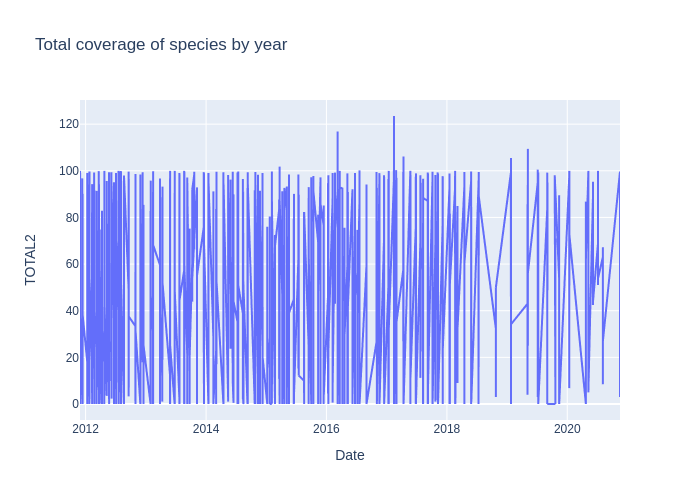

In [ ]:
# Plot total coverage by year using plotly
fig = px.line(df_sessile, x='Date', y='TOTAL2',  title='Total coverage of species by year')
fig.show("png")

####**Data quality for mobile dataset**

In [ ]:
## Checking for null values
df_mobile.isna().sum().sort_values(ascending=False).to_frame().T

Column3  Column2  Column1  Tide  Supratidal/Middle Intertidal  Hour  \
0     2114     2114      289    98                            93    93   

   Substrate  Date  Zone  Water temperature (ºC)  Sampler  \
0         93    93    93                      93       93   

   Porcellana sp. (caranguejo pinças largas)  Diplodus vulgaris  \
0                                         92                 92   

   Syngnathus (Marinha)  Lepadogaster lepadogaster  Poliqueta n.i.  \
0                    92                         92              92   

   Nereis sp.  Ofiurídeo n.i.  Chiton sp.   \
0          92              92           92   

   Acanthochitona fascicularis (quíton com pêlos)  Leptochiton cancellatus  \
0                                              92                       92   

   Anémona n.i.  Pagurus sp. (caranguejo eremita)  \
0            92                                92   

   Pachygrapsus marmoratus (caranguejo pequeno verde)  Palaemon sp.  \
0                                                 92             92   

   Caboz N.I.  Gobius sp.  Parablennius sp. (marachomba)  \
0          92          92                             92   

   Parablennius pilicornis  Nudibranquio N.I.  \
0                       92                 92   

   Callionymus lira (peixe-pau lira)  Oncidiella celtica  \
0                                 92                  92   

   Doriopsilla areolata (nudibrânquio)  Scorpaena sp. (Rascasso)  \
0                                   92                        92   

   Lipophrys pholis (ad.)  Diplodus cervinus  Gobiusculus flavescens  \
0                      92                 92                      92   

   Weather Condition  Atherina presbyter  Carcinus maenas  Xantho sp.  \
0                 92                  92               92          92   

   caranguejo N.I.  Palaemon serratus  Nasariidae (búzio)  Diogenes pugilator  \
0               92                 92                  92                  92   

   Marthasterias glacialis  Asterina gibbosa  Eulalia viridis (poliqueta)  \
0                       92                92                           92   

   Sabellaria alveolata  Octopus vulgaris  Sepia officinallis  \
0                    92                92                  92   

   Alloteuthis subulata  Loligo vulgaris  Parablennius gattorugine  \
0                    92               92                        92   

   Diplodus sp.  Diplodus sargus  Maja sp.  Eriphia verrucosa  \
0            92               92        92                 92   

   Polybius henslowii  Necora puber  Aplysia punctata  Podarcis carbonelli  \
0                  92            92                92                   92   

   Acanthochitona fascicularis  Sphaeroma sp. (bicho de conta)  \
0                           92                              92   

   Chromodoris purpurea (nudibrânquio)  Lipophrys pholis (juvenil/recruta)  \
0                                   92                                  92   

   Pomatoschistus pictus (caboz-de-areia)  Juvenis de lagosta/lavagante  \
0                                      92                            92   

   Peixe juvenil N.I.  TOTAL  Abundance (ind/m2)  
0                  92      3                   0

In [ ]:
## check for min and max values for numerical categories
df_mobile.describe()

Tide  Marthasterias glacialis  Asterina gibbosa  \
count  2016.000000              2022.000000       2022.000000   
mean      3.077331                 0.033136          0.006429   
std      37.584358                 0.236229          0.106485   
min       0.300000                 0.000000          0.000000   
25%       0.600000                 0.000000          0.000000   
50%       0.700000                 0.000000          0.000000   
75%       0.900000                 0.000000          0.000000   
max     862.170000                 4.000000          3.000000   

       Eulalia viridis (poliqueta)  Sabellaria alveolata  Octopus vulgaris  \
count                  2022.000000           2022.000000       2022.000000   
mean                      0.536103              0.002967          0.008408   
std                       2.483878              0.062846          0.096595   
min                       0.000000              0.000000          0.000000   
25%                       0.000000              0.000000          0.000000   
50%                       0.000000              0.000000          0.000000   
75%                       0.000000              0.000000          0.000000   
max                      57.000000              2.000000          2.000000   

       Sepia officinallis  Alloteuthis subulata  Loligo vulgaris  \
count              2022.0                2022.0           2022.0   
mean                  0.0                   0.0              0.0   
std                   0.0                   0.0              0.0   
min                   0.0                   0.0              0.0   
25%                   0.0                   0.0              0.0   
50%                   0.0                   0.0              0.0   
75%                   0.0                   0.0              0.0   
max                   0.0                   0.0              0.0   

       Parablennius gattorugine  Diplodus sp.  Diplodus sargus     Maja sp.  \
count               2022.000000   2022.000000      2022.000000  2022.000000   
mean                   0.041543      0.068249         0.003956     0.000495   
std                    1.025771      1.555597         0.121772     0.022239   
min                    0.000000      0.000000         0.000000     0.000000   
25%                    0.000000      0.000000         0.000000     0.000000   
50%                    0.000000      0.000000         0.000000     0.000000   
75%                    0.000000      0.000000         0.000000     0.000000   
max                   44.000000     51.000000         5.000000     1.000000   

       Polybius henslowii  Necora puber  Aplysia punctata  \
count         2022.000000   2022.000000       2022.000000   
mean             0.000495      0.006924          0.017310   
std              0.022239      0.088707          0.668953   
min              0.000000      0.000000          0.000000   
25%              0.000000      0.000000          0.000000   
50%              0.000000      0.000000          0.000000   
75%              0.000000      0.000000          0.000000   
max              1.000000      2.000000         30.000000   

       Podarcis carbonelli  Acanthochitona fascicularis  \
count               2022.0                  2022.000000   
mean                   0.0                     0.001978   
std                    0.0                     0.062885   
min                    0.0                     0.000000   
25%                    0.0                     0.000000   
50%                    0.0                     0.000000   
75%                    0.0                     0.000000   
max                    0.0                     2.000000   

       Sphaeroma sp. (bicho de conta)  Chromodoris purpurea (nudibrânquio)  \
count                     2022.000000                          2022.000000   
mean                         0.002967                             0.000495   
std                          0.054406                             0.022239   
min   

In [ ]:
df_mobile['Tide'].value_counts()

0.90      333
0.80      308
0.70      300
0.60      226
0.50      176
1.00      115
0.40      102
0.64       33
0.52       22
0.92       22
0.78       22
0.83       22
0.84       22
0.66       22
0.86       22
0.87       12
0.69       11
0.71       11
0.82       11
0.96       11
0.59       11
0.76       11
0.56       11
0.49       11
0.61       11
0.65       11
0.73       11
0.54       11
0.67       11
0.85       11
0.42       11
0.36       11
0.38       11
0.63       11
1.10       11
1.20       11
0.30       11
1.40        6
0.99        5
0.88        5
173.13      1
259.26      1
345.39      1
431.52      1
517.65      1
603.78      1
689.91      1
776.04      1
862.17      1
87.00       1
Name: Tide, dtype: int64

*-> We noticed some higher numbers in tide, let see the observations*

In [ ]:
subset = df_mobile[df_mobile['Tide'].isin([173.13,259.26, 345.39, 431.52, 517.65, 603.78, 689.91, 776.04, 862.17])]
print(f'There are totally {len(subset)} rows with high tide')

There are totally 9 rows with high tide


In [ ]:
## Identify total number of observations for each species for high tide values
subset[df_mobile.columns[9:-1]].sum().to_frame().T

Caboz N.I. Palaemon serratus Nasariidae (búzio) Diogenes pugilator  \
0          0                 1                  0                  1   

  Marthasterias glacialis Asterina gibbosa Eulalia viridis (poliqueta)  \
0                     0.0              0.0                         1.0   

  Sabellaria alveolata Octopus vulgaris Sepia officinallis  \
0                  0.0              0.0                0.0   

  Alloteuthis subulata Loligo vulgaris Parablennius gattorugine Diplodus sp.  \
0                  0.0             0.0                      0.0          0.0   

  Diplodus sargus Maja sp. Eriphia verrucosa Polybius henslowii Necora puber  \
0             0.0      0.0                 0                0.0          0.0   

  Aplysia punctata Podarcis carbonelli Acanthochitona fascicularis  \
0              0.0                 0.0                         0.0   

  Sphaeroma sp. (bicho de conta) Chromodoris purpurea (nudibrânquio)  \
0                            0.0                                 0.0   

  Lipophrys pholis (juvenil/recruta) Pomatoschistus pictus (caboz-de-areia)  \
0                                0.0                                    0.0   

  Peixe juvenil N.I. Juvenis de lagosta/lavagante caranguejo N.I. Xantho sp.  \
0                0.0                          0.0             0.0        0.0   

  Carcinus maenas Atherina presbyter Diplodus vulgaris Syngnathus (Marinha)  \
0             1.0                0.0               0.0                  0.0   

  Lepadogaster lepadogaster Poliqueta n.i. Nereis sp. Ofiurídeo n.i.  \
0                       0.0            0.0        0.0            2.0   

  Chiton sp.  Acanthochitona fascicularis (quíton com pêlos)  \
0         0.0                                            0.0   

  Leptochiton cancellatus Anémona n.i. Pagurus sp. (caranguejo eremita)  \
0                     0.0          0.0                              0.0   

  Pachygrapsus marmoratus (caranguejo pequeno verde)  \
0                                                0.0   

  Porcellana sp. (caranguejo pinças largas) Palaemon sp. Gobius sp.  \
0                                       0.0          0.0        0.0   

  Parablennius sp. (marachomba) Parablennius pilicornis Nudibranquio N.I.  \
0                           0.0                     0.0               0.0   

  Callionymus lira (peixe-pau lira) Oncidiella celtica  \
0                               0.0                0.0   

  Doriopsilla areolata (nudibrânquio) Scorpaena sp. (Rascasso)  \
0                                 0.0                      0.0   

  Lipophrys pholis (ad.) Diplodus cervinus Gobiusculus flavescens TOTAL  \
0                    0.0               0.0                    1.0   7.0   

  Abundance (ind/m2) Column1 Column2  
0               0.35       0     0.0

*-> We see that there are no observations for these high tide values - so, we could remove those*

In [ ]:
## values for Water temperature
df_mobile['Water temperature (ºC)'].unique()

array([16, 15, 17, 13, 16.5, 21, 19, 20, 18, 17.5, 14, ' ', 0, 22, 11, 12,
       '18', 21.7, 19.2, 17.4, 15.6, 15.2, 14.2, 15.4, 14.6, 14.5, 16.2,
       17.8, 18.3, 17.9, '16.9', '13.3', '14.9', '14.1', '-', 14.1, 13.2,
       nan], dtype=object)

In [ ]:
## values for weather condition
df_mobile['Weather Condition'].value_counts()

Clear sky          1484
Cloudy              381
Sunny                92
Fairly Cloudy        33
Rain                 22
Sunny and Windy       9
                      1
Name: Weather Condition, dtype: int64

In [ ]:
## values for Zone
df_mobile['Zone'].value_counts()

A     623
E     512
D     439
B     366
F      80
 B      1
Name: Zone, dtype: int64

In [ ]:
## values for Supratidal/Middle Intertidal
df_mobile['Supratidal/Middle Intertidal'].value_counts()

Medium     1282
Supra       734
Supra         2
supra         1
Super         1
Medium        1
Name: Supratidal/Middle Intertidal, dtype: int64

In [ ]:
## values for substrate
df_mobile['Substrate'].value_counts()

Puddle/Rock                717
Rock                       431
Rock/Sand                  215
Puddle/Rock/Sand           176
Rock/Canal                  88
Rock/Sea                    56
Rock/Pebble                 44
Rock/Sand/Canal             34
Rock/Sand/Sea               31
Pebble                      27
Puddle/Rock/Canal           18
Puddle                      18
Canal                       18
Rock/Sand/Pebble            16
Rock/Sand                   14
Sand                        13
Sand/Pebble                 12
Puddle/Rock/Pebble          11
Puddle/Rock/Sea              9
0                            8
Sand                         7
High Tide                    7
Sea                          7
Puddle/Sand                  5
Puddle/Rock/Sand/Canal       5
Rock/ Canal                  4
Puddle/Rock/Sand/Sea         3
Rock/Sand/Puddle             3
Sand/Sea                     3
Sand/Canal                   3
 Rock                        3
Puddle/Rock/Sand/Pebble      2
Rock/can

In [ ]:
## total number of observations for each species across all samples
sums = df_mobile[df_mobile.columns[9:-5]].sum().to_frame()
sums.T

Marthasterias glacialis  Asterina gibbosa  Eulalia viridis (poliqueta)  \
0                     67.0              13.0                       1084.0   

   Sabellaria alveolata  Octopus vulgaris  Sepia officinallis  \
0                   6.0              17.0                 0.0   

   Alloteuthis subulata  Loligo vulgaris  Parablennius gattorugine  \
0                   0.0              0.0                      84.0   

   Diplodus sp.  Diplodus sargus  Maja sp.  Polybius henslowii  Necora puber  \
0         138.0              8.0       1.0                 1.0          14.0   

   Aplysia punctata  Podarcis carbonelli  Acanthochitona fascicularis  \
0              35.0                  0.0                          4.0   

   Sphaeroma sp. (bicho de conta)  Chromodoris purpurea (nudibrânquio)  \
0                             6.0                                  1.0   

   Lipophrys pholis (juvenil/recruta)  Pomatoschistus pictus (caboz-de-areia)  \
0                                14.0                                     6.0   

   Peixe juvenil N.I.  Juvenis de lagosta/lavagante  caranguejo N.I.  \
0               412.0                          11.0             46.0   

   Xantho sp.  Carcinus maenas  Atherina presbyter  Diplodus vulgaris  \
0        23.0            444.0               313.0                5.0   

   Syngnathus (Marinha)  Lepadogaster lepadogaster  Poliqueta n.i.  \
0                   3.0                       10.0            14.0   

   Nereis sp.  Ofiurídeo n.i.  Chiton sp.   \
0         2.0            70.0         72.0   

   Acanthochitona fascicularis (quíton com pêlos)  Leptochiton cancellatus  \
0                                             4.0                     12.0   

   Anémona n.i.  Pagurus sp. (caranguejo eremita)  \
0           1.0                               6.0   

   Pachygrapsus marmoratus (caranguejo pequeno verde)  \
0                                               94.0    

   Porcellana sp. (caranguejo pinças largas)  Palaemon sp.  Gobius sp.  \
0                                        7.0           3.0        46.0   

   Parablennius sp. (marachomba)  Parablennius pilicornis  Nudibranquio N.I.  \
0                            9.0                     11.0                3.0   

   Callionymus lira (peixe-pau lira)  Oncidiella celtica  \
0                                5.0                19.0   

   Doriopsilla areolata (nudibrânquio)  Scorpaena sp. (Rascasso)  \
0                                  6.0                       1.0   

   Lipophrys pholis (ad.)  Diplodus cervinus  Gobiusculus flavescens  
0                     5.0                1.0                     1.0

*-> Identify the number of species without any or just 1 observation across samples*

In [ ]:
## number of species without any or just 1 observation across samples
sums[sums <=1].dropna(axis=0)

0
Sepia officinallis                   0.0
Alloteuthis subulata                 0.0
Loligo vulgaris                      0.0
Maja sp.                             1.0
Polybius henslowii                   1.0
Podarcis carbonelli                  0.0
Chromodoris purpurea (nudibrânquio)  1.0
Anémona n.i.                         1.0
Scorpaena sp. (Rascasso)             1.0
Diplodus cervinus                    1.0
Gobiusculus flavescens               1.0

In [ ]:
## mobile dataset that has hour less than 5 in length
print(f"Total number of mobile data having incorrect 'Hour' length: {len(df_mobile[df_mobile['Hour'].str.len() < 5])}")

Total number of mobile data having incorrect 'Hour' length: 17


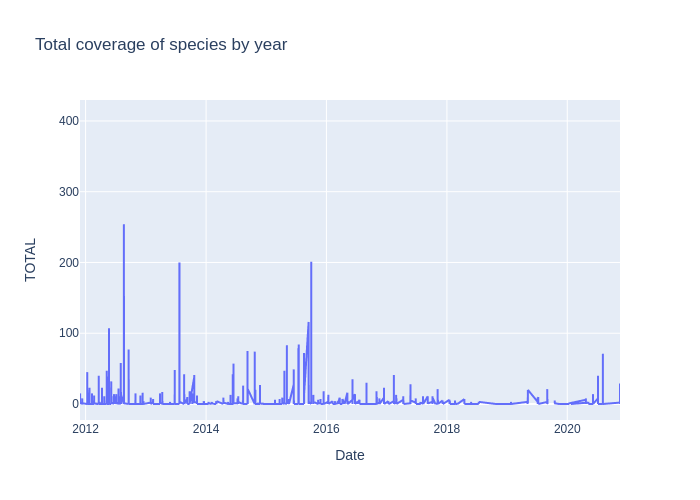

In [ ]:
# Plot total coverage by year using plotly
fig = px.line(df_mobile, x='Date', y='TOTAL',  title='Total coverage of species by year')
fig.show("png")

Data quality assesment findings: 
- The format of the date and hour fields is not correct, need to be fixed.
- Data has missing values:
  - substrate has blank values
  - Supratidal/Middle Intertidal column has multiple values for super, supra - they all seem to be same
  - there are blank values and '-' within Water temperature, however the observations for these species is 0

- There are 93 incorrectly formatted date stamps, in Mobile dataset, which need to be formated
- Some values for tide in mobile dataset is very high
- there are nan values for species coverage / observations
- There are multiple samples for same date and hour combination (from the QnA session, it was told that these are stratified samples for calibration)

Assess Data cleaning

- processing for Sessil Data:
  - Identify rows without seconds in Hour field and replace missing seconds with 00
  - Identify row which contain '.' in Hour field replace it with ':'
  - Drop columns that can be disregarded - 'Coluna1','Coluna2','observações'
  - Dropped species which have zero observations as they don't add any value to the analysis

- processing date and hour column for Mobil Data:
  - Take the absolute value of the decimal number, since we cannot have negative hours.
  - Multiply the absolute value by 24 to convert it to hours.
  - Separate the whole number from the decimal part. The whole number represents the hours and the decimal part represents the minutes and seconds combined.
  - Dropped species which have zero and 1 observations as they don't add any value to the analysis
  - Drop columns that can be disregarded - 'Sampler','TOTAL','Column1', 'Column2', 'Column3'
  - Tides which are high in mobile data are ignored, there are no observations for those rows


- Combine Date and Hour to create a new column Datetime, which can be used for EDA
- Impute missing values for categorial and numerical columns

####**Initial data cleaning**

In [ ]:
## define a function to convert the mixed format to HH:MM:SS format
def convert_to_hms(time):
    if ':' in str(time):  # if the value is already in HH:MM:SS format, return as is
        time=str(time)
        time_parts = str(time).split(':')
        hours = time_parts[0].zfill(2)
        hours = int(str(hours)[:2])
        minutes = time_parts[1]
        minutes = int(str(minutes)[:2])
        time = f"{hours}:{minutes}:00"
        new_time=time
    else:  # if the value is in decimal format, convert to HH:MM:SS format
        hours = int(time)  # get the whole number of hours
        hours = int(str(hours)[:2])
        minutes = int((time - hours) * 60)  # calculate the number of minutes
        minutes = int(str(minutes)[:2])
        seconds = int((((time - hours) * 60) - minutes) * 60)  # calculate the number of seconds
        seconds = int(str(seconds)[:2])
        new_time=f"{hours:02d}:{minutes:02d}:{seconds:02d}"  # format as HH:MM:SS
    return new_time

### define a function to clean the dataset
def data_cleaning(df_input, drop_columns, species='sessile'):
    '''
    function to clean the dataset
    '''
    step = ""
    print(f"Starting data cleaning process for {species} data:\n")
    # Do this so it doesn't mess up the input dataframe
    df = df_input[df_input.columns].copy()

    try:
      # Drop disregarded columns
      df.drop(drop_columns, axis=1, inplace=True)

      df.dropna(subset=['Date'],inplace=True)
      # convert hour to string to replace '.' with ':'
      df['Hour'] = df['Hour'].astype(str)
      df.loc[df['Hour'].str.contains('\.'), 'Hour'] = df.loc[df['Hour'].str.contains('.'), 'Hour'].str.replace('.', ':')
            
      # have to be mindful of hour being very large number, which might be an outlier
      # and we might have to call out, but for now we will take only first 2 digits 
      # - for instance in mobile data we have hour with more than 2 digits
      # 0:5104166666666666
      step = " adjust hour "
      df['Hour'] = df['Hour'].apply(convert_to_hms)
      step = " Hour fmt "
      df['Hour'] = pd.to_datetime(df['Hour'], format='%H:%M:%S').dt.strftime('%H:%M:%S')      
      
      step = " species cols "
      if species == 'mobile':          
          df.loc[1964, 'Date'] = df.loc[1963, 'Date']
          df.loc[1199, 'Date'] = df.loc[1200, 'Date']
          print(f"> Correcting Date and Hour format")
          step = " species cols extract "
          species_columns=df.columns[9:-1]

          sums = df[species_columns].sum().to_frame()
          try:
            df.drop(subset=sums[sums<=1].dropna(axis=0).T.columns.tolist(), axis=1, inplace=True)
          except:
            pass
      else:
          print(f"> Correcting Date and Hour format")
          species_columns = df.columns[9:]
          sums = df[species_columns].sum().to_frame()
          print(f"> Dropping species {sums[sums ==0].dropna(axis=0).T.columns.tolist()} which have 0 observations across dataset")
          try:
            df.drop(subset=sums[sums==0].dropna(axis=0).T.columns.tolist(), axis=1, inplace=True)
          except:
            pass
      # Combine date and time to single datetime column
      df['Datetime'] = pd.to_datetime(df['Date'].dropna().apply(str) + ' ' + df['Hour'].dropna().apply(str))

      # move Datetime column to first position
      df.insert(0, 'Datetime', df.pop('Datetime'))

      print(f"> Replace the NaN values for each species with 0")
      # replace the NaN values in each column in the list with 0
      for col in species_columns.to_list():
          df[col] = df[col].fillna(0)

      # Replace blank values with NaN
      df['Tide'] = df['Tide'].replace('', np.nan)

      print(f"> Drop rows with high tide values")
      ## delete rows with high tide values
      df = df.drop(df[df['Tide'].isin([173.13, 259.26, 345.39, 431.52, 517.65, 603.78, 689.91, 776.04, 862.17])].index)
      # Convert 'Tide' to numeric datatype
      df['Tide'] = pd.to_numeric(df['Tide'], errors='coerce')
      df['Tide'] = df.groupby(df['Datetime'].dt.quarter)['Tide'].transform(lambda x: x.fillna(x.median()))

      print(f"> Cleaning Substrate, Supratidal/Middle Intertidal, Zone columns")
      df = df.loc[df['Substrate'] != 0]
      df['Substrate'] = df['Substrate'].replace("nan", np.nan)
      df['Substrate'].dropna(inplace=True)
      df['Substrate'] = df['Substrate'].str.strip()
      df['Substrate'] = df['Substrate'].apply(lambda x: str(x).replace('Rock/ Canal', 'Rock/Canal').replace('Rock/canal', 'Rock/Canal'))
      df['Substrate'] = df['Substrate'].apply(lambda x: str(x).replace('Puddle/Rock/ Sea', 'Puddle/Rock/Sea'))

      df['Supratidal/Middle Intertidal'] = df['Supratidal/Middle Intertidal'].str.strip()
      df['Supratidal/Middle Intertidal'] = df['Supratidal/Middle Intertidal'].apply(lambda x: str(x).replace('supra', 'Supra').replace('Super', 'Supra'))

      # Replace blank values with NaN
      df['Water temperature (ºC)'] = df['Water temperature (ºC)'].replace('', np.nan)
      # Convert 'Water temperature' to numeric datatype
      df['Water temperature (ºC)'] = pd.to_numeric(df['Water temperature (ºC)'], errors='coerce')
      # impute using median temperature for the corresponding season
      df['Water temperature (ºC)'] = df.groupby(df['Datetime'].dt.quarter)['Water temperature (ºC)'].transform(lambda x: x.fillna(x.median()))

      df['Zone'] = df['Zone'].str.strip()

      df = df.drop(df[df['Water temperature (ºC)'] < 1].index)
    except Exception as ex:
        print(f"Error occurred: {ex} at step: {step}")
    return df

In [ ]:
df_sessile_corrected = data_cleaning(df_sessile, ['Sampler','TOTAL2','Coluna1','Coluna2','observações'], species='sessile')
df_sessile_corrected = df_sessile_corrected[df_sessile_corrected['Substrate']!='nan']

Starting data cleaning process for sessile data:

> Correcting Date and Hour format
> Dropping species ['Pollicipes pollicipes'] which have 0 observations across dataset
> Replace the NaN values for each species with 0
> Drop rows with high tide values
> Cleaning Substrate, Supratidal/Middle Intertidal, Zone columns


In [ ]:
df_mobile_corrected = data_cleaning(df_mobile, ['Sampler','TOTAL','Column1', 'Column2', 'Column3'], species='mobile')

Starting data cleaning process for mobile data:

> Correcting Date and Hour format
> Replace the NaN values for each species with 0
> Drop rows with high tide values
> Cleaning Substrate, Supratidal/Middle Intertidal, Zone columns


save the cleansed data to file

In [ ]:
# Save the cleansed data to file
df_sessile_corrected.to_csv(os.path.join(datapath,"Processed data/df_sessile_corrected.csv"),index=False)
df_mobile_corrected.to_csv(os.path.join(datapath,"Processed data/df_mobile_corrected.csv"),index=False)

### 2. EDA with insights

####**EDA for sessile species**

In [ ]:
# How many species?
species_columns = df_sessile_corrected.columns[9:]
print(f"There are columns for {len(species_columns)} sessile species")

There are columns for 92 sessile species


In [ ]:
# Report the time range of the sessil data
years = (df_sessile_corrected["Datetime"].max() - df_sessile_corrected["Datetime"].min()).days//365
days = (df_sessile_corrected["Datetime"].max() - df_sessile_corrected["Datetime"].min()).days%365
print(f"--> Sessile data covers {years} years and {days} days")

# Report the number of days on which observations were recorded
n_days = len(df_sessile_corrected["Date"].unique())
print(f"--> Observations were recorded on {n_days} individual days over this period")

# Report the interval between observations in the sessil data
interval = df_sessile_corrected['Datetime'].sort_values() - df_sessile_corrected['Datetime'].sort_values().shift(1)
print(f"--> Median {interval.median()} between observations")

# Report the number of observations per zone
print("--> Number of observations per zone:")
print(df_sessile_corrected["Zone"].value_counts())

--> Sessile data covers 8 years and 355 days
--> Observations were recorded on 193 individual days over this period
--> Median 0 days 00:15:00 between observations
--> Number of observations per zone:
A    625
E    510
D    433
B    352
F     80
Name: Zone, dtype: int64


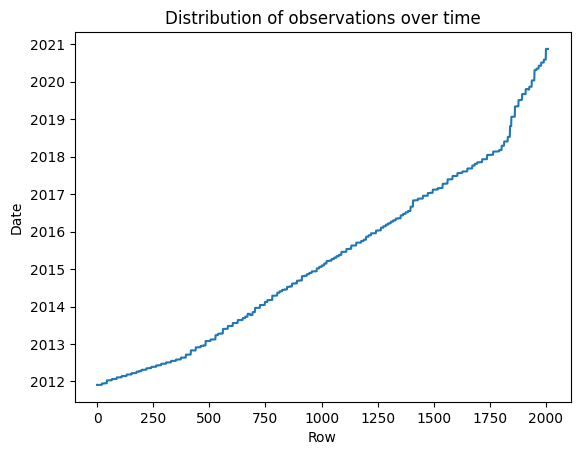

In [ ]:
# Plot the timestamps
plt.plot(df_sessile_corrected["Datetime"])
plt.xlabel("Row")
plt.ylabel("Date")
plt.title("Distribution of observations over time")
plt.show()

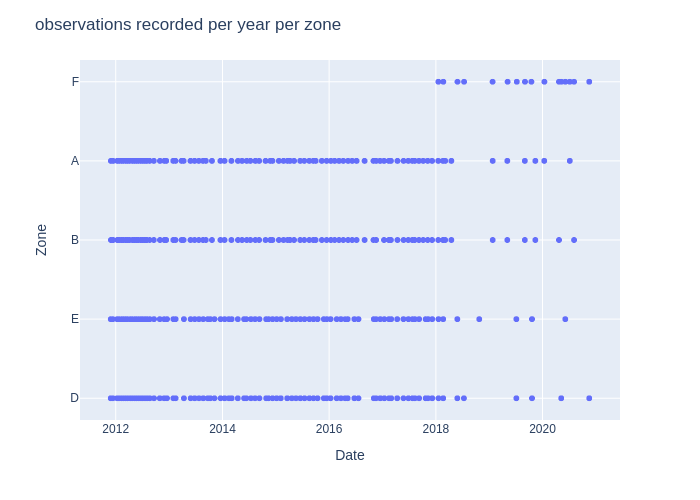

In [ ]:
fig = px.scatter(df_sessile_corrected, x="Date", y="Zone")
# Set axis and chart titles
fig.update_layout(title='observations recorded per year per zone')
fig.show("png")

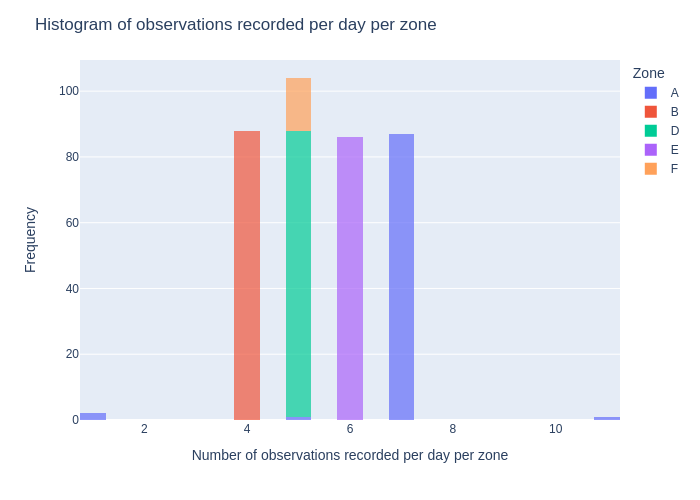

In [ ]:
# Group by Zone and Date and count number of observations
obs_count = df_sessile.groupby(['Zone', 'Date'])['Hour'].count().reset_index()
obs_count.rename(columns={'Hour': 'count'}, inplace=True)

# Create histogram using Plotly
fig = px.histogram(obs_count, x='count', color='Zone', nbins=50, opacity=0.7)

# Set axis and chart titles
fig.update_layout(title='Histogram of observations recorded per day per zone',
                  xaxis_title='Number of observations recorded per day per zone',
                  yaxis_title='Frequency')

# Show the plot
fig.show("png")

In [ ]:
# Plot seasonal trends
def plot_monthly_ave(df, column):

    monthly_ave = df.groupby('month')[column].mean()
    monthly_std = df.groupby('month')[column].std()
    upper = monthly_ave + monthly_std
    lower = monthly_ave - monthly_std
    plt.fill_between(range(1, 13), lower, upper, alpha=0.25)
    plt.plot(monthly_ave.index, monthly_ave.values)
    plt.xticks(rotation=90)
    plt.xlabel('Month')
    plt.ylabel('Average')
    plt.title(f'Average {column} per month')
    plt.show()

df_sessile_corrected['month'] = df_sessile_corrected['Datetime'].dt.month

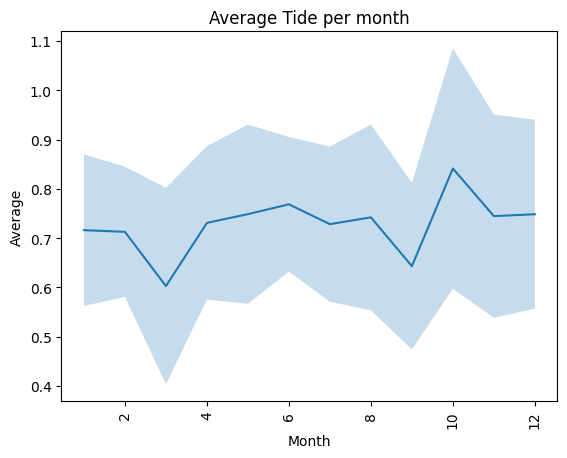

In [ ]:
# Plot seasonal trends in tide
plot_monthly_ave(df_sessile_corrected, "Tide")

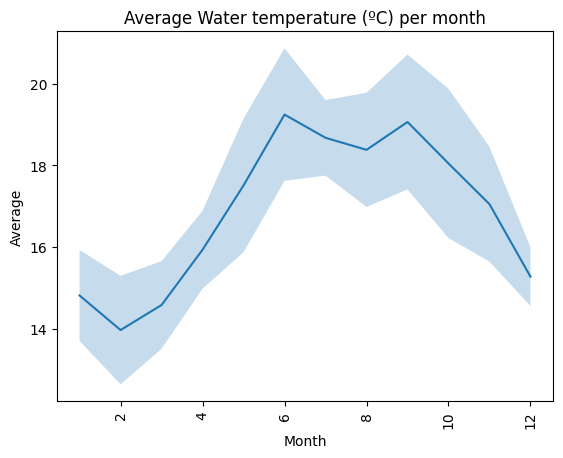

In [ ]:
# Plot seasonal trends in water temperature
plot_monthly_ave(df_sessile_corrected, "Water temperature (ºC)")

Summary of sessil EDA
- There are several hundred rows (observations) for every zone apart from F, which has fewer observations.
- Observations were made on 194 days over a 9-year period, which are fairly evenly spread albeit with fewer in 2018/2019. On days when observations were made, there are 4-8 rows per day.
- There are huge variations in the number of species recorded per species over the whole period: 35 out of 92 species have less than 10 sightings in total over 9 years, while other species have thousands of counts. The sightings are also pretty independent, with correlations around 0, although taken over a longer timespan (e.g. recordings in the same month or year) might reveal higher correlations or anti-correlations

####**EDA for mobile species**

In [ ]:
# How many species?
mobile_columns = df_mobile_corrected.columns[9:-1]
print(f"There are {len(mobile_columns)} columns for mobile species")

There are 57 columns for mobile species


In [ ]:
# Report the time range of the mobil data
years = (df_mobile_corrected["Datetime"].dropna().max() - df_mobile_corrected["Datetime"].dropna().min()).days//365
days = (df_mobile_corrected["Datetime"].dropna().max() - df_mobile_corrected["Datetime"].dropna().min()).days%365
print(f"Sessil data covers {years} years and {days} days")

# Report the number of days on which observations were recorded
n_days = len(df_mobile_corrected["Date"].unique())
print(f"Observations were recorded on {n_days} individual days over this period")

# Report the interval between observations in the mobil data
interval = df_mobile_corrected['Datetime'].sort_values() - df_mobile_corrected['Datetime'].sort_values().shift(1)
print(f"Median {interval.median()} between observations")

# Report the number of observations per zone
print("Number of observations per zone:")
print(df_mobile_corrected["Zone"].value_counts())

Sessil data covers 8 years and 355 days
Observations were recorded on 193 individual days over this period
Median 0 days 00:15:00 between observations
Number of observations per zone:
A    617
E    499
D    436
B    364
F     80
Name: Zone, dtype: int64


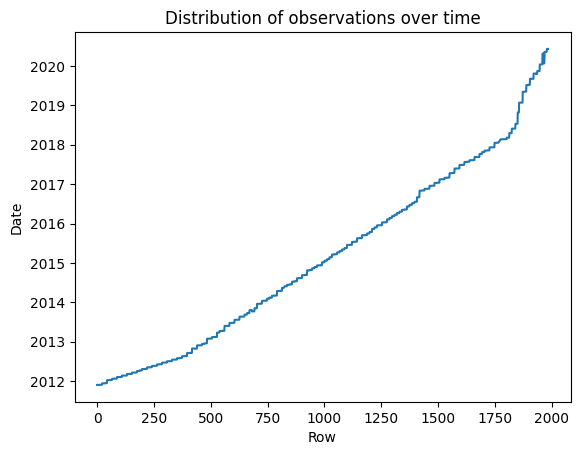

In [ ]:
# Plot the timestamps
plt.plot(df_mobile_corrected["Datetime"][:1960])
plt.xlabel("Row")
plt.ylabel("Date")
plt.title("Distribution of observations over time")
plt.show()

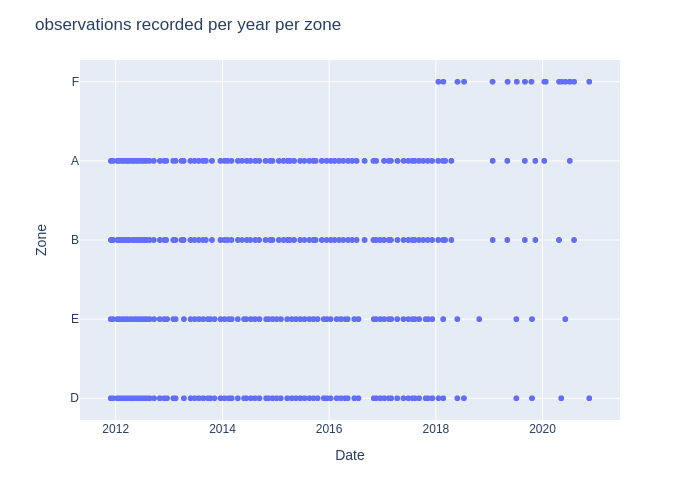

In [ ]:
fig = px.scatter(df_mobile_corrected, x="Date", y="Zone")
fig.update_layout(title='observations recorded per year per zone')
fig.show("png")

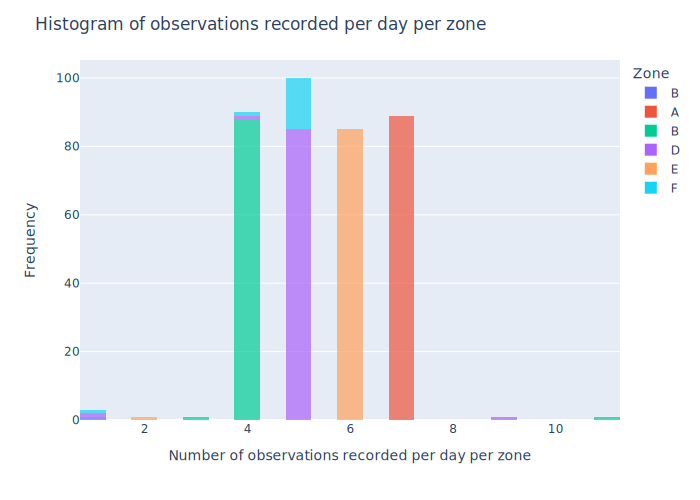

In [ ]:
# Group by Zone and Date and count number of observations
obs_count = df_mobile.groupby(['Zone', 'Date'])['Hour'].count().reset_index()
obs_count.rename(columns={'Hour': 'count'}, inplace=True)

# Create histogram using Plotly
fig = px.histogram(obs_count, x='count', color='Zone', nbins=50, opacity=0.7)

# Set axis and chart titles
fig.update_layout(title='Histogram of observations recorded per day per zone',
                  xaxis_title='Number of observations recorded per day per zone',
                  yaxis_title='Frequency')

# Show the plot
fig.show("svg")

Median of species' mean coverage is 0.00501002004008016
44 species had a coverage of 0 on at least 99% of observations


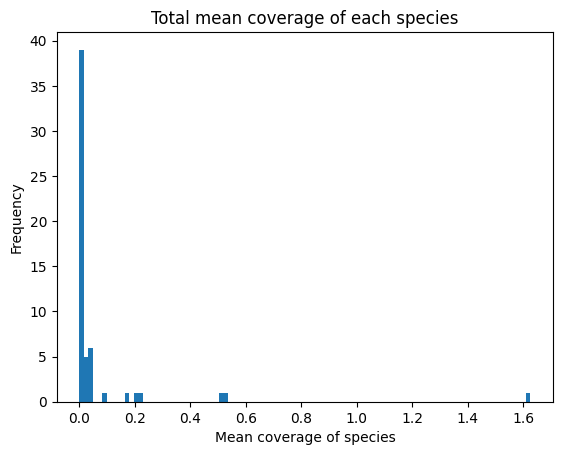

In [ ]:
# How many of each species observed in total?
df_mobile_corrected[mobile_columns] = df_mobile_corrected[mobile_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'))
print(f"Median of species' mean coverage is {df_mobile_corrected[mobile_columns].mean().median()}")
np.mean(df_mobile_corrected[mobile_columns] > 0)
print(f"{np.sum(np.mean(df_mobile_corrected[mobile_columns] > 0) < 0.01)} species had a coverage of 0 on at least 99% of observations")
plt.hist(df_mobile_corrected[mobile_columns].mean(), 100)
plt.xlabel("Mean coverage of species")
plt.ylabel("Frequency")
plt.title("Total mean coverage of each species")
plt.show()

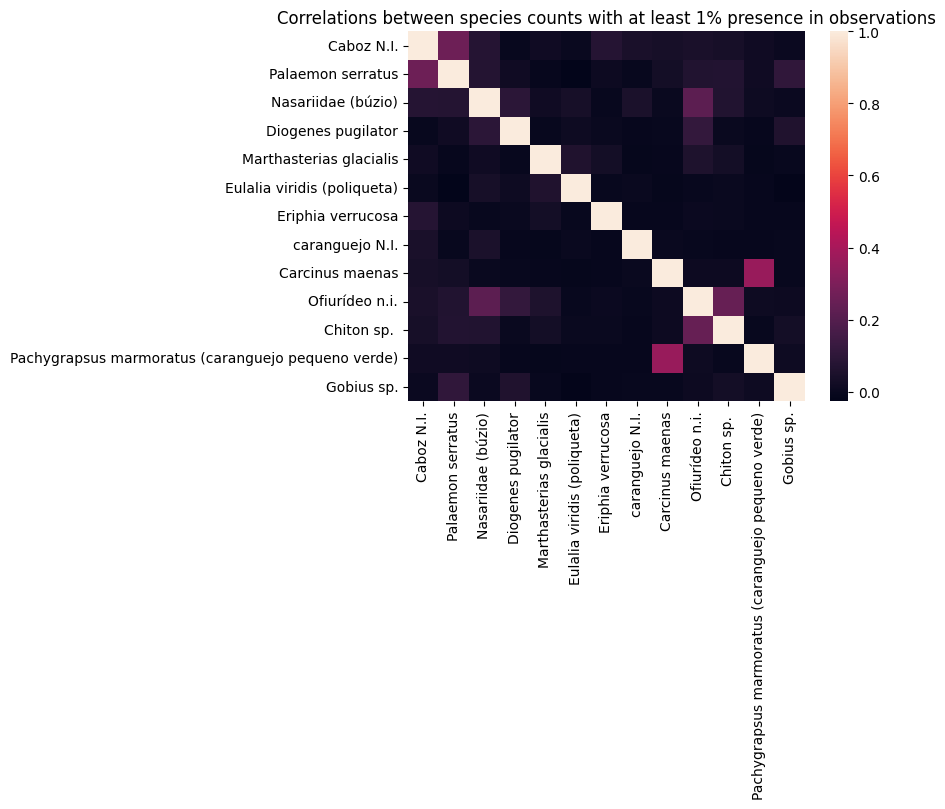

In [ ]:
# Plot heatmap of correlations between species counts
species_at_least_001 = mobile_columns[np.mean(df_mobile_corrected[mobile_columns] > 0) >= 0.01]
df_mobile_corrected[species_at_least_001].corr()
sns.heatmap(df_mobile_corrected[species_at_least_001].corr())
plt.title("Correlations between species counts with at least 1% presence in observations")
plt.show()

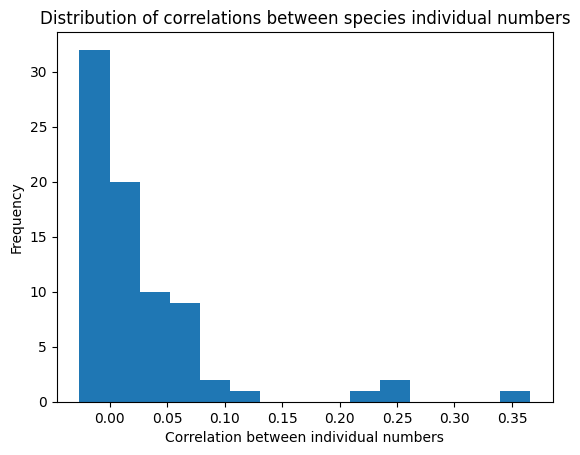

In [ ]:
# Plot histogram of correlations between species counts
triu = np.triu(np.ones_like(df_mobile_corrected[species_at_least_001].corr(), dtype=bool), k=1)
correlations = df_mobile_corrected[species_at_least_001].corr().where(triu).stack()
plt.hist(correlations, 15)
plt.xlabel("Correlation between individual numbers")
plt.ylabel("Frequency")
plt.title("Distribution of correlations between species individual numbers")
plt.show()

Summary of mobile EDA
- The recordings are very similar to sessil data: roughly the same distribution over rows, recordings made over the same time period.
- The coverage of species in general is very low. 44 out of 57 species recorded a coverage of 0 for at least 99% of the observations.
- Of the species with higher coverage, some of them appear to be somewhat positively correlated: this might reflect breeding patterns at the same time of the year, and/or common factors influencing the numbers of multiple species.
- The seasonal trends in species coverage is variable over years: many species have some months of the year where they are barely seen, and other months where their numbers are highly variable. This means there are likely to be factors which vary from year to year that influence their numbers.

### 3. Feature engineering

Feature engineering is an important aspect of this challenge. We considered the following things:

1. We know that the time of year is important for observing species, especially mobile species, so we create a categorical feature for seasons derived from the months of the year.
2. There are 92 sessile and 57 mobile species in total: creating a separate model for each one would be too complex for the model and feature selection stage, but creating one model for all of them ignores the likelihood that different species are affected by different factors. As a balance between these two extremes, we divide the data into sessile flora (plant species), sessile fauna (animal species), and mobile species (animals, by definition). So we add the "species classification" column to handle this.
3. Conservationists are most concerned with the most endangered species, so we combine this data to better interpret the model results: information on 'Invasive (Yes/No)','Conservation Status (IUCN)'.
4. To prepare our data for machine learning, we create separate rows for each species, with target columns as percentage coverage and number of individuals for sessile and mobile species, respectively.
5. We are provided with data on the location of the sample (e.g. substrate and supratidal or middle intertidal) and the condition under which the sample was taken (weather and tidal), but there are many more factors that can influence the ecosystem, so we researched other likely factors and collected additional data to include in our models.


**Additional Data Collection**

Based on the challenge brief, it was recommended that we could identify and collect other relevant data. We identified the following factors which are believed to be important in the marine biology literature, and identified sources of data which can be used as direct measures or indirect proxies of them.

* **Salinity** ([ref](https://www.sciencedirect.com/science/article/pii/S0957417422010983)): we could not find salinity data for this region over this time period, but evaporotranspiration is known to affect intertidal salinity levels, so we collected data on evaporotranspiration from Open-Meteo.com
* **Water temperature** ([ref](https://www.sciencedirect.com/science/article/pii/S0957417422010983)): this is provided in the sessile and mobile datasets
* **Light availability** ([ref](https://doi.org/10.1002/9781444316285.ch5)): this depends on the depth/slope of the seabed and also weather factors, so we collected data on cloud cover (total, low, mid and high), direct radiation, diffuse radiation and direct normal irradiance from Open-Meteo.com
* **Wave exposure** ([ref](https://doi.org/10.1002/9781444316285.ch5)): this depends on the distance to shore and also the wind, so we collected data on wind direction and wind gusts from Open-Meteo.com
* **Nutrient availability**: this is affected by rainfall which itself can carry dissolved nutrients, so we collected data on precipitation from Open-Meteo.com
* **Water availability** ([ref](https://doi.org/10.1002/9781444316285.ch5)): because this habitat is intertidal, water availability is variable. Water availability is affected not only by precipitation but also the moisture in the air, so we collected data on relative humidity and vapour pressure deficit from Open-Meteo.com

Several data sources appeared relevant but did not hold data relevent to the Cascais region or the period of interest:
* Oxygen level: https://data.giss.nasa.gov/cgi-bin/o18data/geto18.cgi?cmd=plot&id=tmp047742393
* Salinity: https://data.pmel.noaa.gov/generic/erddap/tabledap/cchdo_ctd.html & https://datasetsearch.research.google.com/search?src=2&query=Temperature%2C%20salinity%2C%20density%20and%20dissolved%20oxygen%20profiles%20from%20the%20World%20Ocean%20Database%20and%20Argo%20floats%20in%20the%20eastern%20South%20Pacific%20over%20the%201928-2018%20period&docid=L2cvMTFxcHoxbTc5NQ%3D%3D
* Acidification: https://www.ncei.noaa.gov/access/ocean-carbon-acidification-data-system-portal/
* Chlorophyll-a: https://developers.google.com/earth-engine/datasets/tags/chlorophyll-a

We did not find open data sources related to human factors, for example water pollution, fishing, or the number of people in the Avencas MPA.

Weather data from [Open-Meteo](https://open-meteo.com/en/docs/historical-weather-api#latitude=38.70&longitude=-9.42) API for Cascais region
is based on the Latitude (38.70) and Longitude (-9.42) data for Cascais.

#### Feature engineering for weather data

We identified 14 environmental variables that could be used to predict the number of individuals or percentage coverage of intertidal species. But it is not obvious over what time period these variables affect ecosystem dynamics: this may depend on seasonal events, reproductive cycles, and so on. Here we assess a likely time period over which to gather weather data by taking the average of weather observations for:
* the last 1 day before species samples were taken
* the last 1 week (7 days)
* the last 1 month (30 days)
* the last 6 months (180 days)
* the last 1 year (365 days)

For each species, we calculate the correlation between the species presence and the historical weather observations, using the mean, standard deviation, minimum and maximum. Time periods and weather variables with a large (negative or positive) correlation indicate how we can best engineer these features for our predictive models.

Specifically, the following weather features are collected from Open-Meteo:
```
'relativehumidity_2m (%)', 'pressure_msl (hPa)',
'precipitation (mm)', 'cloudcover (%)', 'cloudcover_low (%)',
'cloudcover_mid (%)', 'cloudcover_high (%)', 'direct_radiation (W/m²)',
'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
'winddirection_100m (°)', 'windgusts_10m (km/h)',
'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)'
```

In [ ]:
# Load weather features
weather_features = pd.read_csv("../Processed data/weather_features.csv", header = [0, 1, 2], index_col=0)

In [ ]:
# Combine weather data with mobile data

weather_features.index = pd.to_datetime(weather_features.index)
weather_features.index = [x.strftime("%Y-%m-%d %H:%M:%S") for x in weather_features.index]
df_mobile_corrected["Date"] = pd.to_datetime(df_mobile_corrected["Date"])
df_mobile_corrected["date_str"] = df_mobile_corrected["Date"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
mobile_weather_merged = df_mobile_corrected.merge(weather_features, left_on="date_str", right_index=True, how="left")
mobile_weather_merged.drop(columns="date_str", inplace=True)

In [ ]:
# Combine weather data with sessile data

weather_features.index = pd.to_datetime(weather_features.index)
weather_features.index = [x.strftime("%Y-%m-%d %H:%M:%S") for x in weather_features.index]
df_sessile_corrected["Date"] = pd.to_datetime(df_sessile_corrected["Date"])
df_sessile_corrected["date_str"] = df_sessile_corrected["Date"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
sessile_weather_merged = df_sessile_corrected.merge(weather_features, left_on="date_str", right_index=True, how="left")
sessile_weather_merged.drop(columns="date_str", inplace=True)

In [ ]:
def plot_weather_correlations(df, feature, feature_name, species_list, summer_only=False, time_lags=[1, 7, 30, 180, 365]):

  if summer_only:
    df["month"] = df['Date'].dt.month

  fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
  xdata = range(1, len(time_lags)+1)

  def plot_one_metric(ax, metric):

    # Calculate correlations between each time lag and each species' abundance
    corr_data = np.zeros([len(species_list), len(time_lags)])
    for i, species in enumerate(species_list):
      for j, t in enumerate(time_lags):
        try:
          if summer_only:
            corr_data[i][j] = abs(df[[f"{species}", (f"{feature}", f"{metric}", f"{t}")]].loc[df["month"].apply(lambda x: x in [6, 7, 8])].apply(pd.to_numeric, errors = 'coerce').dropna().corr().values[0][1])
          else:
            corr_data[i][j] = abs(df[[f"{species}", (f"{feature}", f"{metric}", f"{t}")]].apply(pd.to_numeric, errors = 'coerce').dropna().corr().values[0][1])
        except Exception as e:
          print(f"Problem with {species}")
          print(e)
          print(df[[f"{species}", (f"{feature}", f"{metric}", f"{t}")]].dropna())
          break
        # Plot correlations
      ax.scatter(xdata, corr_data[i], s=5, c='k', marker='o', alpha=0.25)
    # Plot interquartile range of correlations
    ax.fill_between(xdata, np.nanpercentile(corr_data, 25, 0), np.nanpercentile(corr_data, 75, 0), facecolor='b', alpha=0.25)
    # Plot average correlation
    ax.plot(xdata, np.nanmedian(corr_data, 0), c='b')
    ax.set_title(f"{metric}")

  # Label figure and subplots
  plot_one_metric(ax[0][0], "mean")
  plot_one_metric(ax[0][1], "std")
  plot_one_metric(ax[1][0], "max")
  plot_one_metric(ax[1][1], "min")
  fig.suptitle(feature_name, fontsize=16)
  fig.supylabel('Absolute correlation coefficient')

  # Axis labels
  for i in [0, 1]:
    for j in [0, 1]:
      ax[1][j].set_xlabel("Historical period (days)")
      ax[i][j].set_xticks(xdata)
      ax[i][j].set_xticklabels(time_lags)
  plt.tight_layout()
  plt.show()

In [ ]:
feature_name_mapping = {
    "relativehumidity_2m (%)": "Relative humidity",
    "pressure_msl (hPa)": "Sea level pressure",
    "precipitation (mm)": "Precipitation",
    "cloudcover (%)": "Total cloud cover",
    "cloudcover_low (%)": "Low cloud cover",
    "cloudcover_mid (%)": "Mid cloud cover",
    "cloudcover_high (%)": "High cloud cover",
    "direct_radiation (W/m²)": "Direct radiation",
    "diffuse_radiation (W/m²)": "Diffuse radiation",
    "direct_normal_irradiance (W/m²)": "Direct normal irradiance",
    "winddirection_100m (°)": "Wind direction",
    "windgusts_10m (km/h)": "Wind gusts",
    "et0_fao_evapotranspiration (mm)": "Evapotranspiration",
    "vapor_pressure_deficit (kPa)": "Vapour pressure deficit"
}

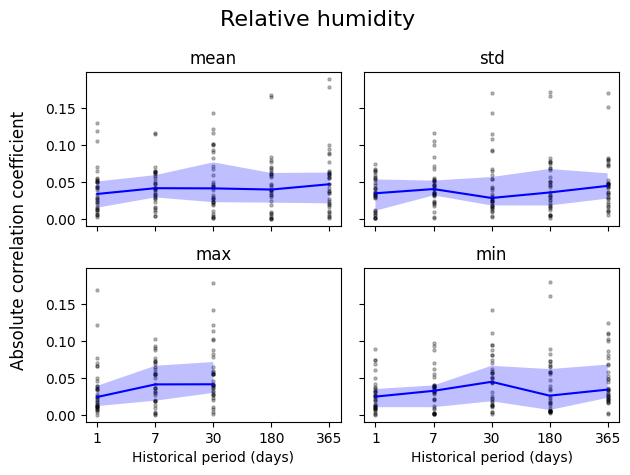

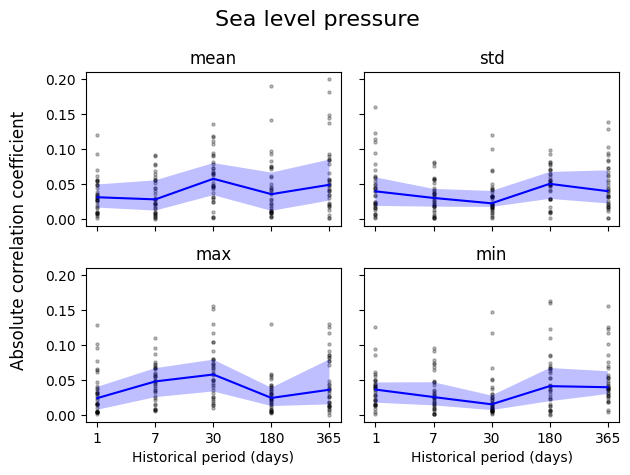

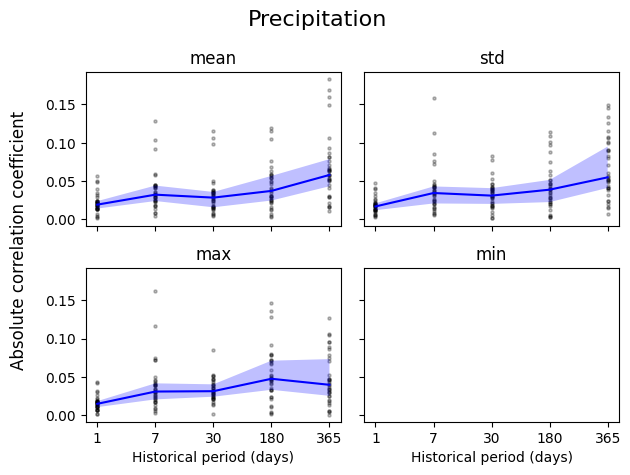

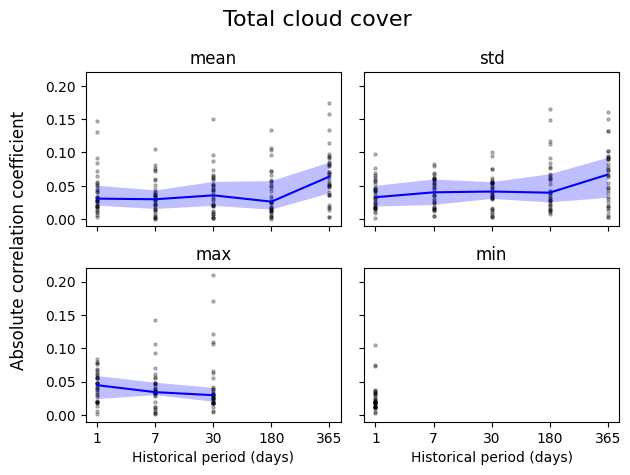

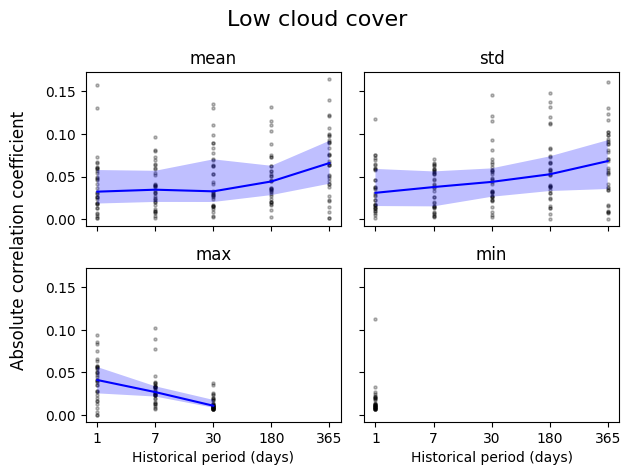

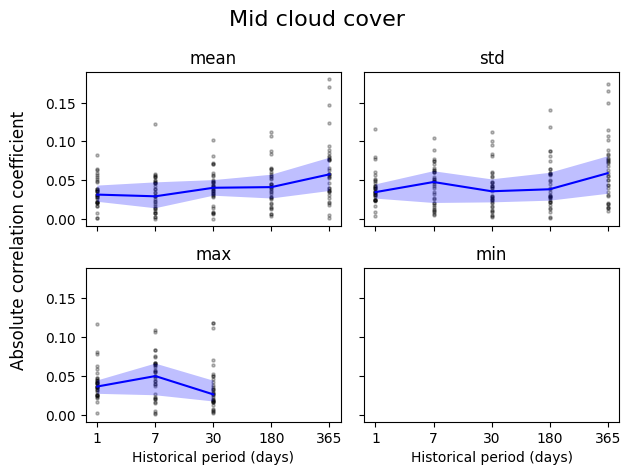

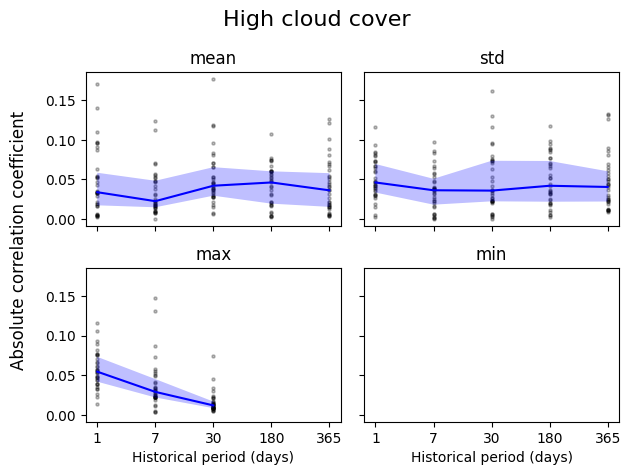

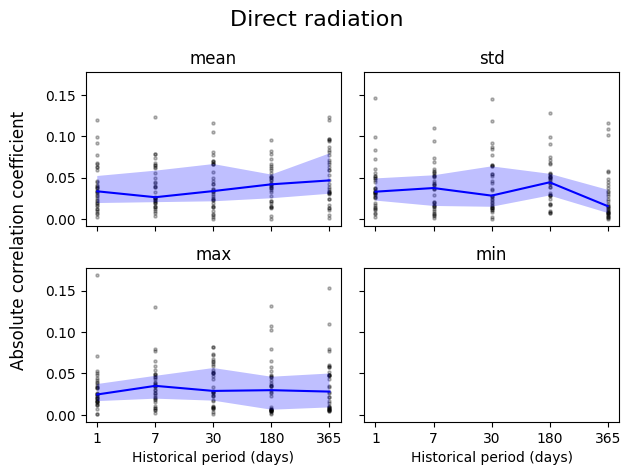

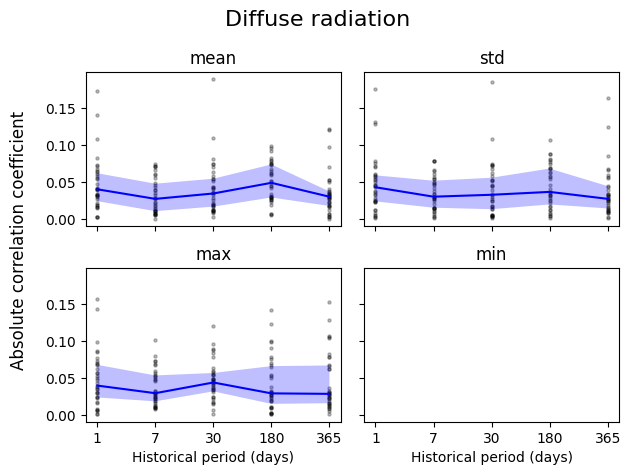

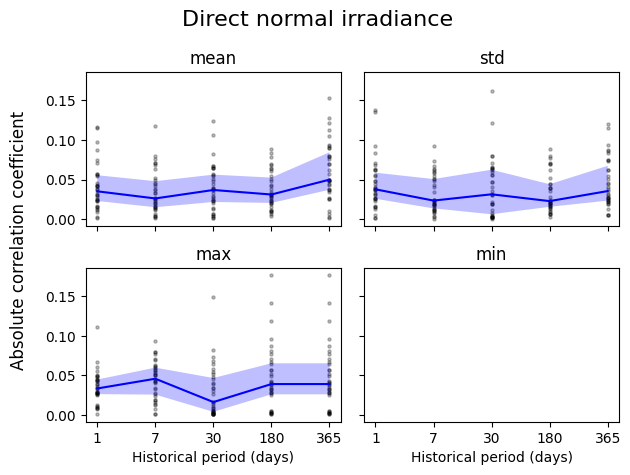

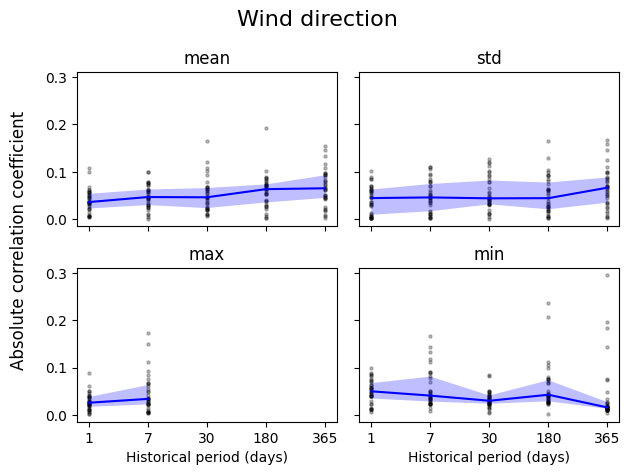

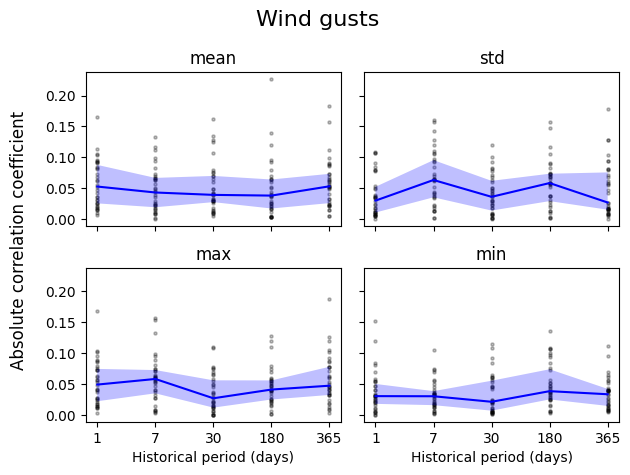

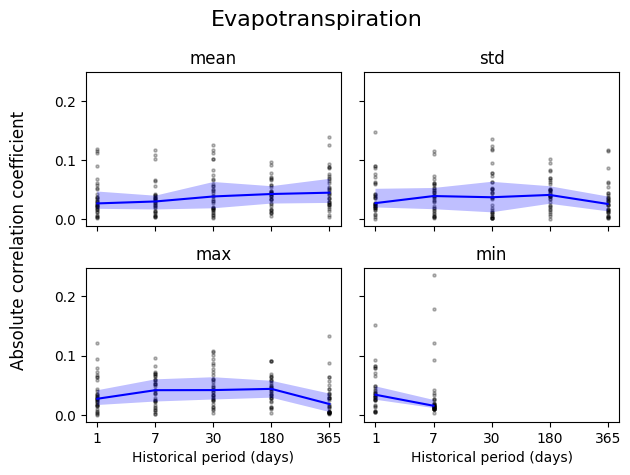

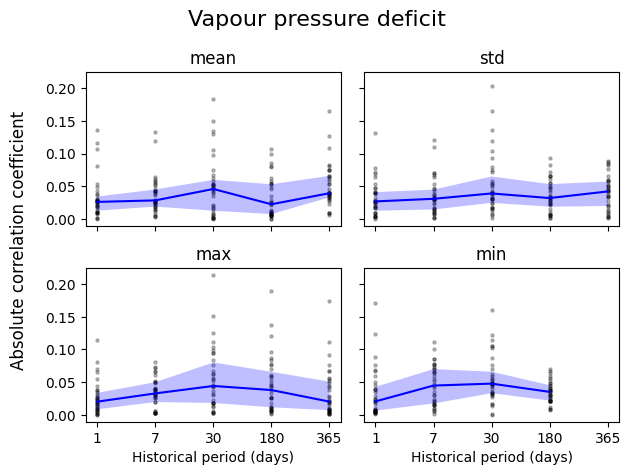

In [ ]:
# Plot correlations for mobile species (summer months only)
species_list = mobile_weather_merged.columns[9:65]

for feature, name in feature_name_mapping.items():
  plot_weather_correlations(mobile_weather_merged, feature, name, species_list, True)

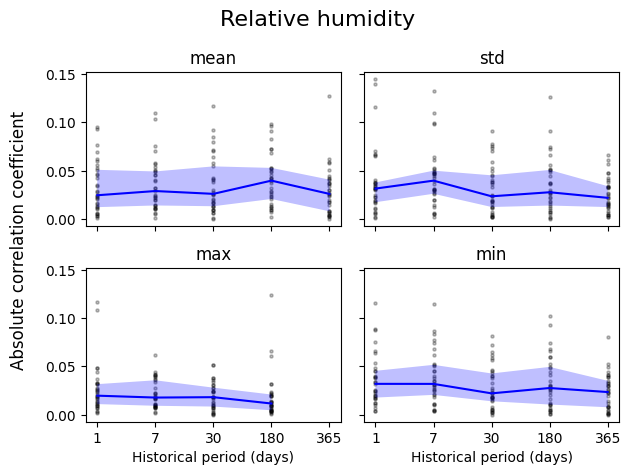

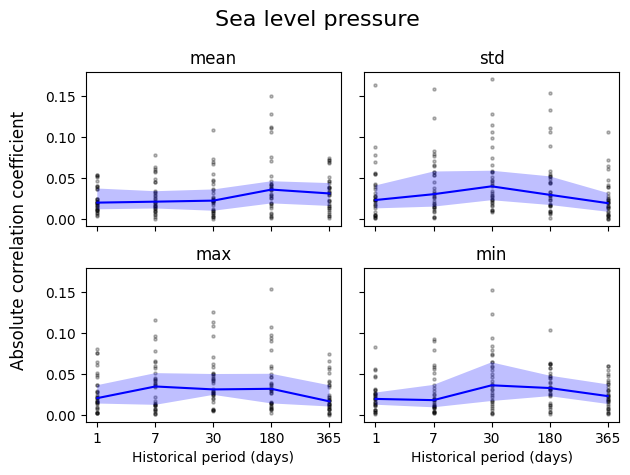

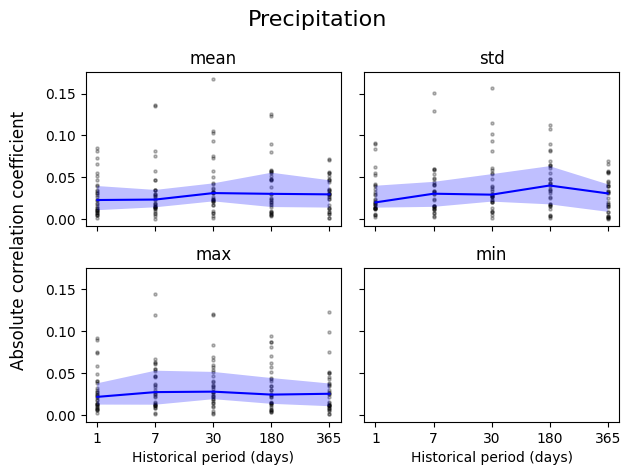

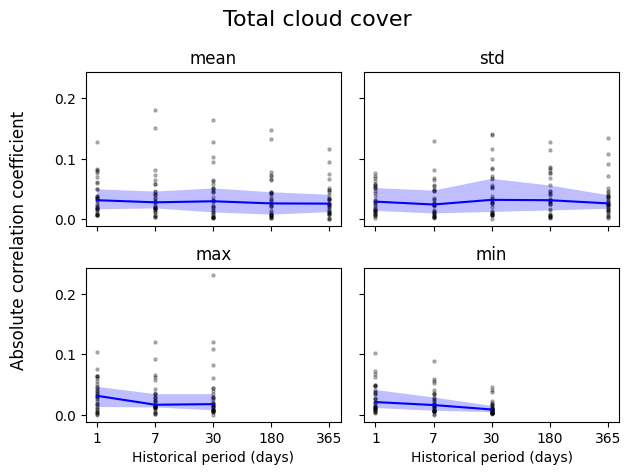

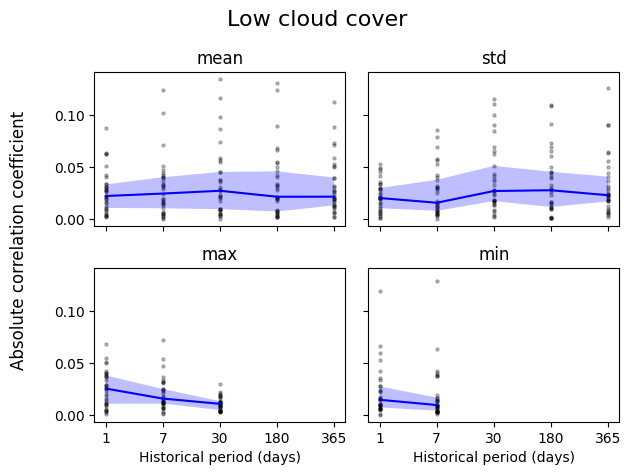

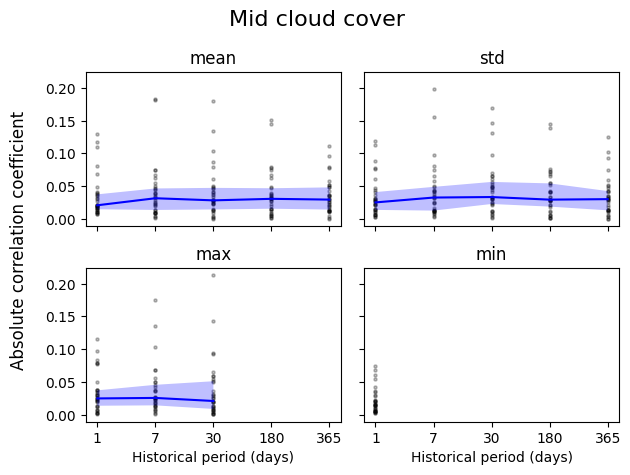

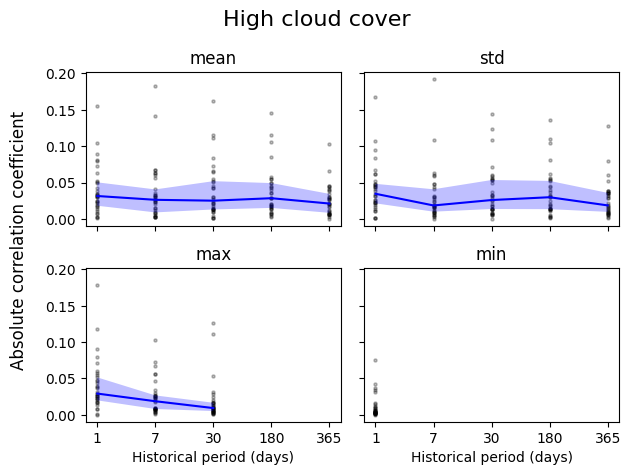

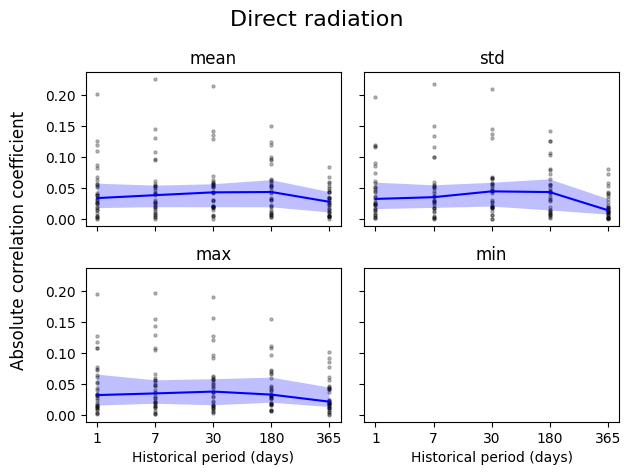

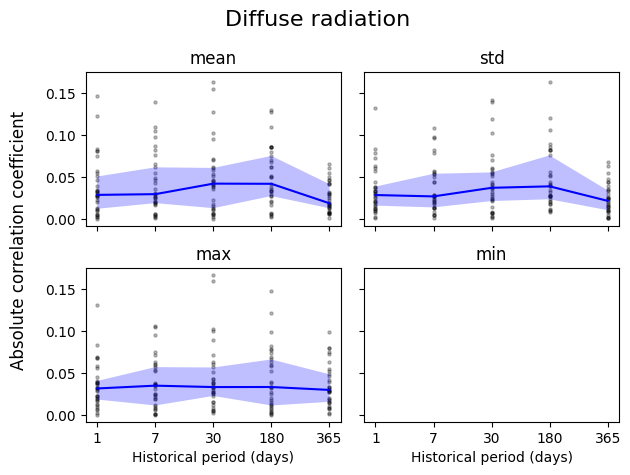

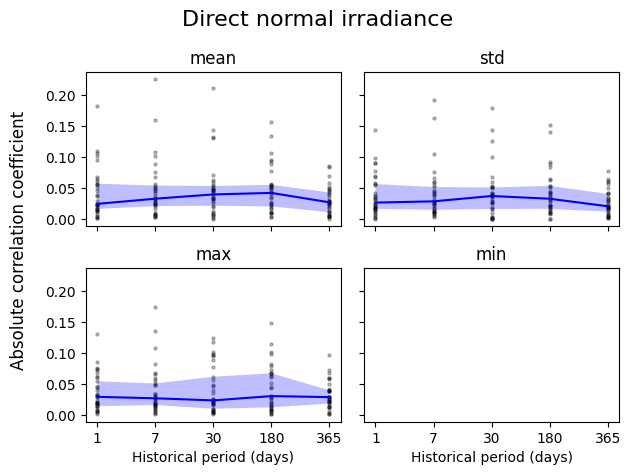

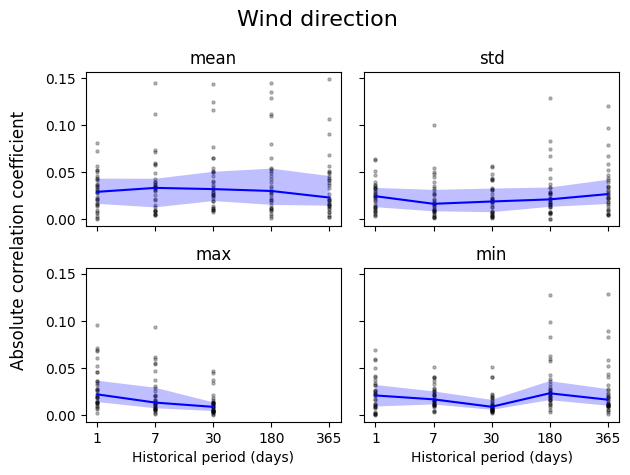

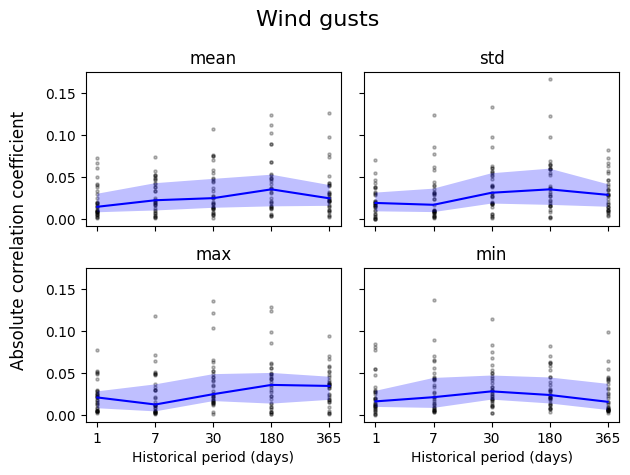

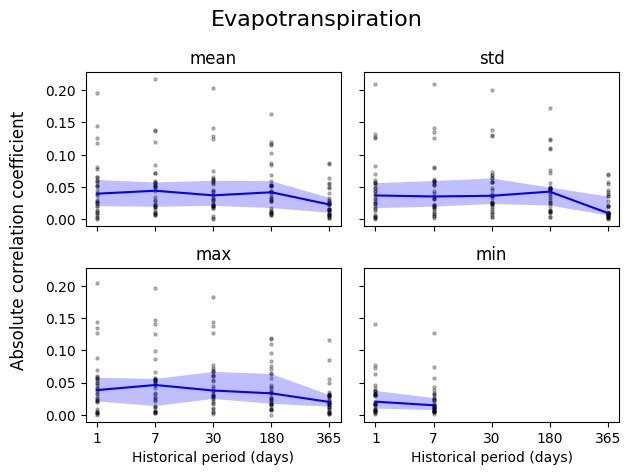

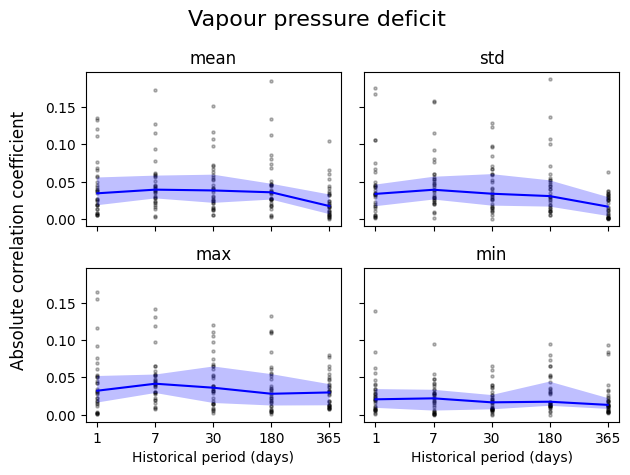

In [ ]:
# Plot correlations for sessile plants
species_list = ['Verrucaria maura ', 'Lichina pygmaea (líquene folhoso)',
       'Coralina elongata', 'Lithophillum incrustans',
       'Litophylum lichenoides', 'Litophylum tortuosum',
       'Mesophylum lichenoides', 'Gelidium sp. (tipo raquete)',
       'Asparagopsis armata (tufosa)', 'Asparagopsis armata (adulta)',
       'Porphyra sp.', 'Mastocarpus sp. (alga preta só mediolitoral)',
       'Gigartina sp. (língua do diabo)', 'Plocamium sp.', 'Caulacanthus sp.',
       'Hildenbrandia sp. (incrustante vermelha)',
       'Chondria coerulescens (alga verde/azul filamentosa)', 
       'Osmundea pinnatifida', 'Ahnfeltiopsis devoniensis',
       'Stypocaulon scoparium (alga verde tufosa que parece pinheiro)',
       'Ulva rigida', 'Cladophora sp. (limo)', 
       'Ulva intestinalis', 'Ulva sp. ', 'Codium sp. (alga verde carnuda)',
       'Nemoderma sp.(alga tipo musgo)', 'Cladostephus spongiosus (codium que parece que tem areia)',
       'Codium adhaerens (tipo nenúfar)', 'Colpomenia sinuosa (alga bolhas)',
       'Fucus vesiculosus ', 'Dictyota dichotoma (alga azul laminada)',
       'Sphacelaria rigidula (pompons castanhos)',
       'Laminaria sp.']

for feature, name in feature_name_mapping.items():
  plot_weather_correlations(sessile_weather_merged, feature, name, species_list, False)

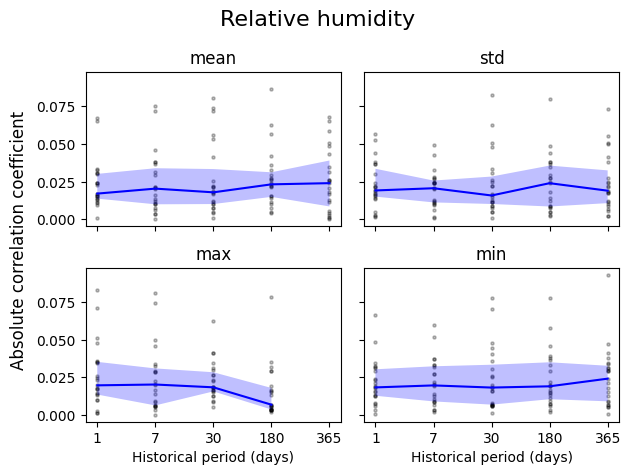

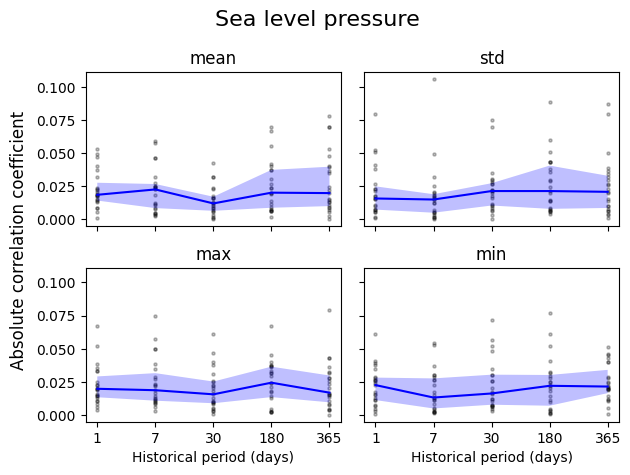

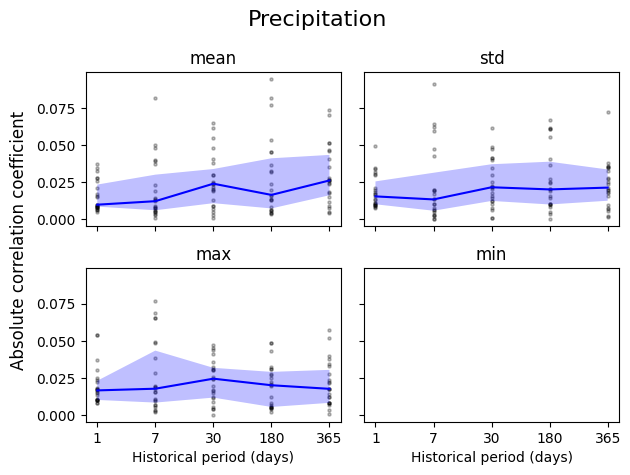

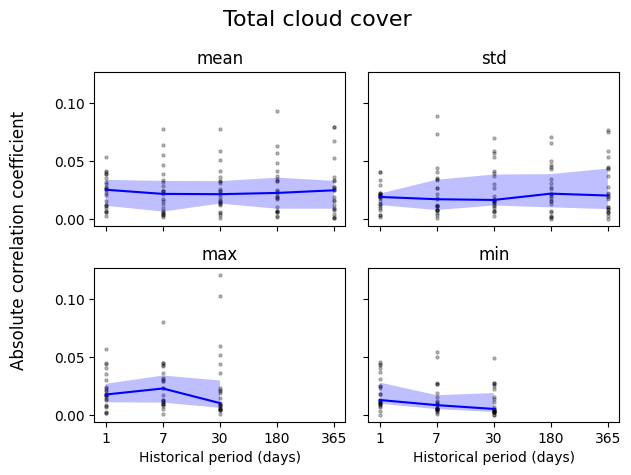

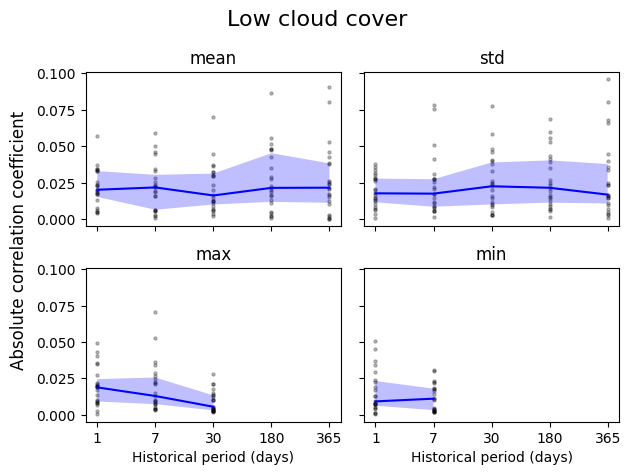

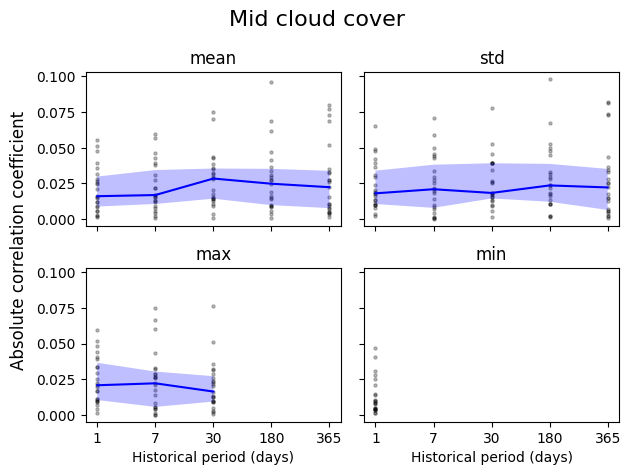

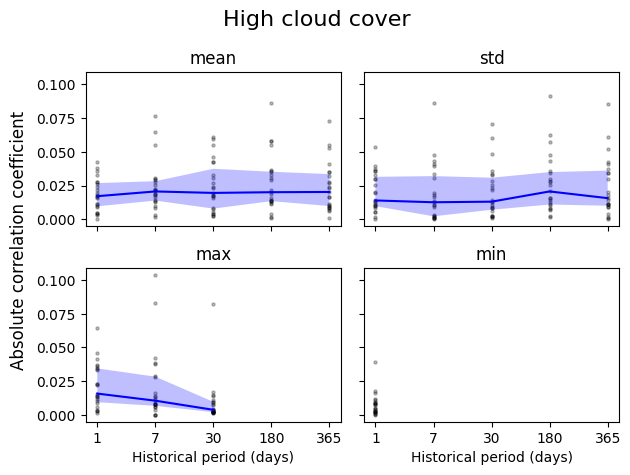

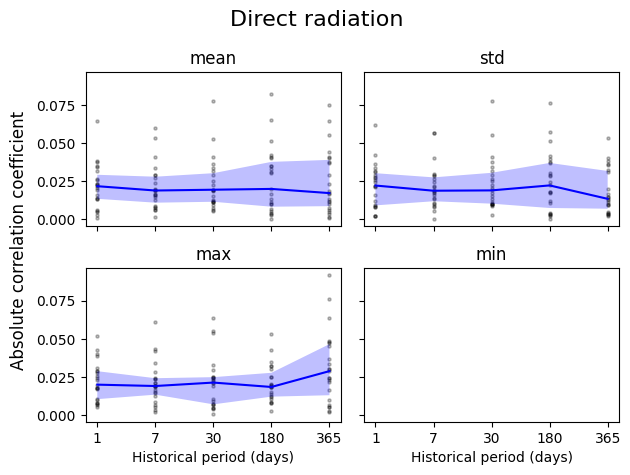

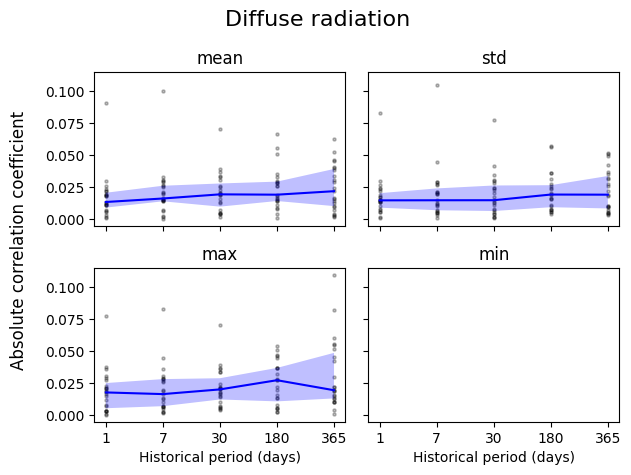

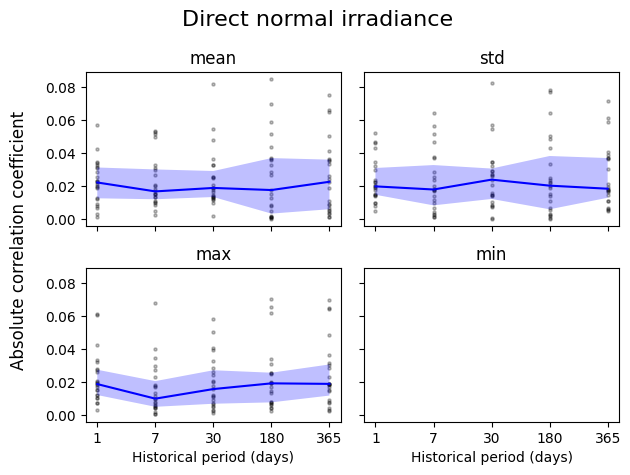

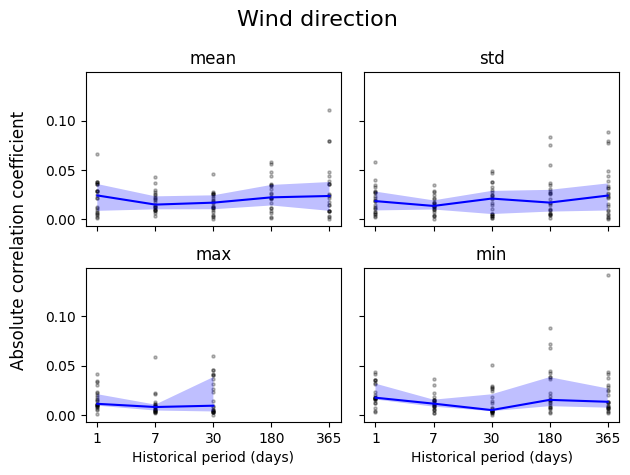

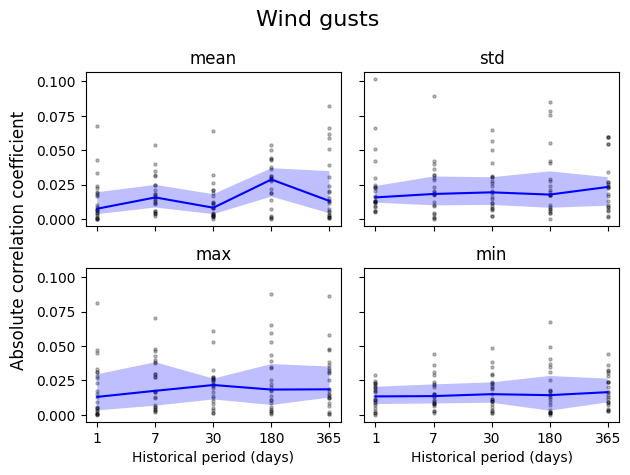

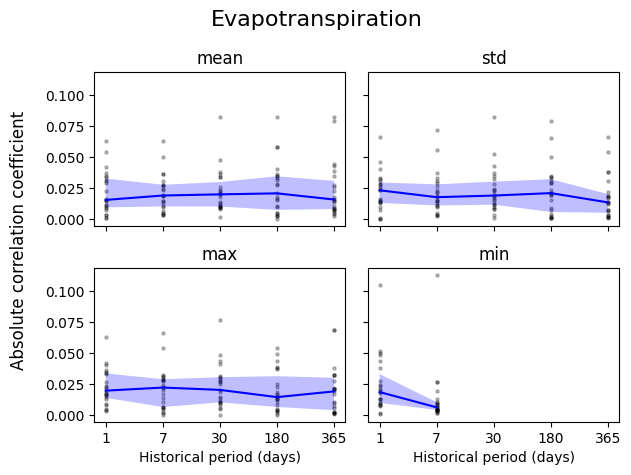

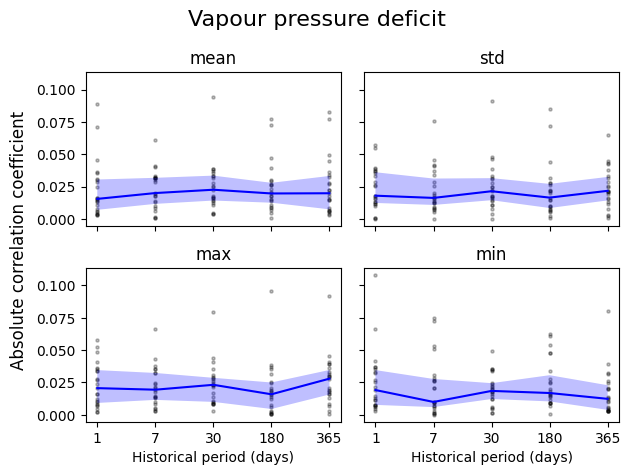

In [ ]:
# Plot correlations for sessile animals
species_list = ['Chthamalus sp.', 'Balanus perforatus', 'Patella sp.',
       'Siphonaria algesirae', 'Gibbula sp.', 'Monodonta lineata',
       'Littorina neritoides', 'Mytillus sp.', 'Nassariidae (búzio)',
       'Chiton sp.', 'Pollicipes pollicipes', 'Actinia equina ',
       'Anemonia sulcata ', 'Ophiothrix sp.', 'Paracentrotus lividus',
       'Hymeniacidon sanguinea', 'Aglaophenia pluma (hidrozoário branco ramificado)',
       'Sabellaria alveolata  (tubos)',
       'Cerianthidae', 'Anémona N.I.', 'Actinia fragacea',
       'Actinothoe sphyrodeta (anémona branca e laranja)',
       'Oncidiella celtica (lesma)', 'Calliostoma sp. (burrié bicudo)',]

for feature, name in feature_name_mapping.items():
  plot_weather_correlations(sessile_weather_merged, feature, name, species_list, False)

Conclusions for engineering weather features:

* None of the features have very strong correlations with species presence, for any period of time - however, Pearson's correlation coefficient is a very simple relationship this does not preclude them being informative features in combination in a machine learning model

####Feature data preparation

In [ ]:
# define a regular expression pattern to match names within brackets
pattern = r"\([^()]*\)"

# define a function to apply the pattern to a single string
def remove_names(text):
   if "Asparagopsis armata" not in text:
     return re.sub(pattern, "", text).strip()
   else:
     return text


def get_season(date_col):
    season_dict = {
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Autumn',
        10: 'Autumn',
        11: 'Autumn',
        12: 'Winter'
    }
    season = season_dict[int(date_col.month)]
    return season    

Additional Data wrt weather from open-meteo, following variables are extracted: 

```
'relativehumidity_2m (%)', 'pressure_msl (hPa)',
'precipitation (mm)', 'cloudcover (%)', 'cloudcover_low (%)',
'cloudcover_mid (%)', 'cloudcover_high (%)', 'direct_radiation (W/m²)',
'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
'winddirection_100m (°)', 'windgusts_10m (km/h)',
'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)'
```



In [ ]:
# Read weather data
df_weather = pd.read_csv(os.path.join(datapath,"Raw data/additional_data/open_meteo_historical_weather_data.csv"),skiprows=3)
# convert the time column to datetime format
df_weather['time'] = pd.to_datetime(df_weather['time'])
df_weather.drop('weathercode (wmo code)', axis=1,inplace=True)
# filter the rows, as sessile and mobil data contains only for day time
df_weather_proc = df_weather[(df_weather['time'].dt.hour < 15) & (df_weather['time'].dt.minute == 0)]

In [ ]:
def fn_feature_engineering(df,species='mobile'):

  print(f"Starting feature engineering process for {species}:\n")
  if species=='mobile':
    sums = df[df.columns[9:-1]].sum().to_frame()
    try:
      df['Acanthochitona fascicularis'] = df['Acanthochitona fascicularis (quíton com pêlos)'] + \
                                                       df['Acanthochitona fascicularis']
      df.drop('Acanthochitona fascicularis (quíton com pêlos)', axis=1,inplace=True) 
    except:
      pass

  print(f"> Dropping 'F' Zone rows")
  # drop F zone rows
  df = df.drop(df[df['Zone'] == 'F'].index)

  # create new Season column
  print(f"> Creating Season columns based on the dates")
  df["Season"] = df["Date"].apply(get_season)
  # move Datetime column to first position
  df.insert(4, 'Season', df.pop('Season'))
  
  print(f"> Adding variables for whether from open-meteo")
  # Add whether data from open-meteo
  df_1 = df.copy()

  # convert the time column to datetime format and extract date and hour
  df_1['Datetime'] = pd.to_datetime(df_1['Datetime'])
  df_1['Date'] = df_1['Datetime'].dt.date
  df_1['hr'] = df_1['Datetime'].dt.hour

  # convert the datetime column to datetime format and extract date and hour
  df_weather_proc['time'] = pd.to_datetime(df_weather_proc['time'])
  df_weather_proc['Date'] = df_weather_proc['time'].dt.date
  df_weather_proc['hr'] = df_weather_proc['time'].dt.hour

  # merge the two dataframes based on date and hour
  df_merged_weather = pd.merge(df_1, df_weather_proc, on=['Date', 'hr'], how='inner')
  df_merged_weather.drop(['hr','time'], axis=1, inplace=True)
  return df_merged_weather
  

In [ ]:
df_sessil_processed_weather = fn_feature_engineering(df_sessile_corrected,'sessile')
df_sessil_processed_weather.to_csv(os.path.join(datapath,'Processed data/sessil_processed_weather_data.csv'),index=False)


Starting feature engineering process for sessile:

> Dropping 'F' Zone rows
> Creating Season columns based on the dates
> Adding variables for whether from open-meteo


In [ ]:
df_mobil_processed_weather = fn_feature_engineering(df_mobile_corrected,'mobile')
df_mobil_processed_weather.to_csv(os.path.join(datapath,'Processed data/mobile_processed_weather_data.csv'),index=False)


Starting feature engineering process for mobile:

> Dropping 'F' Zone rows
> Creating Season columns based on the dates
> Adding variables for whether from open-meteo


In [ ]:
def fn_melt_species_column(df, target_column,species): 

  # print(f"[{__name__}:{inspect.stack()[0][3]}] Formating the data to be used for modelling {species}:\n")
  print(f"Formatting the data to be used for modelling {species}:\n")
  
  # Create a separate row for each species
  if species == 'sessile':
    columns = ['Datetime','Date','Hour', 'Tide', 'Weather Condition','Season', 'Water temperature (ºC)',
                               'Zone', 'Supratidal/Middle Intertidal', 'Substrate','relativehumidity_2m (%)','pressure_msl (hPa)',
                                'precipitation (mm)', 'winddirection_100m (°)', 'cloudcover (%)',
                                'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
                                'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
                                'direct_normal_irradiance (W/m²)', 'windgusts_10m (km/h)',
                                'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)']
  else:
    columns = ['Datetime','Date','Hour', 'Tide', 'Weather Condition','Season', 'Water temperature (ºC)',
                               'Zone', 'Supratidal/Middle Intertidal', 'Substrate','Abundance (ind/m2)',
                               'relativehumidity_2m (%)', 'pressure_msl (hPa)',
                                'precipitation (mm)', 'winddirection_100m (°)', 'cloudcover (%)',
                                'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
                                'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
                                'direct_normal_irradiance (W/m²)', 'windgusts_10m (km/h)',
                                'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)']                              
  df_melted = df.melt(id_vars=columns, 
                      var_name='Species', 
                      value_name=target_column)

  # Impute missing values
  df_melted[target_column] = df_melted[target_column].replace(' ', np.nan)
  # use the apply() method to apply the function to the text column
  df_melted["Species"] = df_melted["Species"].apply(remove_names)
  df_melted[target_column] = pd.to_numeric(df_melted[target_column], errors='coerce')

  if species == 'sessile':
    # Join the two dataframes
    print(f"> Adding 'Invasive (Yes/No)' and 'Conservation Status (IUCN)' columns")

    joined_df = df_melted.merge(sessil_species[['Sessil species', 'Invasive (Yes/No)','Conservation Status (IUCN)']], right_on='Sessil species', left_on='Species')

    # Convert the 'Date' column to datetime format
    joined_df['Date'] = pd.to_datetime(joined_df['Date'])

    # Create a new column 'Invasive (Yes/No)'
    joined_df['Invasive (Yes/No)'] = joined_df['Species'].map(sessil_species.set_index('Sessil species')['Invasive (Yes/No)'])
    joined_df['Conservation Status (IUCN)']  = joined_df['Species'].map(sessil_species.set_index('Sessil species')['Conservation Status (IUCN)'])

    print(f"> Adding classification column : Flora/Fauna")

    # Join the two dataframes
    sessil_classification['Species_suffix'] = sessil_classification['Species_suffix'].str.strip()
    joined_df = joined_df.merge(sessil_classification[['Species_suffix', 'Classification']], right_on='Species_suffix',left_on='Sessil species',how='left')
    joined_df.drop('Species_suffix', axis=1, inplace=True)

  else:
    print(f"> Adding 'Invasive (Yes/No)' and 'Conservation Status (IUCN)' columns")

    # Join the two dataframes
    joined_df = df_melted.merge(mobil_species[['Mobil species', 'Invasive (Yes/No)','Conservation Status (IUCN)']], right_on='Mobil species', left_on='Species')

    # Convert the 'Date' column to datetime format
    joined_df['Date'] = pd.to_datetime(joined_df['Date'])

    # Create a new column 'Invasive (Yes/No)'
    joined_df['Invasive (Yes/No)'] = joined_df['Species'].map(mobil_species.set_index('Mobil species')['Invasive (Yes/No)'])
    joined_df['Conservation Status (IUCN)']  = joined_df['Species'].map(mobil_species.set_index('Mobil species')['Conservation Status (IUCN)'])

  # Drop the 'Species' column
  joined_df.drop('Species', axis=1, inplace=True)
  joined_df[target_column] = pd.to_numeric(joined_df[target_column], errors='coerce')


  return joined_df
  

**Melt and combine to assemble final processed datasets**

In [ ]:
# sessile
df_sessil_processed = fn_melt_species_column(df_sessil_processed_weather,'% Coverage','sessile')
df_sessil_processed.to_csv(os.path.join(datapath,'Processed data/sessil_processed_data.csv'),index=False)


Formatting the data to be used for modelling sessile:

> Adding 'Invasive (Yes/No)' and 'Conservation Status (IUCN)' columns
> Adding classification column : Flora/Fauna


In [ ]:
# mobile
df_mobil_processed = fn_melt_species_column(df_mobil_processed_weather, '#individuals','mobile')
df_mobil_processed.to_csv(os.path.join(datapath,'Processed data/mobile_processed_data.csv'),index=False)


Formatting the data to be used for modelling mobile:

> Adding 'Invasive (Yes/No)' and 'Conservation Status (IUCN)' columns


**Create seperate datasets for Supra and Middle Intertidal**

In [ ]:
df_sessil_processed[df_sessil_processed['Supratidal/Middle Intertidal']=='Supra']\
.to_csv(os.path.join(datapath,'Processed data/sessil_processed_supra.csv'),index=False)

df_sessil_processed[df_sessil_processed['Supratidal/Middle Intertidal']=='Medium']\
.to_csv(os.path.join(datapath,'Processed data/sessil_processed_middle_intertidal.csv'),index=False)


In [ ]:
df_mobil_processed[df_mobil_processed['Supratidal/Middle Intertidal']=='Supra']\
.to_csv(os.path.join(datapath,'Processed data/mobile_processed_supra.csv'),index=False)

df_mobil_processed[df_mobil_processed['Supratidal/Middle Intertidal']=='Medium']\
.to_csv(os.path.join(datapath,'Processed data/mobile_processed_middle_intertidal.csv'),index=False)


####**EDA Visualization**

Supratidal/Middle Intertidal refers to the zone between the high tide mark and the low tide mark on a rocky shore. It is the area that is exposed to the air during low tide and is submerged under water during high tide. The supratidal zone is the area above the high tide mark and is only wetted by wave spray or storm surges, while the middle intertidal zone is the area between the high and low tide marks and is regularly exposed to both air and water. This zone is home to a variety of intertidal organisms that have adapted to survive in a harsh and ever-changing environment.

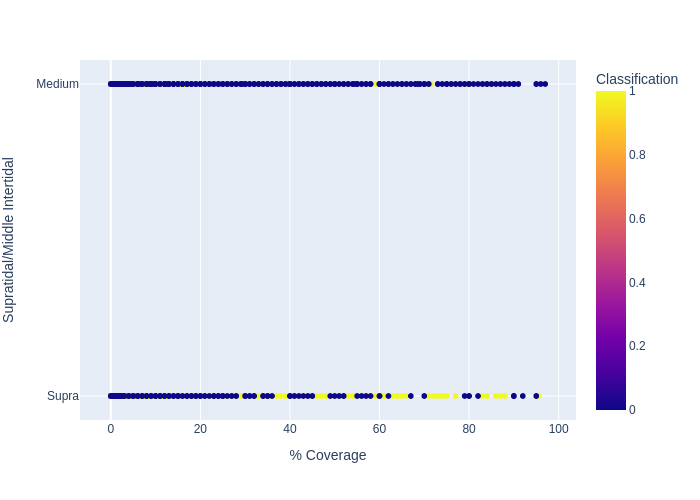

In [ ]:
## classification of sessile species by Supratidal/Middle Intertidal for plants and animal species
fig = px.scatter(df_sessil_processed, x="% Coverage", y="Supratidal/Middle Intertidal", color="Classification")
fig.show("png")

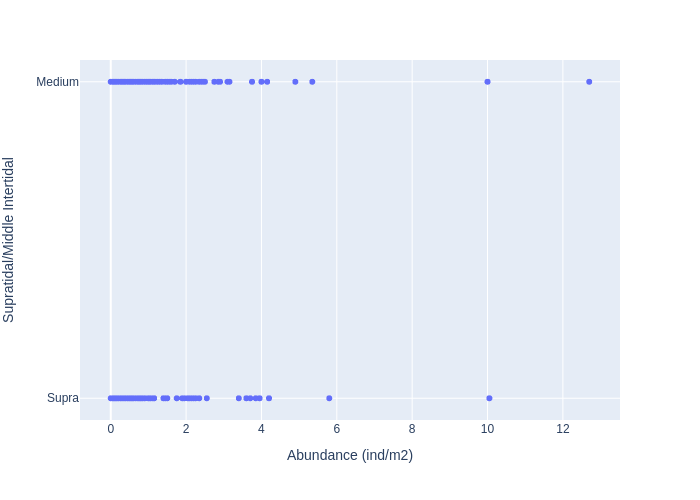

In [ ]:
## classification of mobile species by Supratidal/Middle Intertidal 
fig = px.scatter(df_mobil_processed, x="Abundance (ind/m2)", y="Supratidal/Middle Intertidal")
fig.show("png")

In [ ]:
# Get the Conservation Status count for Sessil Species
conservation_counts = df_sessil_processed['Conservation Status (IUCN)'].value_counts()
conservation_counts

no conservation status for this taxon    111360
Name: Conservation Status (IUCN), dtype: int64

In [ ]:
# Get the Conservation Status count for Mobil Species
conservation_counts = df_mobil_processed['Conservation Status (IUCN)'].value_counts()
conservation_counts

no conservation status for this taxon    47900
least concern (LC)                       19160
commercially threatened (CT)*             7664
insufficiently known (I)*                 1916
Name: Conservation Status (IUCN), dtype: int64

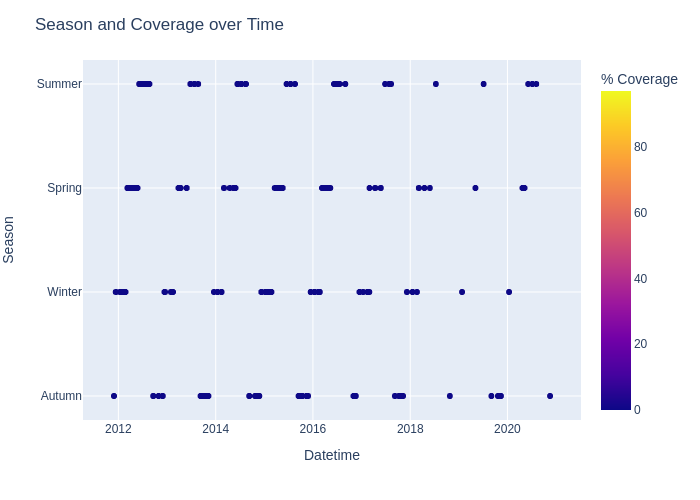

In [ ]:
## Season and Coverage over Time for sessil
# Create a new DataFrame with date, season, and coverage percentage columns
df_plot = df_sessil_processed[['Datetime', 'Season', '% Coverage']]

# Create a scatter plot
fig = px.scatter(df_plot, x='Datetime', y='Season', color='% Coverage')

# Set the plot title
fig.update_layout(title='Season and Coverage over Time')

# Show the plot
fig.show("png")

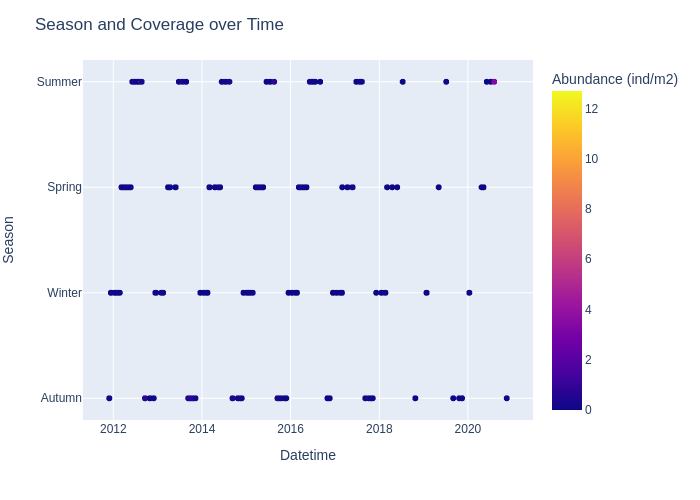

In [ ]:
## Season and Coverage over Time for Mobil
# Create a new DataFrame with date, season, and coverage percentage columns
df_plot = df_mobil_processed[['Datetime', 'Season', 'Abundance (ind/m2)']]

# Create a scatter plot
fig = px.scatter(df_plot, x='Datetime', y='Season', color='Abundance (ind/m2)')

# Set the plot title
fig.update_layout(title='Season and Coverage over Time')

# Show the plot
fig.show("png")

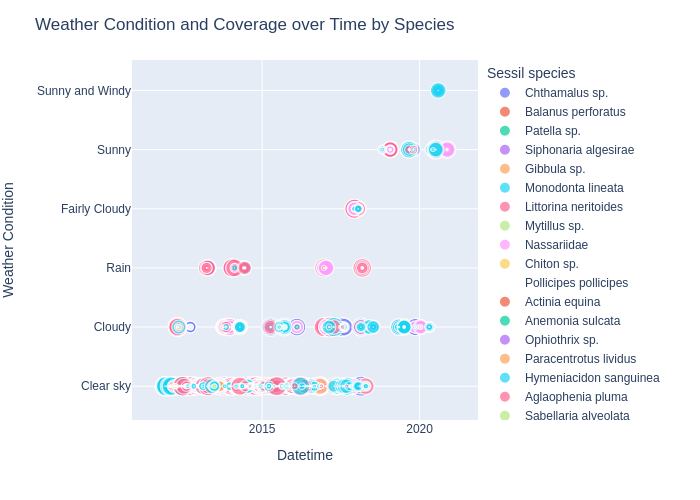

In [ ]:
# Create a new DataFrame with date, weather condition, species, and coverage percentage columns
df_plot = df_sessil_processed[['Datetime', 'Weather Condition', 'Sessil species', '% Coverage']]
# Filter out any rows with NaN values
df_plot = df_plot.dropna()

# Create a scatter plot
fig = px.scatter(df_plot, x='Datetime', y='Weather Condition', color='Sessil species', size='% Coverage', size_max=20)

# Set the plot title
fig.update_layout(title='Weather Condition and Coverage over Time by Species')

# Show the plot
fig.show("png")

In [ ]:
# Group the data by species and calculate mean coverage
mean_coverage_by_species = df_sessil_processed.groupby('Sessil species')['% Coverage'].mean()

# Sort by mean coverage in descending order
mean_coverage_by_species = mean_coverage_by_species.sort_values(ascending=False)

# Get the species with the highest mean coverage
species_with_max_coverage = mean_coverage_by_species.index[0]

print(f"The species with the maximum coverage is {species_with_max_coverage}")

The species with the maximum coverage is Coralina elongata


In [ ]:
mean_coverage_by_species

Sessil species
Coralina elongata               14.744505
Chthamalus sp.                   9.599900
Caulacanthus sp.                 4.488802
Cladophora sp.                   4.320443
Ulva rigida                      2.307187
Lithophillum incrustans          1.946510
Patella sp.                      1.767935
Ulva intestinalis                1.175703
Mytillus sp.                     1.049714
Sphacelaria rigidula             0.843125
Paracentrotus lividus            0.796979
Gelidium sp.                     0.733802
Gigartina sp.                    0.632969
Asparagopsis armata (tufosa)     0.277969
Asparagopsis armata (adulta)     0.275339
Gibbula sp.                      0.265521
Mastocarpus sp.                  0.252969
Siphonaria algesirae             0.225859
Balanus perforatus               0.219267
Hymeniacidon sanguinea           0.202656
Stypocaulon scoparium            0.193385
Actinia equina                   0.175547
Littorina neritoides             0.154385
Hildenbrandia sp.  

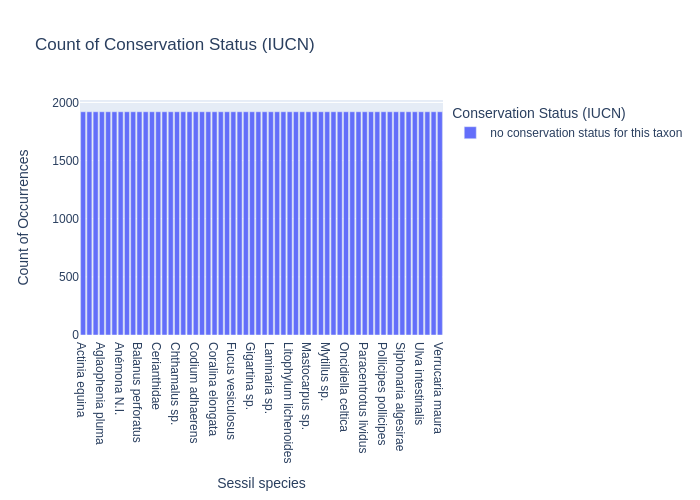

In [ ]:
# Group the data by species and Is Invasive and count the number of occurrences
conservation_counts = df_sessil_processed.groupby(['Sessil species', 'Conservation Status (IUCN)']).size().reset_index(name='Count')
# Create a bar plot
fig = px.bar(conservation_counts, x='Sessil species', y='Count', color='Conservation Status (IUCN)',
             labels={'Species': 'Species Name', 'Count': 'Count of Occurrences'},
             title='Count of Conservation Status (IUCN)')
fig.show("png")

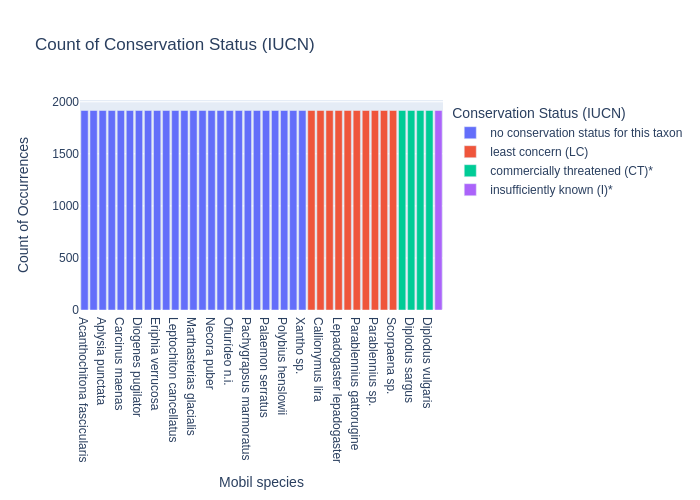

In [ ]:
# Group the data by species and Is Invasive and count the number of occurrences
conservation_counts = df_mobil_processed.groupby(['Mobil species', 'Conservation Status (IUCN)']).size().reset_index(name='Count')
# Create a bar plot
fig = px.bar(conservation_counts, x='Mobil species', y='Count', color='Conservation Status (IUCN)',
             labels={'Species': 'Species Name', 'Count': 'Count of Occurrences'},
             title='Count of Conservation Status (IUCN)')
fig.show("png")

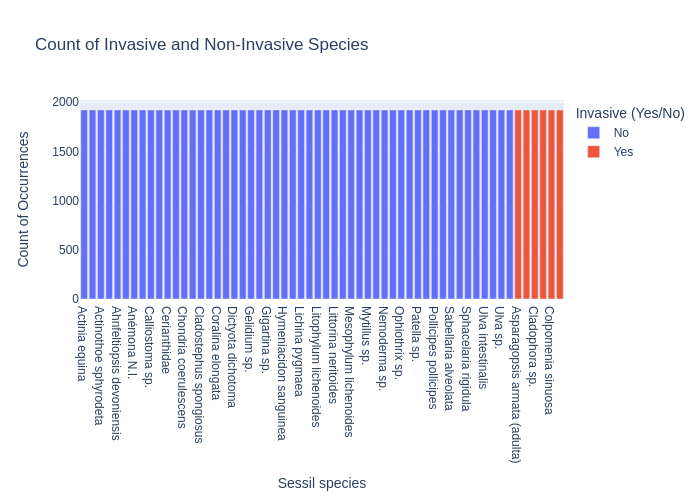

In [ ]:
# Group the data by species and Is Invasive and count the number of occurrences
invasive_counts = df_sessil_processed.groupby(['Sessil species', 'Invasive (Yes/No)']).size().reset_index(name='Count')

# Create a bar plot
fig = px.bar(invasive_counts, x='Sessil species', y='Count', color='Invasive (Yes/No)',
             labels={'Species': 'Species Name', 'Count': 'Count of Occurrences'},
             title='Count of Invasive and Non-Invasive Species')
fig.show("png")

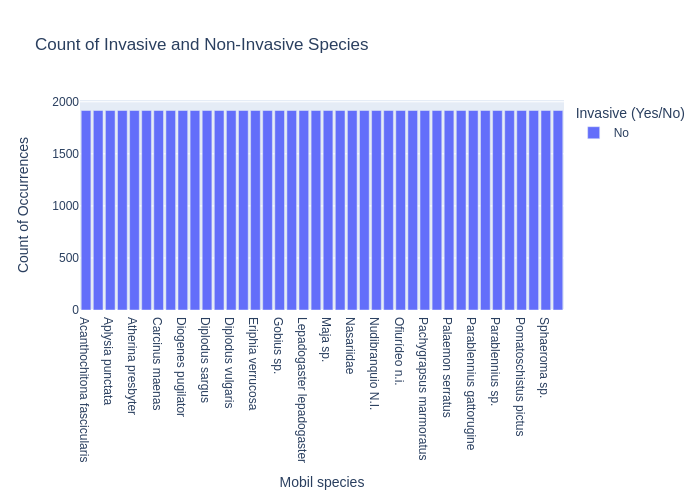

In [ ]:
# Group the data by species and Is Invasive and count the number of occurrences
invasive_counts = df_mobil_processed.groupby(['Mobil species', 'Invasive (Yes/No)']).size().reset_index(name='Count')

# Create a bar plot
fig = px.bar(invasive_counts, x='Mobil species', y='Count', color='Invasive (Yes/No)',
             labels={'Species': 'Species Name', 'Count': 'Count of Occurrences'},
             title='Count of Invasive and Non-Invasive Species')
fig.show("png")

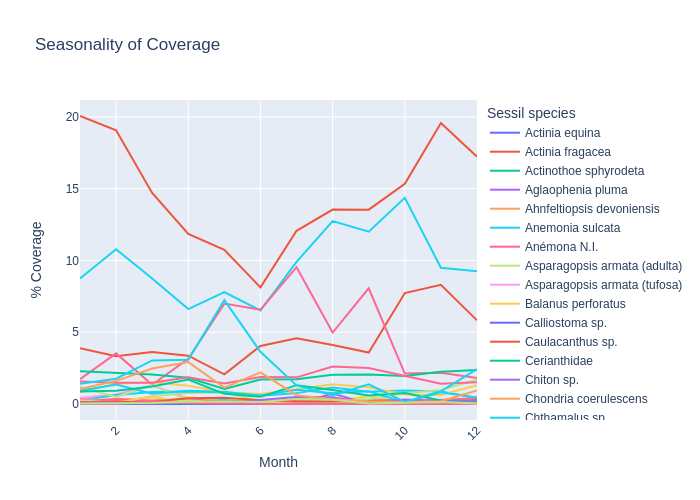

In [ ]:
# Group the data by month and species, and calculate the mean coverage for sessil

monthly_coverage = df_sessil_processed.groupby([df_sessil_processed['Date'].dt.month, df_sessil_processed['Sessil species'].astype(str)])['% Coverage'].mean().reset_index()


# Create a line plot
fig = px.line(monthly_coverage, x='Date', y='% Coverage', color='Sessil species', 
              labels={'Date': 'Month', '% Coverage': '% Coverage'},
              title='Seasonality of Coverage')
fig.update_layout(xaxis_tickangle=-45)
fig.show("png")

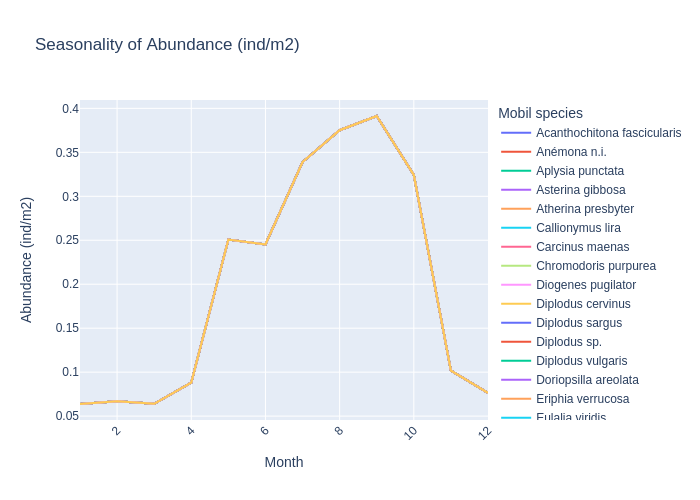

In [ ]:
# Group the data by month and species, and calculate the mean coverage for mobil
monthly_coverage = df_mobil_processed.groupby([df_mobil_processed['Date'].dt.month, df_mobil_processed['Mobil species'].astype(str)])['Abundance (ind/m2)'].mean().reset_index()


# Create a line plot
fig = px.line(monthly_coverage, x='Date', y='Abundance (ind/m2)', color='Mobil species', 
              labels={'Date': 'Month', 'Abundance (ind/m2)': 'Abundance (ind/m2)'},
              title='Seasonality of Abundance (ind/m2)')
fig.update_layout(xaxis_tickangle=-45)
fig.show("png")

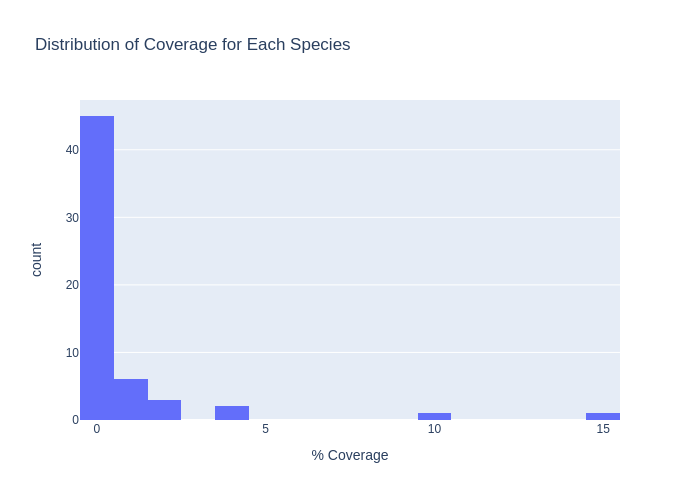

In [ ]:
species_coverage = df_sessil_processed.groupby('Sessil species')['% Coverage'].mean().reset_index()

# Create a histogram
fig = px.histogram(species_coverage, x='% Coverage', nbins=20, 
                   labels={'% Coverage': '% Coverage', 'count': 'Number of Species'},
                   title='Distribution of Coverage for Each Species')
fig.show("png")


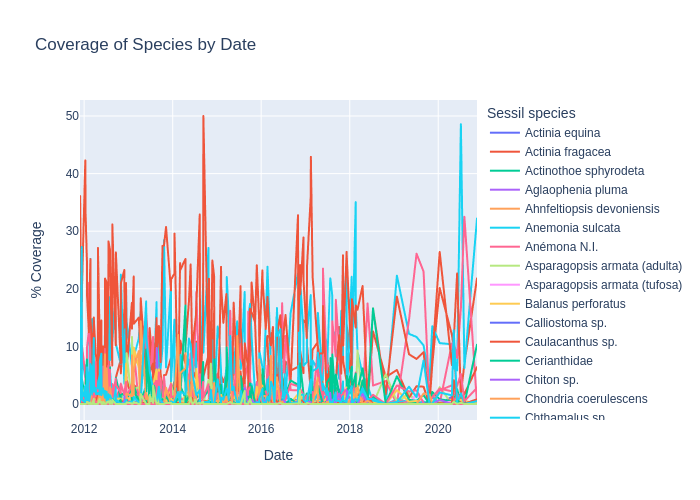

In [ ]:
# Convert the 'Date' column to datetime
df_sessil_processed['Date'] = pd.to_datetime(df_sessil_processed['Date'], format='%m/%d/%Y')

# Group the data by date and species, and calculate the mean coverage
daily_coverage = df_sessil_processed.groupby(['Date', 'Sessil species'])['% Coverage'].mean().reset_index()

# Create a line plot
fig = px.line(daily_coverage, x='Date', y='% Coverage', color='Sessil species',
              labels={'Date': 'Date', '% Coverage': '% Coverage'},
              title='Coverage of Species by Date')
fig.show("png")

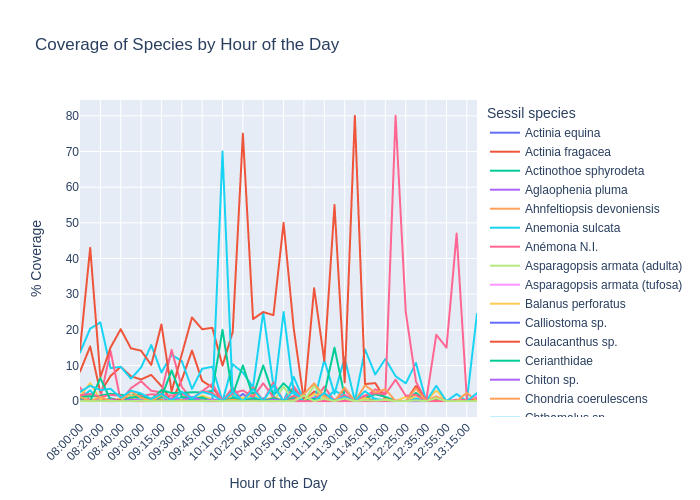

In [ ]:
# Group the data by hour and species, and calculate the mean coverage
hourly_coverage = df_sessil_processed.groupby(['Hour', 'Sessil species'])['% Coverage'].mean().reset_index()

# Create a line plot
fig = px.line(hourly_coverage, x='Hour', y='% Coverage', color='Sessil species', 
              labels={'Hour': 'Hour of the Day', '% Coverage': '% Coverage'},
              title='Coverage of Species by Hour of the Day')
fig.update_layout(xaxis_tickangle=-45)
fig.show("png")

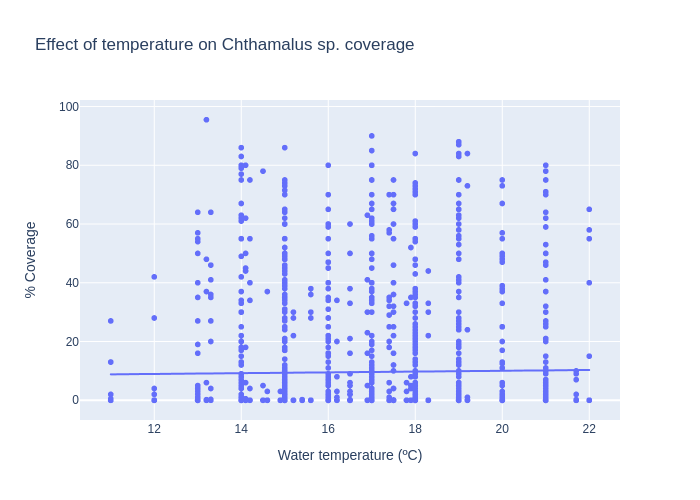

In [ ]:
# select the species to analyze
species = "Chthamalus sp."

# create a scatter plot of temperature vs coverage for the selected species
fig = px.scatter(df_sessil_processed[df_sessil_processed["Sessil species"] == species], x="Water temperature (ºC)", y="% Coverage", 
                 trendline="ols", title=f"Effect of temperature on {species} coverage")
fig.show("png")

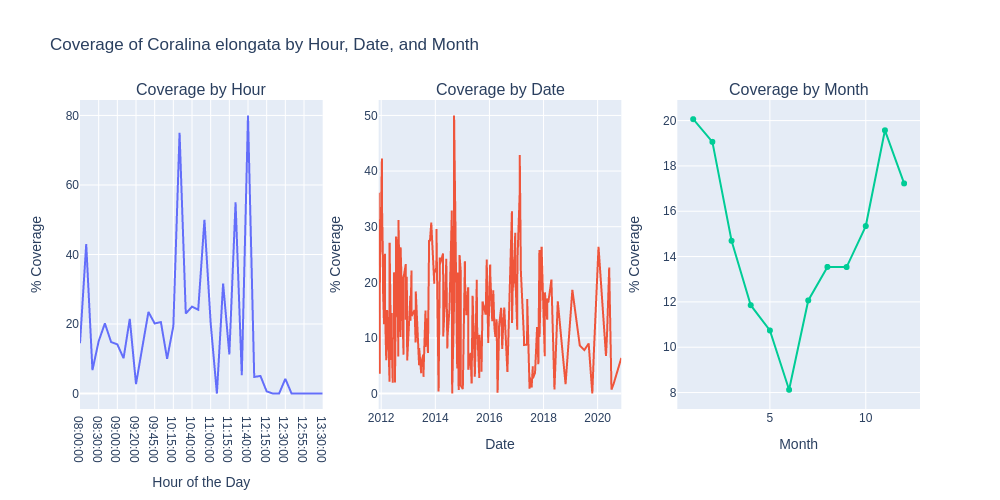

In [ ]:
# Filter data for a specific species
species_name = 'Coralina elongata'

df_species = df_sessil_processed[df_sessil_processed['Sessil species'] == species_name]

# Calculate mean coverage by hour, date, and month
hourly_coverage = df_species.groupby('Hour')['% Coverage'].mean().reset_index()
daily_coverage = df_species.groupby('Date')['% Coverage'].mean().reset_index()
monthly_coverage = df_species.groupby(df_species['Date'].dt.month)['% Coverage'].mean().reset_index()
 
# Create subplots for coverage by hour, date, and month
fig = make_subplots(rows=1, cols=3, subplot_titles=('Coverage by Hour', 'Coverage by Date',
                                                    'Coverage by Month'))

# Add trace for coverage by hour
fig.add_trace(
    go.Scatter(x=hourly_coverage['Hour'], y=hourly_coverage['% Coverage'],  name='Coverage'),
    row=1, col=1
)

# Add trace for coverage by date
fig.add_trace(
    go.Scatter(x=daily_coverage['Date'], y=daily_coverage['% Coverage'], name='Coverage'),
    row=1, col=2
)

# Add trace for coverage by month
fig.add_trace(
    go.Scatter(x=monthly_coverage['Date'], y=monthly_coverage['% Coverage'], name='Coverage'),
    row=1, col=3
)
# using padding
fig.update_layout(width = 1000)

# Set axis labels and plot title
fig.update_xaxes(title_text='Hour of the Day', row=1, col=1)
fig.update_xaxes(title_text='Date', row=1, col=2)
fig.update_xaxes(title_text='Month', row=1, col=3)
fig.update_yaxes(title_text='% Coverage', row=1, col=1)
fig.update_yaxes(title_text='% Coverage', row=1, col=2)
fig.update_yaxes(title_text='% Coverage', row=1, col=3)
fig.update_layout(title='Coverage of {} by Hour, Date, and Month'.format(species_name), showlegend=False)

fig.show("png")


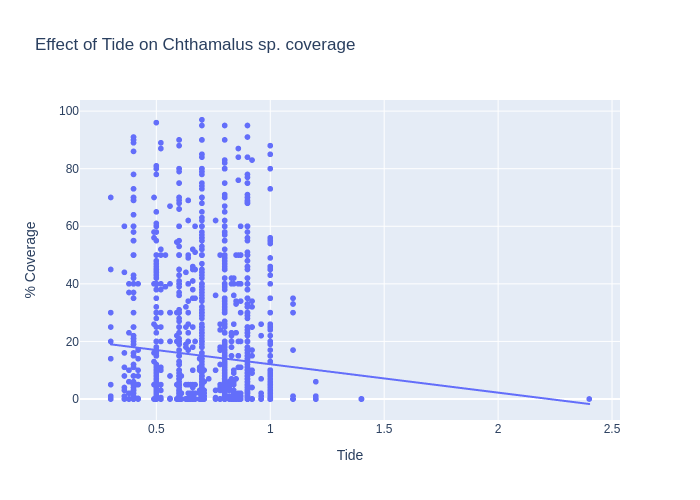

In [ ]:
# create a scatter plot of tide vs coverage for the selected species
fig = px.scatter(df_species, x="Tide", y="% Coverage", 
                 trendline="ols", title=f"Effect of Tide on {species} coverage")
fig.show("png")

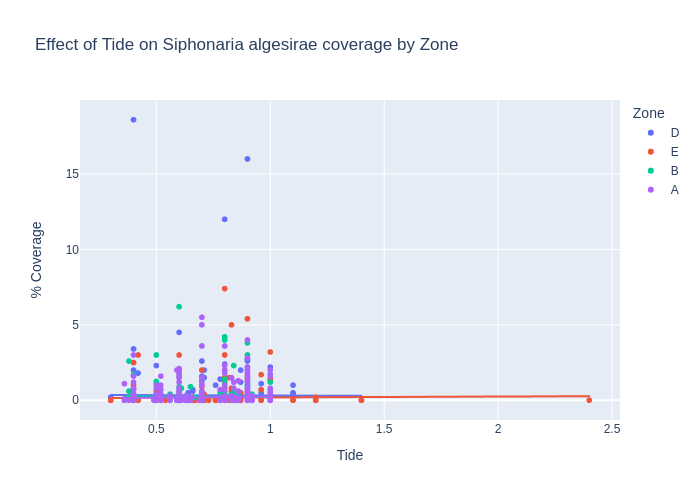

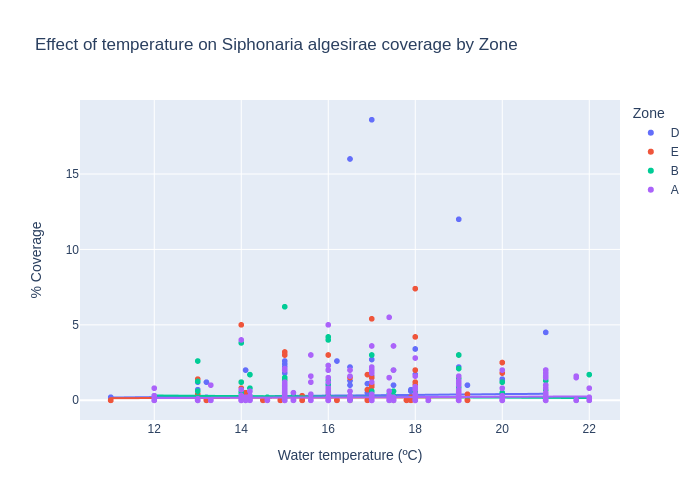

In [ ]:
# Filter data for a specific species
species_name = 'Siphonaria algesirae'

df_species = df_sessil_processed[df_sessil_processed['Sessil species'] == species_name]

# create a scatter plot of tide vs coverage for the selected species, colored by zone
fig = px.scatter(df_species, x="Tide", y="% Coverage", color="Zone", 
                 trendline="ols", title=f"Effect of Tide on {species_name} coverage by Zone")
fig.show("png")

# create a scatter plot of temperature vs coverage for the selected species, colored by zone
fig = px.scatter(df_species, x="Water temperature (ºC)", y="% Coverage", color="Zone", 
                 trendline="ols", title=f"Effect of temperature on {species_name} coverage by Zone")
fig.show("png")

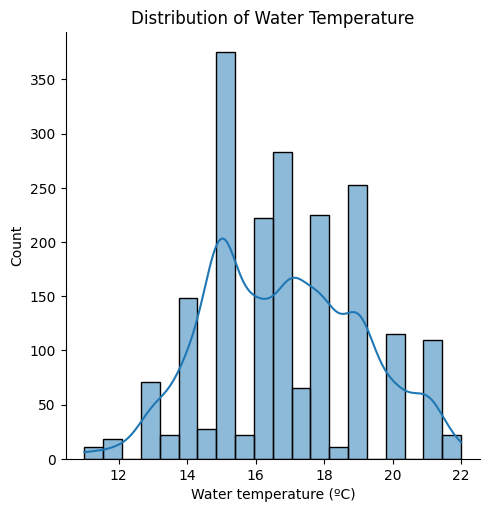

In [ ]:
# Distribution plot for water temperature
sns.displot(df_sessile_corrected, x='Water temperature (ºC)', bins=20, kde=True)
plt.title('Distribution of Water Temperature')
plt.show("png")

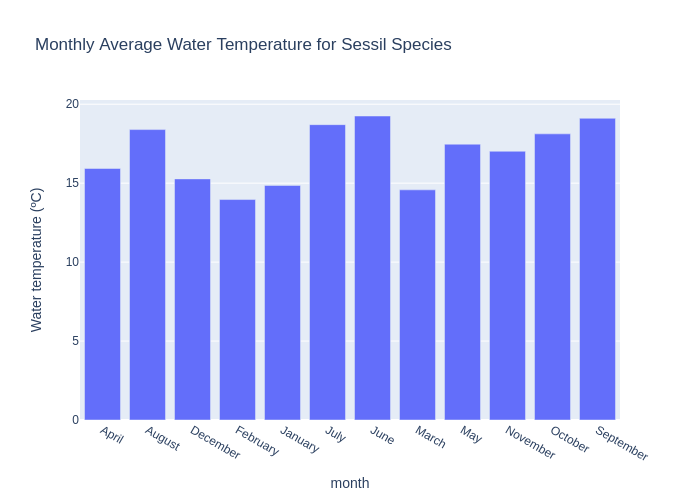

In [ ]:
# Monthly average water temperature for Sessile
df_sessil_processed['Date'] = pd.to_datetime(df_sessil_processed['Date'], format='%m/%d/%Y')
df_sessil_processed_new = df_sessil_processed.copy()
# create a new column with the month name
df_sessil_processed_new['month'] = df_sessil_processed_new['Date'].dt.month_name()
monthly_avg_temp = df_sessil_processed_new.groupby('month')['Water temperature (ºC)'].mean().reset_index()

# create the plot using Plotly Express
fig = px.bar(monthly_avg_temp, x='month', y='Water temperature (ºC)', title='Monthly Average Water Temperature for Sessil Species')
fig.show("png")

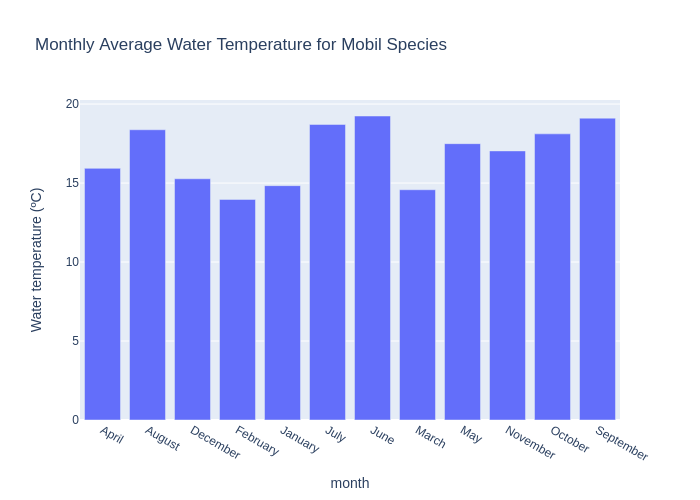

In [ ]:
# Monthly average water temperature for Sessile
df_mobil_processed['Date'] = pd.to_datetime(df_mobil_processed['Date'], format='%m/%d/%Y')
df_mobil_processed_new = df_mobil_processed.copy()
# create a new column with the month name
df_mobil_processed_new['month'] = df_mobil_processed_new['Date'].dt.month_name()
monthly_avg_temp = df_mobil_processed_new.groupby('month')['Water temperature (ºC)'].mean().reset_index()

# create the plot using Plotly Express
fig = px.bar(monthly_avg_temp, x='month', y='Water temperature (ºC)', title='Monthly Average Water Temperature for Mobil Species')
fig.show("png")

**Bathymetry plot**

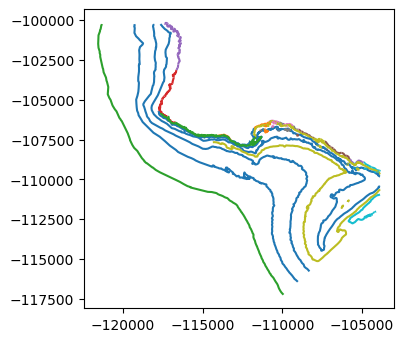

In [ ]:
# Bathymetry data - plot 
# Read the shapefile
shapefile_path = "/content/drive/MyDrive/World Data League 2023 - AI Wonder Girls/Phase2/Raw data/cascais_data/bathymetry-20230428T132522Z-001/bathymetry/Base_batimetrica.shp"
gdf = gpd.read_file(shapefile_path)


f, ax = plt.subplots(1, figsize = [4, 4])
gdf.plot(ax=ax, column = 'geometry');
plt.show()


In [ ]:
gdf['lat'] = gdf.geometry.apply(lambda geom: geom.centroid.y)
gdf['lon'] = gdf.geometry.apply(lambda geom: geom.centroid.x)

gdf.head()


OBJECTID        Layer  Color  Elevation Text_  Cota   Shape_Leng  \
0         1  Batimétrica    253      -2.08    Nm -2.08   817.475353   
1         3  Batimétrica    253      -2.08    Nm -2.08  1273.857339   
2         5  Batimétrica    253      -2.08    Nm -2.08   540.255327   
3         7  Batimétrica    253      -2.08    Nm -2.08   356.953051   
4         9  Batimétrica    253      -2.08    Nm -2.08   143.034819   

                                            geometry            lat  \
0  LINESTRING Z (-113786.504 -107221.018 -2.080, ... -107353.463433   
1  LINESTRING Z (-117611.698 -105170.752 -2.080, ... -105503.540739   
2  LINESTRING Z (-116325.596 -106670.428 -2.080, ... -106748.133885   
3  LINESTRING Z (-117208.248 -106080.916 -2.080, ... -106159.523461   
4  LINESTRING Z (-117563.211 -105801.097 -2.080, ... -105855.153454   

             lon  
0 -113444.477001  
1 -117656.481052  
2 -116148.599458  
3 -117153.959157  
4 -117557.400792

### 4. Model / technique(s) selection with feature importance analysis

We have a lot of features, and there are a lot of possible regression models that could be trained to predict species' percentage coverage / number of individuals. To meet our objective of identifying the most important environmental variables, we need to ensure that the final model is reliable, accurate and robust such that the weights it learns are interpretable.

We therefore train three types of machine learning model, assess their mean squared error loss on a test set, and select the model type with the lowest error:

1. LASSO regression model
2. Gradient boosting regressor model
3. Random forest regressor model

The models can also be used to select the most important or informative variables to reduce the complexity of our final model, to make it more interpretable.

####**Method 1: Lasso Model**

In [ ]:
def lasso_training(df, cat_cols, drop_col, model_type= "sessile-plant",predictor='#individuals'):
  # Convert categorical variables into numerical values
  df_new = pd.get_dummies(df, columns=cat_cols)

  df_new['Day'] = df_new['Date'].dt.day
  df_new['Month'] = df_new['Date'].dt.month
  df_new['Year'] = df_new['Date'].dt.year
  # Convert "Hour" column to datetime format
  df_new['Hour'] = pd.to_datetime(df_new['Hour'])
  df_new['Hour_1'] = df_new['Hour'].dt.hour

  # Standardize the numerical features
  scaler = StandardScaler()
  num_cols = ['Water temperature (ºC)', 'Tide','relativehumidity_2m (%)', 'pressure_msl (hPa)',
        'precipitation (mm)', 'winddirection_100m (°)', 'cloudcover (%)',
        'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
        'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
        'direct_normal_irradiance (W/m²)', 'windgusts_10m (km/h)',
        'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)']
  df_new[num_cols] = scaler.fit_transform(df_new[num_cols])

  # Split the data into training and testing sets
  X = df_new.drop(drop_col, axis=1)
  y = df_new[predictor].fillna(0)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train Lasso regression model with alpha=1
  lasso = Lasso(alpha=0.01,  max_iter=1000)
  lasso.fit(X_train, y_train)

  # Make predictions on test set and calculate MSE
  y_pred = lasso.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)

  rows = []
  row = {}
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mape_pre = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
  print(f"\nLasso Metrics for {model_type}->") 
  print(f'Mean Absolute Error (MAE): {mae}')
  print(f'Mean Squared Error (MSE): {mse}')
  print(f'Root Mean Squared Error (RMSE): {rmse}')    
  cols = ["metrics_for", "model", "mae", "mse", "rmse"]
      
  row = {"species": model_type, "model": "Lasso", 
            "mae": mae, "mse": mse, "rmse": rmse}
  rows.append(row)

  # Print coefficients of each feature
  coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})

  return lasso, rows, coefficients, X

  

In [ ]:
# Create dataframe for storing models and metrics
model_outputs = pd.DataFrame(columns=["estimator", "species", "model", "mae", "mse", "rmse"])

In [ ]:
# filter by species category --> 0 = plant
df_species = df_sessil_processed[df_sessil_processed['Classification']==0]
cat_cols = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal','Substrate','Invasive (Yes/No)']
drop_cols = ['% Coverage','Conservation Status (IUCN)',"Date","Hour","Sessil species","Datetime"]
sp_lasso_model, sp_metrics, sp_coefficients, X_sp = lasso_training(df_species, cat_cols, drop_cols , 
                                                                model_type="sessile-plant",predictor='% Coverage')

# Store model and metrics
row = pd.concat([pd.Series({"estimator": sp_lasso_model}), pd.Series(sp_metrics[0])], 0)
model_outputs = model_outputs.append(row, ignore_index=True)
model_outputs


Lasso Metrics for sessile-plant->
Mean Absolute Error (MAE): 1.6972459527850703
Mean Squared Error (MSE): 30.665487874117233
Root Mean Squared Error (RMSE): 5.5376428084625715


estimator        species  model       mae        mse      rmse
0  Lasso(alpha=0.01)  sessile-plant  Lasso  1.697246  30.665488  5.537643

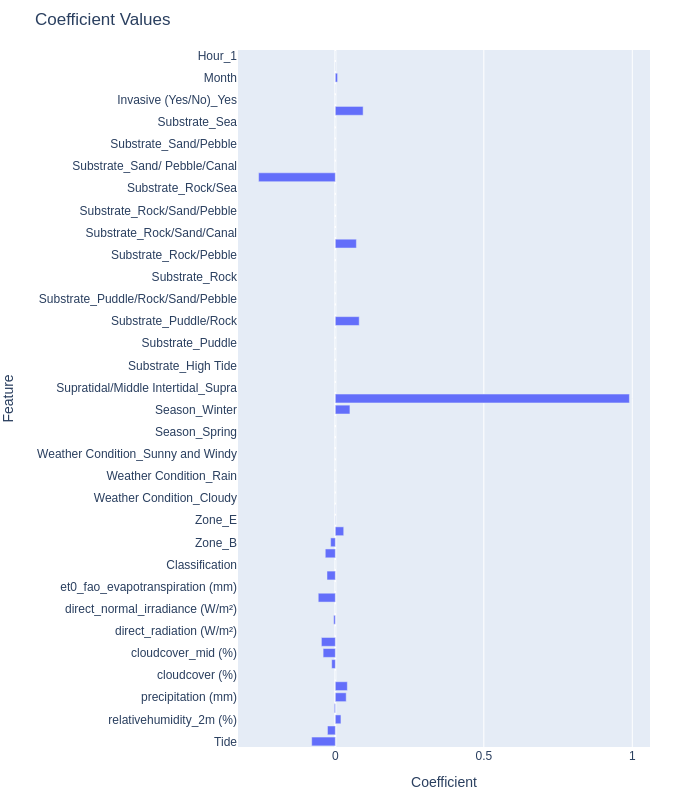

In [ ]:
# Create a bar chart
fig = go.Figure(go.Bar(
    x=sp_coefficients.Coefficient,
    y=sp_coefficients.Feature,
    orientation='h'
))

fig.update_layout(
    title='Coefficient Values',
    xaxis_title='Coefficient',
    yaxis_title='Feature',
    height=800,
    margin=dict(l=200, r=50, t=50, b=50),
)

fig.show("png")

In [ ]:
# filter by species category --> 1 = animal
df_species = df_sessil_processed[df_sessil_processed['Classification']==1]
cat_cols = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal','Substrate','Invasive (Yes/No)']
drop_cols = ['% Coverage','Conservation Status (IUCN)',"Date","Hour","Sessil species","Datetime"]
sa_lasso_model, sa_metrics, sa_coefficients, X_sa  = lasso_training(df_species, cat_cols, drop_cols , 
                                                                 model_type= "sessile-animal",predictor='% Coverage')

# Store model and metrics
row = pd.concat([pd.Series({"estimator": sa_lasso_model}), pd.Series(sa_metrics[0])], 0)
model_outputs = model_outputs.append(row, ignore_index=True)
model_outputs


Lasso Metrics for sessile-animal->
Mean Absolute Error (MAE): 1.1331017611491703
Mean Squared Error (MSE): 22.678797132281783
Root Mean Squared Error (RMSE): 4.762226069001952


estimator         species  model       mae        mse      rmse
0  Lasso(alpha=0.01)   sessile-plant  Lasso  1.697246  30.665488  5.537643
1  Lasso(alpha=0.01)  sessile-animal  Lasso  1.133102  22.678797  4.762226

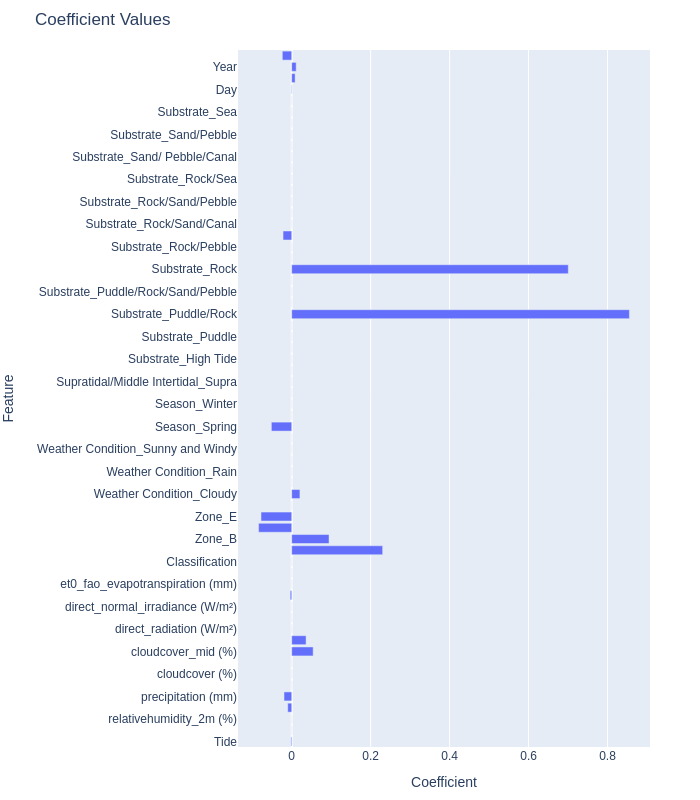

In [ ]:
# Create a bar chart
fig = go.Figure(go.Bar(
    x=sa_coefficients.Coefficient,
    y=sa_coefficients.Feature,
    orientation='h'
))

fig.update_layout(
    title='Coefficient Values',
    xaxis_title='Coefficient',
    yaxis_title='Feature',
    height=800,
    margin=dict(l=200, r=50, t=50, b=50),
)

fig.show("png")

In [ ]:
# Mobil Species
cat_cols = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal','Substrate','Invasive (Yes/No)','Conservation Status (IUCN)']
drop_cols = ['#individuals',"Date","Hour","Mobil species","Datetime","Abundance (ind/m2)","Day","Year","Month"]
m_lasso_model, m_metrics, m_coefficients, X_m = lasso_training(df_mobil_processed, cat_cols, drop_cols , 
                                                             model_type= "mobile-all")

# Store model and metrics
row = pd.concat([pd.Series({"estimator": m_lasso_model}), pd.Series(m_metrics[0])], 0)
model_outputs_Lasso = model_outputs.append(row, ignore_index=True)
model_outputs_Lasso



Lasso Metrics for mobile-all->
Mean Absolute Error (MAE): 0.14841104990959839
Mean Squared Error (MSE): 1.4114487347384101
Root Mean Squared Error (RMSE): 1.1880440794593483


estimator         species  model       mae        mse      rmse
0  Lasso(alpha=0.01)   sessile-plant  Lasso  1.697246  30.665488  5.537643
1  Lasso(alpha=0.01)  sessile-animal  Lasso  1.133102  22.678797  4.762226
2  Lasso(alpha=0.01)      mobile-all  Lasso  0.148411   1.411449  1.188044

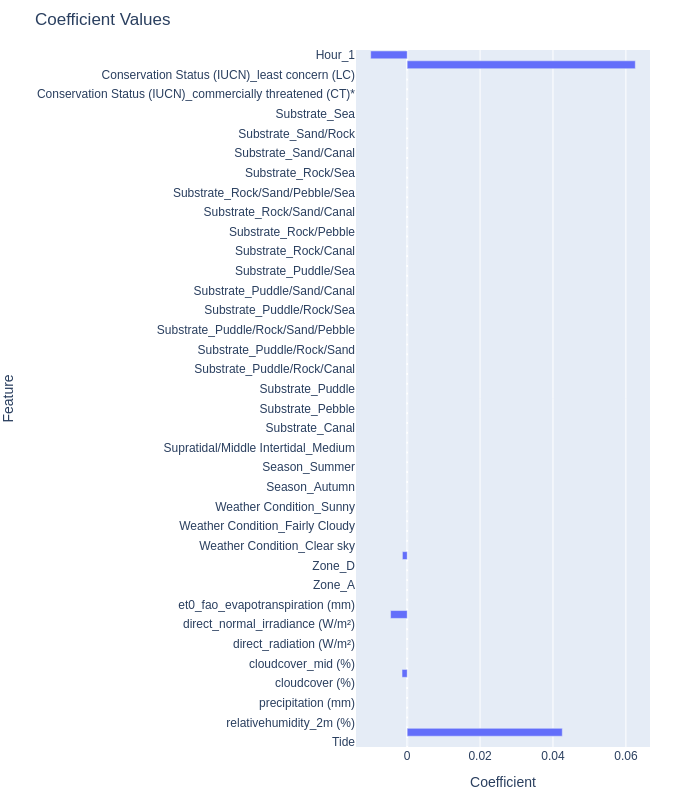

In [ ]:
# Create a bar chart
fig = go.Figure(go.Bar(
    x=m_coefficients.Coefficient,
    y=m_coefficients.Feature,
    orientation='h'
))

fig.update_layout(
    title='Coefficient Values',
    xaxis_title='Coefficient',
    yaxis_title='Feature',
    height=800,
    margin=dict(l=200, r=50, t=50, b=50),
)

fig.show("png")

#####**Metrics from Lasso Model**

In [ ]:
model_outputs_Lasso.loc[model_outputs_Lasso["model"]=="Lasso"]

estimator         species  model       mae        mse      rmse
0  Lasso(alpha=0.01)   sessile-plant  Lasso  1.697246  30.665488  5.537643
1  Lasso(alpha=0.01)  sessile-animal  Lasso  1.133102  22.678797  4.762226
2  Lasso(alpha=0.01)      mobile-all  Lasso  0.148411   1.411449  1.188044

####**Method 2: Gradient Boosting Regressor**

In [ ]:
y_column = "% Coverage"
cols_to_use = ['Tide', 'Water temperature (ºC)', 'relativehumidity_2m (%)', 
               'pressure_msl (hPa)', 'precipitation (mm)', 'cloudcover (%)', 
               'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 
               'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 
               'direct_normal_irradiance (W/m²)', 'windgusts_10m (km/h)', 
               'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)', 
               'Classification']

In [ ]:
def get_data(data, y_column):
    y = data[y_column].fillna(0)
    X = data[cols_to_use]
    my_imputer = SimpleImputer()
    imputed_X = my_imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(imputed_X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
def fn_print_metrics(my_model, X_test, y_test, model_type="sessile-plant"):
  rows=[]
  # Make predictions on test set and calculate MSE
  y_pred = my_model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  print(f"Gradient Boost Metrics for {model_type}->") 
  print(f'Mean Absolute Error (MAE): {mae}')
  print(f'Mean Squared Error (MSE): {mse}')
  print(f'Root Mean Squared Error (RMSE): {rmse}')    
  cols = ["metrics_for", "model", "mae", "mse", "rmse"]
        
  row = {"species": model_type, "model": "Gradient Boost", 
              "mae": mae, "mse": mse, "rmse": rmse}
  rows.append(row)
  return rows

In [ ]:
model_outputs = pd.DataFrame(columns=["estimator", "species", "model", "mae", "mse", "rmse"])

In [ ]:
# filter by species category --> 0 = plant
df_species = df_sessil_processed[df_sessil_processed['Classification']==0]
X_train, X_test, y_train, y_test = get_data(df_species, "% Coverage")
sp_gb_model = GradientBoostingRegressor()
sp_gb_model.fit(X_train, y_train)
sp_metrics = fn_print_metrics(sp_gb_model, X_test, y_test, "sessile-plant")

# Store model and metrics
row = pd.concat([pd.Series({"estimator": sp_gb_model}), pd.Series(sp_metrics[0])], 0)
model_outputs = model_outputs.append(row, ignore_index=True)
model_outputs

Gradient Boost Metrics for sessile-plant->
Mean Absolute Error (MAE): 1.7194208404532891
Mean Squared Error (MSE): 30.91037717526384
Root Mean Squared Error (RMSE): 5.559710170077559


estimator        species  \
0  ([DecisionTreeRegressor(criterion='friedman_ms...  sessile-plant   

            model       mae        mse     rmse  
0  Gradient Boost  1.719421  30.910377  5.55971

In [ ]:
# filter by species category --> 1 = animal
df_species = df_sessil_processed[df_sessil_processed['Classification']==1]
X_train, X_test, y_train, y_test = get_data(df_species, "% Coverage")
sa_gb_model = GradientBoostingRegressor()
sa_gb_model.fit(X_train, y_train)
sa_metrics = fn_print_metrics(sa_gb_model, X_test, y_test, "sessile-animal")

# Store model and metrics
row = pd.concat([pd.Series({"estimator": sa_gb_model}), pd.Series(sa_metrics[0])], 0)
model_outputs = model_outputs.append(row, ignore_index=True)
model_outputs

Gradient Boost Metrics for sessile-animal->
Mean Absolute Error (MAE): 1.1433010789582163
Mean Squared Error (MSE): 22.861794721528504
Root Mean Squared Error (RMSE): 4.781400916209443


estimator         species  \
0  ([DecisionTreeRegressor(criterion='friedman_ms...   sessile-plant   
1  ([DecisionTreeRegressor(criterion='friedman_ms...  sessile-animal   

            model       mae        mse      rmse  
0  Gradient Boost  1.719421  30.910377  5.559710  
1  Gradient Boost  1.143301  22.861795  4.781401

Gradient Boost Model for Mobil Species

In [ ]:
y_column =  "#individuals"
cols_to_use = ['Tide', 'Water temperature (ºC)', 'relativehumidity_2m (%)', 
               'pressure_msl (hPa)', 'precipitation (mm)', 'cloudcover (%)', 
               'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 
               'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 
               'direct_normal_irradiance (W/m²)', 'windgusts_10m (km/h)', 
               'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)']

In [ ]:
X_train, X_test, y_train, y_test = get_data(df_mobil_processed, "#individuals")
m_gb_model = GradientBoostingRegressor()
m_gb_model.fit(X_train, y_train)
m_metrics = fn_print_metrics(m_gb_model, X_test, y_test, "mobile-all")

# Store model and metrics
row = pd.concat([pd.Series({"estimator": m_gb_model}), pd.Series(m_metrics[0])], 0)
model_outputs_GB = model_outputs.append(row, ignore_index=True)
model_outputs_GB

Gradient Boost Metrics for mobile-all->
Mean Absolute Error (MAE): 0.14505827470175925
Mean Squared Error (MSE): 1.4081698819760482
Root Mean Squared Error (RMSE): 1.1866633397792519


estimator         species  \
0  ([DecisionTreeRegressor(criterion='friedman_ms...   sessile-plant   
1  ([DecisionTreeRegressor(criterion='friedman_ms...  sessile-animal   
2  ([DecisionTreeRegressor(criterion='friedman_ms...      mobile-all   

            model       mae        mse      rmse  
0  Gradient Boost  1.719421  30.910377  5.559710  
1  Gradient Boost  1.143301  22.861795  4.781401  
2  Gradient Boost  0.145058   1.408170  1.186663

#####**Metrics from Gradient Boost Model**

In [ ]:
model_outputs_GB.loc[model_outputs_GB["model"]=="Gradient Boost"]

estimator         species  \
0  ([DecisionTreeRegressor(criterion='friedman_ms...   sessile-plant   
1  ([DecisionTreeRegressor(criterion='friedman_ms...  sessile-animal   
2  ([DecisionTreeRegressor(criterion='friedman_ms...      mobile-all   

            model       mae        mse      rmse  
0  Gradient Boost  1.719421  30.910377  5.559710  
1  Gradient Boost  1.143301  22.861795  4.781401  
2  Gradient Boost  0.145058   1.408170  1.186663

####**Method 3: Feature importance with RandomForestRegressor methodology**

In [ ]:
# def plot_feature_importances(imps, feat_list, plot_orientation="vertical", 
#                              invert_vertical=False, sort_ascending=False):
def plot_feature_importances(imps, s_features, plot_orientation="vertical", 
                             invert_vertical=False, sort_ascending=False):
    df = None
    plot_feat = False
    print("\nPlotting feature importances sorted by feature importances...")

    s_x_values = list(range(len(imps)))
    # print(f"df sorted x_values: {s_x_values}")
    # print(f"df sorted features: {list(s_features)}")

    fig1, ax1 = plt.subplots()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=3.9,
                    wspace=0.4,
                    hspace=0.4)

    if plot_orientation == "vertical":
        width = 9
        height = 9
        fig1.set_size_inches(width, height)
        # # try this
        # plt.rcParams["figure.figsize"] = [height, width]  # [7.50, 3.50]
        # Make a bar chart
        # error = np.random.rand(len(feat_list))
        ax1.barh(s_features, s_x_values, align='center', color = 'g')  # xerr=error, align='center')
        ax1.set_yticklabels(s_features, fontsize=6)

        # Axis labels and title
        plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
        if invert_vertical:
            plt.gca().invert_xaxis()
        # plt.rcParams["figure.autolayout"] = True
        # using padding
        fig1.tight_layout(pad=5.0)
        plt.show()
    else:
        width = 9
        height = 9
        fig1.set_size_inches(width, height)

        # Make a bar chart
        plt.bar(s_x_values, imps, orientation = 'vertical', color = 'g', edgecolor = 'k', linewidth = 1.2)
        # Tick labels for x axis
        plt.xticks(s_x_values, s_features, rotation='vertical', fontsize=8)
        # # We change the fontsize of minor ticks label 
        # ax.tick_params(axis='x', which='major', labelsize=8)

        # Axis labels and title
        plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
        # plt.rcParams["figure.autolayout"] = True
        # using padding
        fig1.tight_layout(pad=5.0)
        plt.show()

    plot_feat = True
    
    return plot_feat


def plot_cumulative_importances(c_sorted_feat_imps, c_x_values):
    # for gap
    # print('\n\n')
    # c_sorted_imps = df["cum_x_values"]
    # c_sorted_feats = df["cum_features"]
    
    print("\nPlotting cumulative feature importances...")
    # cumulative plot
    fig2, ax2 = plt.subplots()
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=3.9,
                    wspace=0.4,
                    hspace=0.4)
    width = 9
    height = 9
    
    fig2.set_size_inches(width, height)
    
    # List of features sorted from most to least important
    sorted_importances = [importance[1] for importance in c_sorted_feat_imps]
    sorted_features = [importance[0] for importance in c_sorted_feat_imps]

    # Cumulative importances
    cumulative_importances = np.cumsum(sorted_importances)
    # Make a line graph
    plt.plot(c_x_values, cumulative_importances, 'g-')
    # Draw line at 95% of importance retained
    plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
    # Format x ticks and labels
    plt.xticks(c_x_values, sorted_features, rotation = 'vertical')
    # Axis labels and title
    plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Importances')

    #set parameters for tick labels
    plt.tick_params(axis='x', which='major', labelsize=6)

    # plt.tight_layout()
    # plt.rcParams["figure.autolayout"] = True
    # using padding
    fig2.tight_layout(pad=5.0)
    plt.show()


def calculate_metrics(gt, preds, num_estimators, rnd_state, metrics_for,
                      model="RandomForestRegressor"):
    # New
    rows = []
    row = {}
    mae = mean_absolute_error(gt, preds)
    mse = mean_squared_error(gt, preds)
    rmse = np.sqrt(mean_squared_error(gt, preds))
    mape_pre = np.mean(np.abs((gt - preds) / np.abs(gt)))
    mape = round(mape_pre * 100, 2)
    accuracy = round(100*(1 - mape), 2)
    print(f"\nRandomForestRegressor Metrics for {metrics_for}->") 
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')    
    # print(f'Mean Absolute Percentage Error (MAPE): {mape}')
    # print(f'Accuracy: {accuracy}\n')
    # print(f"RandomForestRegressor fitted with n_estimators={num_estimators}, random_state={rnd_state}")
    cols = ["metrics_for", "model", "mae", "mse", "rmse","mape", "accuracy"]
    
    row = {"species": metrics_for, "model": model, "n_estimators": num_estimators,
           "mae": mae, "mse": mse, "rmse": rmse}
    rows.append(row)
    
    df = pd.DataFrame(rows)        
    return df

def randomforestregressor_training_by_species(df, cat_cols, 
                          drop_cols=[],
                          species_type="sessile", species_sub_type="all",
                          species_col="",
                          species_array=[],
                          predictor="% Coverage",
                          n_estimators=1000,
                          random_state=100,
                          plot_orient="vertical", 
                          flip_vertical=False,
                          sort_ascending=False,
                          plot_imps=False
                          ):
    step = ""
    df_metrics_result = None
    feature_list = None
    sorted_importances = None
    sorted_features = None

    try:
        # Convert categorical variables into numerical values
        df_new = pd.get_dummies(df, columns=cat_cols)

        df_new['Day'] = df_new['Date'].dt.day
        df_new['Month'] = df_new['Date'].dt.month
        df_new['Year'] = df_new['Date'].dt.year
        # Convert "Hour" column to datetime format
        df_new['Hour'] = pd.to_datetime(df_new['Hour'])
        df_new['Hour_1'] = df_new['Hour'].dt.hour

        # Standardize the numerical features
        scaler = StandardScaler()
        num_cols = ['Water temperature (ºC)', 'Tide','relativehumidity_2m (%)', 'pressure_msl (hPa)',
              'precipitation (mm)', 'winddirection_100m (°)', 'cloudcover (%)',
              'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
              'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
              'direct_normal_irradiance (W/m²)', 'windgusts_10m (km/h)',
              'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)']
        df_new[num_cols] = scaler.fit_transform(df_new[num_cols])

        # Split the data into training and testing sets
        X = df_new.drop(drop_cols, axis=1)
        y = df_new[predictor].fillna(0)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        step = " fit RandomForestRegressor "
        start_t = time.time()
        
        rfr_model = RandomForestRegressor(n_estimators=n_estimators, 
                                        random_state=random_state)
        rfr_model.fit(X_train, y_train)

        step = " predict "
        # Make predictions on test data
        # print("predicting on test features...")
        predictions = rfr_model.predict(X_test)

        # Performance metrics
        species_tag = f"{species_type}-{species_sub_type}"
        df_metrics_result = calculate_metrics(y_test, predictions, 
                                              n_estimators, random_state, 
                                              species_tag)

        step = " features "
        # List of features for later use
        feature_list = list(X.columns)
        
        # Get numerical feature importances
        importances = list(rfr_model.feature_importances_)
        # List of tuples with variable and importance
        feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
        # Sort the feature importances by most important first
        sorted_feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
        # Print out the feature and importances 
        # [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in sorted_feature_importances]


        # list of x locations for plotting
        plt_importances = [importance[1] for importance in sorted_feature_importances]
        plt_x_values = [importance[0] for importance in sorted_feature_importances]
        
        step = " feat imp plot "
        # print("\nPlotting feature importances sorted by feature importances...")
        if plot_imps:
            plot_feat_status = plot_feature_importances(plt_importances, plt_x_values,                                                     
                                                      plot_orientation=plot_orient, 
                                                      invert_vertical=flip_vertical,
                                                      sort_ascending=sort_ascending
                                                      )
        else:
            plot_feat_status = True

        step = " cum imp "
        if plot_feat_status:
            # List of features sorted from most to least important
            # sorted_importances = [importance[1] for importance in feature_importances]
            # sorted_features = [importance[0] for importance in feature_importances]
            if plot_imps:
                cum_x_values = list(range(len(importances)))
                # plot cumulative importances                
                plot_cumulative_importances(feature_importances, cum_x_values)  
            print("\n")
    except Exception as ex:
        print(f"Error occurred: {ex} at step: {step}")
    return df_metrics_result, feature_list, sorted_importances, sorted_features, X, rfr_model
        

#####Detailed analysis for RandomForestRegressor model on sessile and mobile species

*Detailed Feature importance analysis for 'sessile' - plant species - classification=0*

In [ ]:
# filter by species category --> 0 = plant
df_sessil_processed_plt0 = df_sessil_processed[df_sessil_processed['Classification']==0]


In [ ]:
# Process 'sessile' category --> 0 = plant
sessil_cats = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal','Substrate','Invasive (Yes/No)']
species_nm_arr = list(df_sessil_processed_plt0['Sessil species'].unique())
drop_cols_sp = ['% Coverage', 'Conservation Status (IUCN)', "Date", "Hour", "Sessil species", "Datetime"]

# Apply RandomForestRegressor for an array of n_estimators as below...
estimator_arr = [500, 300, 200, 150, 100, 50, 30]
df_met_ses_0_arr = []
predictor="% Coverage"
species_type = "sessile"
species_sub_type = "plant"

for i in range(len(estimator_arr)):
    df_met_ses_0_curr = None
    plot_imps = False
    n_est = estimator_arr[i] # 800
    r_state = 80
    print(f"n_estimators: {n_est}...")
    df_met_ses_0_curr, ses_0_feat_list,\
    ses_0_sorted_imps, ses_0_sorted_feats, _, _ = randomforestregressor_training_by_species(df_sessil_processed_plt0, 
                                            sessil_cats,
                                            drop_cols=drop_cols_sp,
                                            species_type=species_type, 
                                            species_sub_type=species_sub_type,
                                            species_col="Sessil species",
                                            species_array=species_nm_arr,
                                            predictor=predictor,
                                            n_estimators=n_est,
                                            random_state=r_state,
                                            plot_orient="vertical", 
                                            flip_vertical=True,
                                            sort_ascending=False,
                                            plot_imps=False
                                            )    
    df_met_ses_0_arr.append(df_met_ses_0_curr)
    
# Set up the sessile plant - metrics    
df_met_ses_0 = pd.concat(df_met_ses_0_arr, ignore_index=True)


n_estimators: 500...

RandomForestRegressor Metrics for sessile-plant->
Mean Absolute Error (MAE): 1.7217657640489576
Mean Squared Error (MSE): 32.29900506548542
Root Mean Squared Error (RMSE): 5.6832213634069735


n_estimators: 300...

RandomForestRegressor Metrics for sessile-plant->
Mean Absolute Error (MAE): 1.7209267767230807
Mean Squared Error (MSE): 32.29280727110219
Root Mean Squared Error (RMSE): 5.6826760660011395


n_estimators: 200...

RandomForestRegressor Metrics for sessile-plant->
Mean Absolute Error (MAE): 1.7208731829519603
Mean Squared Error (MSE): 32.29584261491129
Root Mean Squared Error (RMSE): 5.6829431296566115


n_estimators: 150...

RandomForestRegressor Metrics for sessile-plant->
Mean Absolute Error (MAE): 1.7211658830438894
Mean Squared Error (MSE): 32.30371804216801
Root Mean Squared Error (RMSE): 5.68363598783103


n_estimators: 100...

RandomForestRegressor Metrics for sessile-plant->
Mean Absolute Error (MAE): 1.7205039053139308
Mean Squared Error (MSE)

*Detailed Feature importance analysis for 'sessile' - animal species - classification=1*

In [ ]:
# Process 'sessile' Classification --> 1 = animal
df_sessil_processed_plt1 = df_sessil_processed[df_sessil_processed['Classification']==1]

In [ ]:
# RandomForestRegressor model metrics for sessile-plant --> 1 = animal
sessil_cats = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal','Substrate','Invasive (Yes/No)']
drop_cols_sa = ['% Coverage', 'Conservation Status (IUCN)', "Date", "Hour", "Sessil species", "Datetime"]
species_nm_arr = list(df_sessil_processed_plt1['Sessil species'].unique())

# Apply RandomForestRegressor for an array of n_estimators as below...
estimator_arr = [500, 300, 200, 150, 100, 50, 30]
df_met_ses_1_arr = []
predictor="% Coverage"
species_type = "sessile"
species_sub_type = "animal"

for i in range(len(estimator_arr)):
    df_met_ses_1_curr = None
    plot_imps = False
    n_est = estimator_arr[i]
    r_state = 80
    print(f"n_estimators: {n_est}...")

    df_met_ses_1_curr, ses_1_feat_list,\
    ses_1_sorted_imps, ses_1_sorted_feats, _, _ = randomforestregressor_training_by_species(df_sessil_processed_plt1, 
                                            sessil_cats,
                                            drop_cols=drop_cols_sa,
                                            species_type=species_type, 
                                            species_sub_type=species_sub_type,
                                            species_col="Sessil species",
                                            species_array=species_nm_arr,
                                            predictor=predictor,
                                            n_estimators=n_est,
                                            random_state=r_state,
                                            plot_orient="vertical", 
                                            flip_vertical=True,
                                            sort_ascending=False,
                                            plot_imps=False
                                            )
    df_met_ses_1_arr.append(df_met_ses_1_curr)
    
# Set up the sessile animal - metrics    
df_met_ses_1 = pd.concat(df_met_ses_1_arr, ignore_index=True)


n_estimators: 500...

RandomForestRegressor Metrics for sessile-animal->
Mean Absolute Error (MAE): 1.1302906611479027
Mean Squared Error (MSE): 23.41098482794415
Root Mean Squared Error (RMSE): 4.838489932607502


n_estimators: 300...

RandomForestRegressor Metrics for sessile-animal->
Mean Absolute Error (MAE): 1.130804993314464
Mean Squared Error (MSE): 23.416147161109965
Root Mean Squared Error (RMSE): 4.839023368522823


n_estimators: 200...

RandomForestRegressor Metrics for sessile-animal->
Mean Absolute Error (MAE): 1.129793321584249
Mean Squared Error (MSE): 23.407198839676184
Root Mean Squared Error (RMSE): 4.838098680233402


n_estimators: 150...

RandomForestRegressor Metrics for sessile-animal->
Mean Absolute Error (MAE): 1.1309831334807334
Mean Squared Error (MSE): 23.405103327098274
Root Mean Squared Error (RMSE): 4.837882111740454


n_estimators: 100...

RandomForestRegressor Metrics for sessile-animal->
Mean Absolute Error (MAE): 1.130270588383481
Mean Squared Error (M

*Detailed Feature importance analysis for 'mobile' - all species*

In [ ]:
# RandomForestRegressor model metrics for mobile - all (species)
mobil_cats = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal','Substrate',
              'Invasive (Yes/No)','Conservation Status (IUCN)']
drop_cols_ma = ['#individuals', "Date", "Hour", "Mobil species", "Datetime","Abundance (ind/m2)"]

df_mobil_processed_plt1 = df_mobil_processed[df_mobil_processed.columns].copy()
species_nm_arr = list(df_mobil_processed_plt1['Mobil species'].unique())

# Apply RandomForestRegressor for an array of n_estimators as below...
estimator_arr = [500, 300, 200, 150, 100, 50, 30]
df_met_mob_1_arr = []
predictor = "#individuals"
species_type = "mobile"
species_sub_type = "all"

for i in range(len(estimator_arr)):
    df_met_mob_1_curr = None
    plot_imps = False
    n_est = estimator_arr[i]
    r_state = 80
    print(f"n_estimators: {n_est}...")

    df_met_mob_1_curr, mob_1_feat_list,\
    mob_1_sorted_imps, mob_1_sorted_feats, _, _ = randomforestregressor_training_by_species(df_mobil_processed_plt1, 
                                            mobil_cats,
                                            drop_cols=drop_cols_ma,
                                            species_type=species_type, 
                                            species_sub_type=species_sub_type,
                                            species_col="Mobil species",
                                            species_array=species_nm_arr,
                                            predictor=predictor,
                                            n_estimators=n_est,
                                            random_state=r_state,
                                            plot_orient="vertical", 
                                            flip_vertical=True,
                                            sort_ascending=False,
                                            plot_imps=False
                                            )
    df_met_mob_1_arr.append(df_met_mob_1_curr)

# Set up the mobile animal - metrics    
df_met_mob_1 = pd.concat(df_met_mob_1_arr, ignore_index=True)


n_estimators: 500...

RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 0.14327324734227945
Mean Squared Error (MSE): 1.4816585710134738
Root Mean Squared Error (RMSE): 1.2172339836750672


n_estimators: 300...

RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 0.1433830171124607
Mean Squared Error (MSE): 1.4821638226016602
Root Mean Squared Error (RMSE): 1.2174415068501896


n_estimators: 200...

RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 0.14333600873224991
Mean Squared Error (MSE): 1.4808665518967963
Root Mean Squared Error (RMSE): 1.2169086045783373


n_estimators: 150...

RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 0.14342605638097772
Mean Squared Error (MSE): 1.4827318857625373
Root Mean Squared Error (RMSE): 1.2176747865347863


n_estimators: 100...

RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 0.1427289301936854
Mean Squared Error (MSE): 1.47

**Metrics for all the n_estimators tried with RandomForestRegressor model - detailed analysis**



In [ ]:
# List of rfr metrics - detailed analysis dataframes
lst_all_ests = [df_met_ses_0, df_met_ses_1, df_met_mob_1]  
df_all_ests_metrics_pre = pd.concat(lst_all_ests, ignore_index=True)
df_all_ests_metrics = df_all_ests_metrics_pre[df_all_ests_metrics_pre.columns].copy()

df_all_ests_metrics

species                  model  n_estimators       mae        mse  \
0    sessile-plant  RandomForestRegressor           500  1.721766  32.299005   
1    sessile-plant  RandomForestRegressor           300  1.720927  32.292807   
2    sessile-plant  RandomForestRegressor           200  1.720873  32.295843   
3    sessile-plant  RandomForestRegressor           150  1.721166  32.303718   
4    sessile-plant  RandomForestRegressor           100  1.720504  32.286885   
5    sessile-plant  RandomForestRegressor            50  1.717326  32.303157   
6    sessile-plant  RandomForestRegressor            30  1.718703  32.318648   
7   sessile-animal  RandomForestRegressor           500  1.130291  23.410985   
8   sessile-animal  RandomForestRegressor           300  1.130805  23.416147   
9   sessile-animal  RandomForestRegressor           200  1.129793  23.407199   
10  sessile-animal  RandomForestRegressor           150  1.130983  23.405103   
11  sessile-animal  RandomForestRegressor           100  1.130271  23.418952   
12  sessile-animal  RandomForestRegressor            50  1.129263  23.412208   
13  sessile-animal  RandomForestRegressor            30  1.126444  23.402039   
14      mobile-all  RandomForestRegressor           500  0.143273   1.481659   
15      mobile-all  RandomForestRegressor           300  0.143383   1.482164   
16      mobile-all  RandomForestRegressor           200  0.143336   1.480867   
17      mobile-all  RandomForestRegressor           150  0.143426   1.482732   
18      mobile-all  RandomForestRegressor           100  0.142729   1.477695   
19      mobile-all  RandomForestRegressor            50  0.143397   1.485582   
20      mobile-all  RandomForestRegressor            30  0.145345   1.500042   

        rmse  
0   5.683221  
1   5.682676  
2   5.682943  
3   5.683636  
4   5.682155  
5   5.683587  
6   5.684949  
7   4.838490  
8   4.839023  
9   4.838099  
10  4.837882  
11  4.839313  
12  4.838616  
13  4.837565  
14  1.217234  
15  1.217442  
16  1.216909  
17  1.217675  
18  1.215605  
19  1.218845  
20  1.224762

**Plot the metrics trending by n_estimators used**

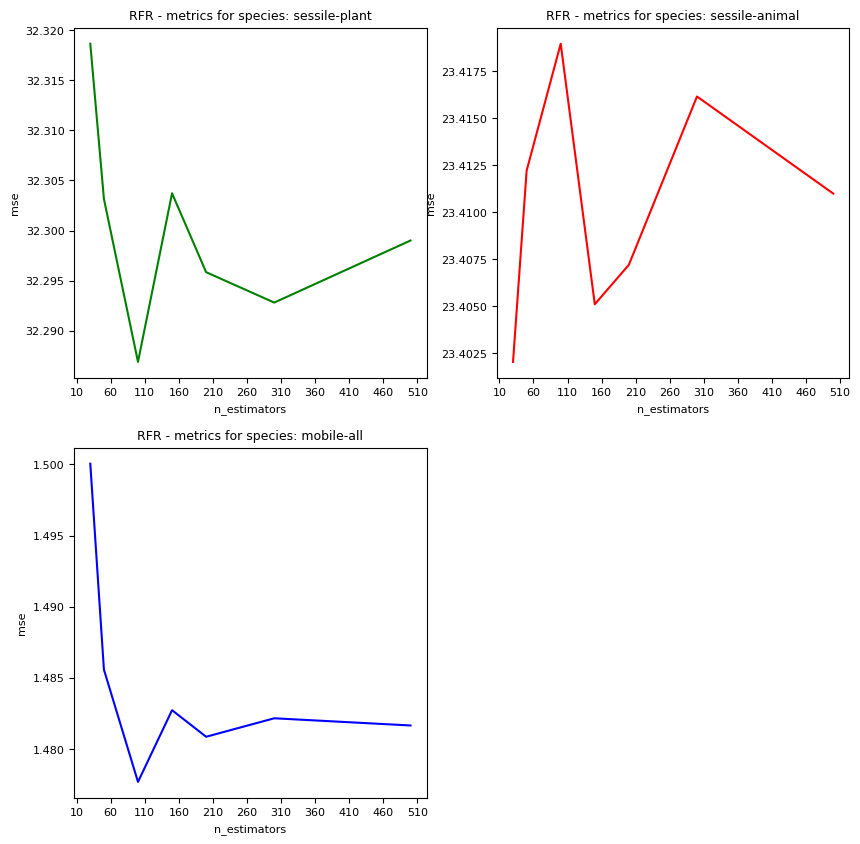

In [ ]:
# sessile - plant
curr_spec = 'sessile-plant'
estimators_0 = df_all_ests_metrics[df_all_ests_metrics['species']==curr_spec]['n_estimators'].unique()
ses_0_metrics = df_all_ests_metrics[df_all_ests_metrics['species']==curr_spec]['mse'].unique()

# Create a line plot
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].plot(estimators_0, ses_0_metrics, color="green")
axs[0,0].set_title(f"RFR - metrics for species: {curr_spec}", fontsize=9)
start, end = axs[0,0].get_xlim()
axs[0,0].xaxis.set_ticks(np.arange(round(start/10)*10, round(end/10)*10, 50))
axs[0,0].set_xlabel("n_estimators", fontsize=8)
axs[0,0].set_ylabel("mse", fontsize=8)
axs[0,0].tick_params(axis='both', labelsize=8)

# sessile - animal
curr_spec = 'sessile-animal'
estimators_1 = df_all_ests_metrics[df_all_ests_metrics['species']==curr_spec]['n_estimators'].unique()
ses_1_metrics = df_all_ests_metrics[df_all_ests_metrics['species']==curr_spec]['mse'].unique()

# Create a line plot
axs[0,1].plot(estimators_1, ses_1_metrics, color="red")
axs[0,1].set_title(f"RFR - metrics for species: {curr_spec}", fontsize=9)
start, end = axs[0,1].get_xlim()
axs[0,1].xaxis.set_ticks(np.arange(round(start/10)*10, round(end/10)*10, 50))
axs[0,1].set_xlabel("n_estimators", fontsize=8)
axs[0,1].set_ylabel("mse", fontsize=8)
axs[0,1].tick_params(axis='both', labelsize=8)

# mobile - animal
curr_spec = 'mobile-all'
estimators_2 = df_all_ests_metrics[df_all_ests_metrics['species']==curr_spec]['n_estimators'].unique()
mob_1_metrics = df_all_ests_metrics[df_all_ests_metrics['species']==curr_spec]['mse'].unique()

# Create a line plot
axs[1,0].plot(estimators_2, mob_1_metrics, color="blue")
axs[1,0].set_title(f"RFR - metrics for species: {curr_spec}", fontsize=9)
start, end = axs[1,0].get_xlim()
axs[1,0].xaxis.set_ticks(np.arange(round(start/10)*10, round(end/10)*10, 50))
axs[1,0].set_xlabel("n_estimators", fontsize=8)
axs[1,0].set_ylabel("mse", fontsize=8)
axs[1,0].tick_params(axis='both', labelsize=8)

# delete unused plot - ax
fig.delaxes(axs[1][1])

**RandomForestRegressor feature importance plots by species where 'mse' is the least by 'n_estimators'**

*Plot the feature and cumulative importances best 'mse' for 'n_estimators' - for 'sessile' - plant*

n_estimates that has least mse for sessile-plant: 100


RandomForestRegressor Metrics for sessile-plant->
Mean Absolute Error (MAE): 1.7205039053139308
Mean Squared Error (MSE): 32.28688471279516
Root Mean Squared Error (RMSE): 5.682154935655587

Plotting feature importances sorted by feature importances...


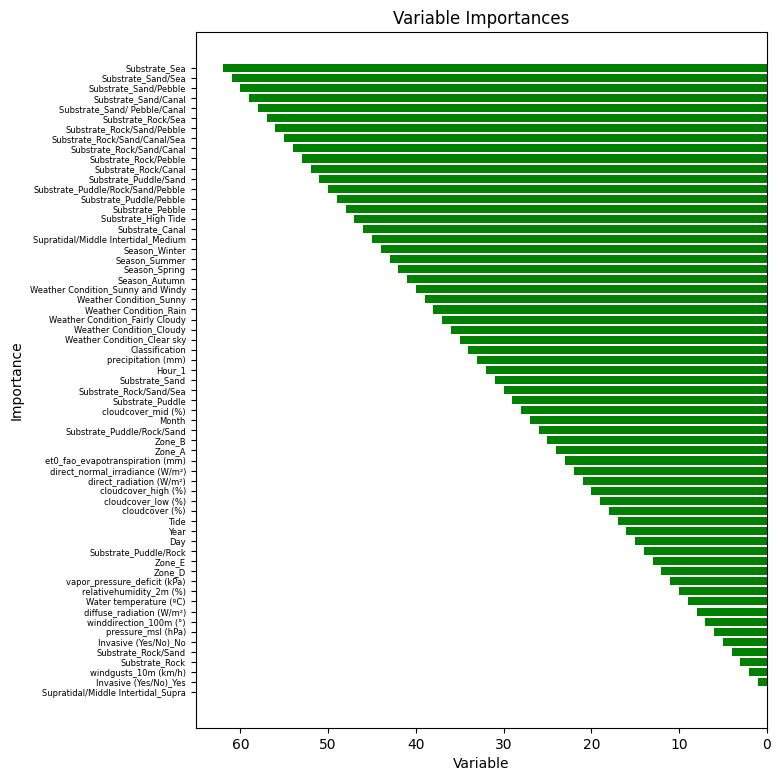


Plotting cumulative feature importances...


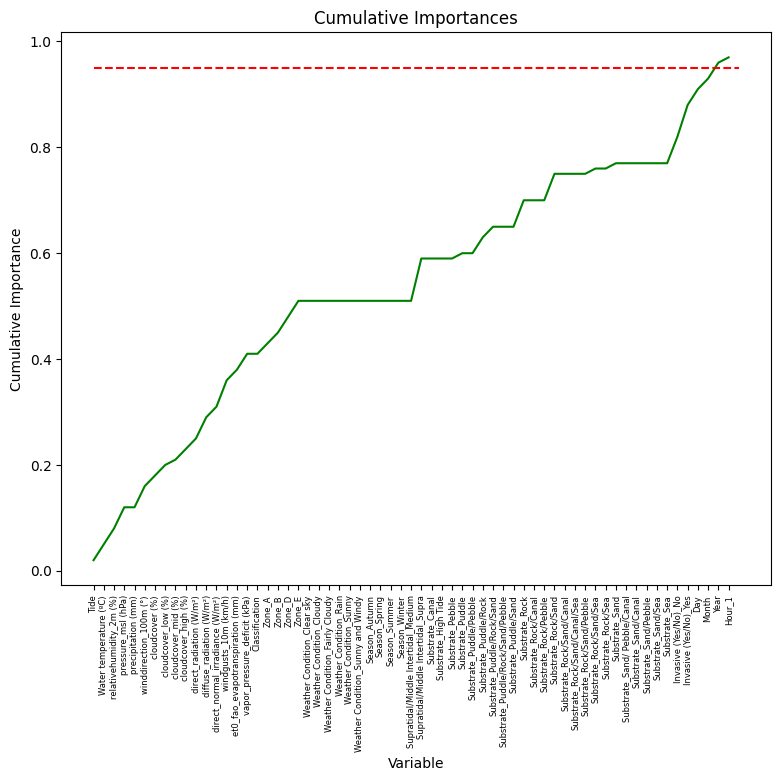

In [ ]:
# # For 'sessile' category --> classification - 0 = plant
#  with best mse score
sessil_cats = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal',
            'Substrate','Invasive (Yes/No)']
drop_cols_sp = ['% Coverage','Conservation Status (IUCN)',"Date","Hour",
             "Sessil species","Datetime"]

species_nm_arr = list(df_sessil_processed_plt0['Sessil species'].unique())
# Apply RandomForestRegressor for an array of n_estimators as below...
# Best n_estimators for which mse is the least
curr_spec = "sessile-plant"
df_metrics_s0 = df_all_ests_metrics[df_all_ests_metrics['species']==curr_spec]
best_s0_row = df_metrics_s0[df_metrics_s0['mse']==df_metrics_s0['mse'].min()]
best_ses_0_n_ests = best_s0_row['n_estimators'].item()
print(f"n_estimates that has least mse for {curr_spec}: {best_ses_0_n_ests}\n")
predictor="% Coverage"
species_type = "sessile"
species_sub_type = "plant"

df_best_met_ses_0_curr = None
r_state = 80
df_best_met_ses_0_curr, ses_0_feat_list,\
ses_0_sorted_imps, ses_0_sorted_feats, \
X_rfr_sp, sp_rfr_model = randomforestregressor_training_by_species(df_sessil_processed_plt0, 
                                        sessil_cats,
                                        drop_cols=drop_cols_sp,
                                        species_type=species_type, 
                                        species_sub_type=species_sub_type,
                                        species_col="Sessil species",
                                        species_array=species_nm_arr,
                                        predictor=predictor,
                                        n_estimators=best_ses_0_n_ests,
                                        random_state=r_state,
                                        plot_orient="vertical", 
                                        flip_vertical=True,
                                        sort_ascending=False,
                                        plot_imps=True
                                        )

*Plot the feature and cumulative importances best 'mse' for 'n_estimators' - for 'sessile' - animal*

n_estimates that has least mse for sessile-animal: 30


RandomForestRegressor Metrics for sessile-animal->
Mean Absolute Error (MAE): 1.1264441269128758
Mean Squared Error (MSE): 23.402039298726407
Root Mean Squared Error (RMSE): 4.837565430950408

Plotting feature importances sorted by feature importances...


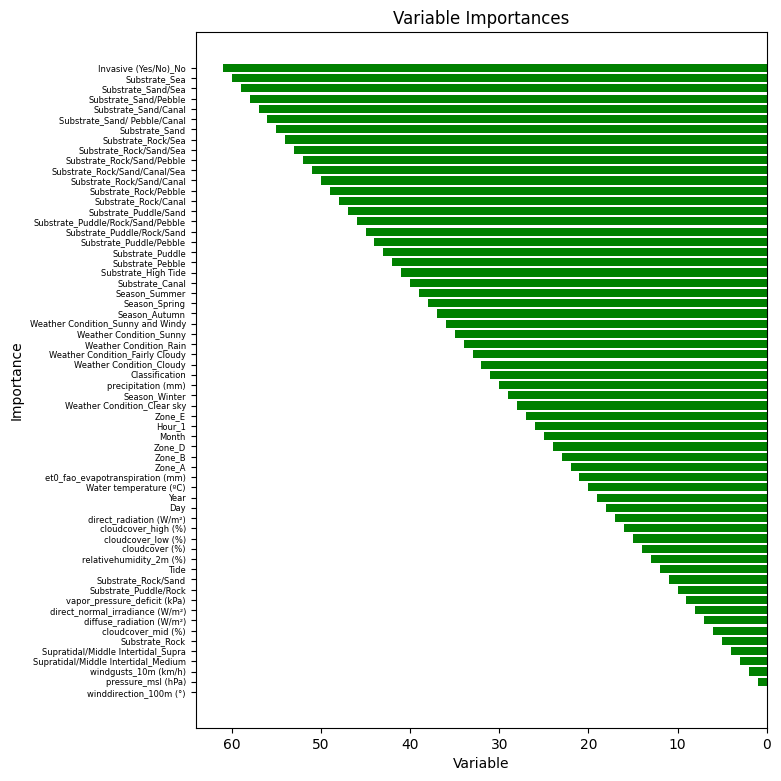


Plotting cumulative feature importances...


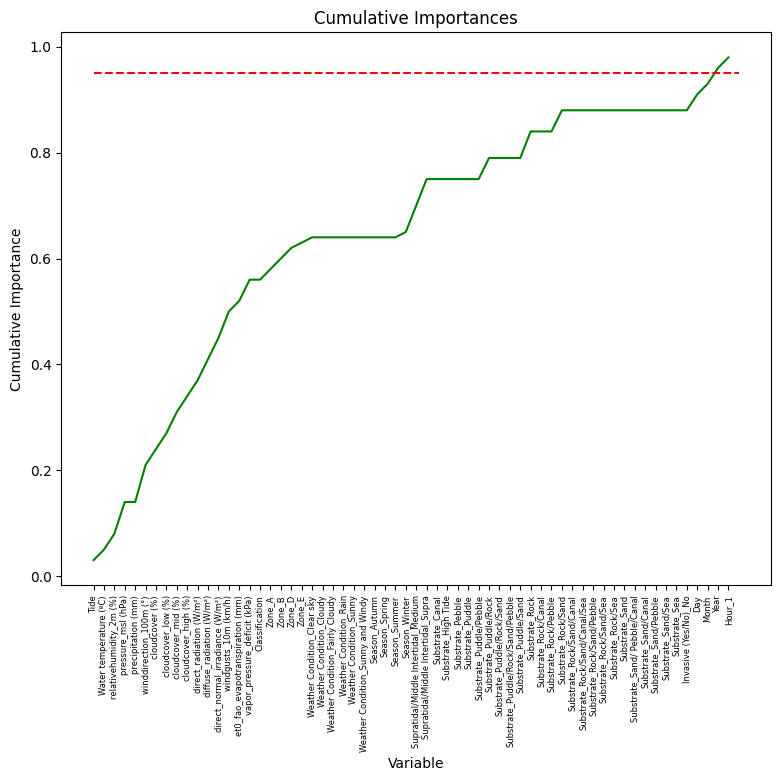

In [ ]:
# For 'sessile' category --> classification - 1 = animal
#  with best mse score
sessil_cats = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal',
            'Substrate','Invasive (Yes/No)']
drop_cols_sa = ['% Coverage','Conservation Status (IUCN)',"Date","Hour",
             "Sessil species","Datetime"]


species_nm_arr = list(df_sessil_processed_plt1['Sessil species'].unique())

# Apply RandomForestRegressor for an array of n_estimators as below...
# Best n_estimators for which mse is the least
curr_spec = "sessile-animal"
df_metrics_s1 = df_all_ests_metrics[df_all_ests_metrics['species']==curr_spec]
best_s1_row = df_metrics_s1[df_metrics_s1['mse']==df_metrics_s1['mse'].min()].reset_index()
# print(best_s1_row)
best_ses_1_n_ests = best_s1_row['n_estimators'].item()
print(f"n_estimates that has least mse for {curr_spec}: {best_ses_1_n_ests}\n")
predictor="% Coverage"
species_type = "sessile"
species_sub_type = "animal"

df_best_met_ses_1_curr = None
r_state = 80
df_best_met_ses_1_curr, ses_1_feat_list,\
ses_1_sorted_imps, ses_1_sorted_feats, \
X_rfr_sa, sa_rfr_model = randomforestregressor_training_by_species(df_sessil_processed_plt1, 
                                        sessil_cats,
                                        drop_cols=drop_cols_sa,
                                        species_type=species_type, 
                                        species_sub_type=species_sub_type,
                                        species_col="Sessil species",
                                        species_array=species_nm_arr,
                                        predictor=predictor,
                                        n_estimators=best_ses_1_n_ests,
                                        random_state=r_state,
                                        plot_orient="vertical", 
                                        flip_vertical=True,
                                        sort_ascending=False,
                                        plot_imps=True
                                        )

*Plot the feature importances and cumulative importances where mse is the least by n_estimators - for 'mobile' - all*

n_estimates that has least mse for mobile-all: 100


RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 0.14534458468186437
Mean Squared Error (MSE): 1.50004210376348
Root Mean Squared Error (RMSE): 1.2247620600604348

Plotting feature importances sorted by feature importances...


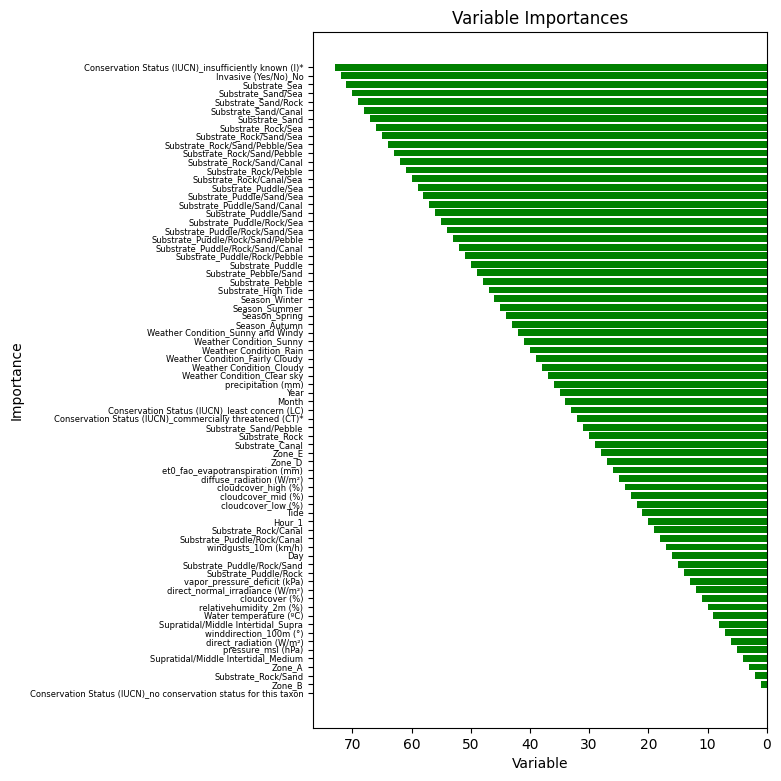


Plotting cumulative feature importances...


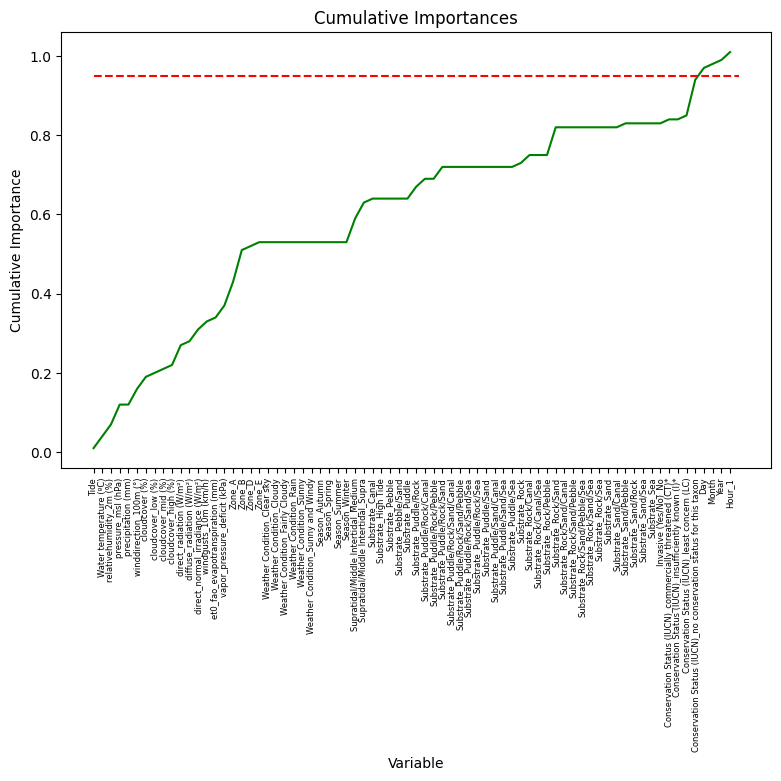

In [ ]:
# For 'mobile' species with best mse score
# Feature importance for 'mobile' - by animals
mobil_cats = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal','Substrate',
              'Invasive (Yes/No)','Conservation Status (IUCN)']
drop_cols_ma = ['#individuals', "Date", "Hour", "Mobil species", "Datetime","Abundance (ind/m2)"]

df_mobil_processed_plt1 = df_mobil_processed[df_mobil_processed.columns].copy()
species_nm_arr = list(df_mobil_processed_plt1['Mobil species'].unique())
curr_spec = 'mobile-all'
df_metrics_m1 = df_all_ests_metrics[df_all_ests_metrics['species']==curr_spec]
best_m1_row = df_metrics_m1[df_metrics_m1['mse']==df_metrics_m1['mse'].min()].reset_index()
# print(best_s1_row)
best_mob_1_n_ests = best_m1_row['n_estimators'].item()
print(f"n_estimates that has least mse for {curr_spec}: {best_mob_1_n_ests}\n")
predictor = "#individuals"
species_type = "mobile"
species_sub_type = "all"

df_best_met_mob_1_curr = None
r_state = 80
df_best_met_mob_1_curr, mob_1_feat_list,\
mob_1_sorted_imps, mob_1_sorted_feats, \
X_rfr_ma, ma_rfr_model = randomforestregressor_training_by_species(df_mobil_processed_plt1, 
                                        mobil_cats,
                                        drop_cols=drop_cols_ma,
                                        species_type=species_type, 
                                        species_sub_type=species_sub_type,
                                        species_col="Mobil species",
                                        species_array=species_nm_arr,
                                        predictor=predictor,
                                        n_estimators=best_ses_1_n_ests,
                                        random_state=r_state,
                                        plot_orient="vertical", 
                                        flip_vertical=True,
                                        sort_ascending=False,
                                        plot_imps=True
                                        )

*Overall best metrics for RandomForestRegressor model - sessile and mobile species*

In [ ]:
model_outputs_RFR = pd.DataFrame(columns=["estimator", "species", "model", "mae", "mse", "rmse"])

In [ ]:
# Store model and metrics
row = pd.concat([df_best_met_ses_0_curr, pd.Series({"estimator": sa_rfr_model}).to_frame().T], 1)
model_outputs_RFR = model_outputs_RFR.append(row, ignore_index=True)

row = pd.concat([df_best_met_ses_1_curr, pd.Series({"estimator": sp_rfr_model}).to_frame().T], 1)
model_outputs_RFR = model_outputs_RFR.append(row, ignore_index=True)

row = pd.concat([df_best_met_mob_1_curr, pd.Series({"estimator": ma_rfr_model}).to_frame().T], 1)
model_outputs_RFR = model_outputs_RFR.append(row, ignore_index=True)

In [ ]:
model_outputs_RFR

estimator         species  \
0  (DecisionTreeRegressor(max_features=1.0, rando...   sessile-plant   
1  (DecisionTreeRegressor(max_features=1.0, rando...  sessile-animal   
2  (DecisionTreeRegressor(max_features=1.0, rando...      mobile-all   

                   model       mae        mse      rmse  n_estimators  
0  RandomForestRegressor  1.720504  32.286885  5.682155         100.0  
1  RandomForestRegressor  1.126444  23.402039  4.837565          30.0  
2  RandomForestRegressor  0.145345   1.500042  1.224762          30.0

####**Overall best metrics from all models - Lasso, Gradient Boost and RandomForestRegressor - ensemble**

In [ ]:
lst_models = [model_outputs_Lasso, model_outputs_GB, model_outputs_RFR]
model_outputs = pd.concat(lst_models, ignore_index=True)
model_outputs

estimator         species  \
0                                  Lasso(alpha=0.01)   sessile-plant   
1                                  Lasso(alpha=0.01)  sessile-animal   
2                                  Lasso(alpha=0.01)      mobile-all   
3  ([DecisionTreeRegressor(criterion='friedman_ms...   sessile-plant   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  sessile-animal   
5  ([DecisionTreeRegressor(criterion='friedman_ms...      mobile-all   
6  (DecisionTreeRegressor(max_features=1.0, rando...   sessile-plant   
7  (DecisionTreeRegressor(max_features=1.0, rando...  sessile-animal   
8  (DecisionTreeRegressor(max_features=1.0, rando...      mobile-all   

                   model       mae        mse      rmse  n_estimators  
0                  Lasso  1.697246  30.665488  5.537643           NaN  
1                  Lasso  1.133102  22.678797  4.762226           NaN  
2                  Lasso  0.148411   1.411449  1.188044           NaN  
3         Gradient Boost  1.719421  30.910377  5.559710           NaN  
4         Gradient Boost  1.143301  22.861795  4.781401           NaN  
5         Gradient Boost  0.145058   1.408170  1.186663           NaN  
6  RandomForestRegressor  1.720504  32.286885  5.682155         100.0  
7  RandomForestRegressor  1.126444  23.402039  4.837565          30.0  
8  RandomForestRegressor  0.145345   1.500042  1.224762          30.0

### 5. Model interpretability and fairness

After having trained three models (lasso, gradient booster and random forest) on each of three subsets of data (sessile plants, sessile animals and mobile animals), we now examine their performance. A good model will have learned the correct relationships between the features and the species abundance, so we can examine these learned relationships to (a) gain insight into what drives ecosystem dynamics in the population, and (b) select the most appropriate features for the subsequent time-series model.

We use the mean squared error on the test set as a proxy for how well each model has learned the relationships, and select the best one (i.e. the one with the lowest MSE).

In [ ]:
# Model performance for sessile plants
model_outputs.loc[model_outputs["species"]=="sessile-plant"]

estimator        species  \
0                                  Lasso(alpha=0.01)  sessile-plant   
3  ([DecisionTreeRegressor(criterion='friedman_ms...  sessile-plant   
6  (DecisionTreeRegressor(max_features=1.0, rando...  sessile-plant   

                   model       mae        mse      rmse  n_estimators  
0                  Lasso  1.697246  30.665488  5.537643           NaN  
3         Gradient Boost  1.719421  30.910377  5.559710           NaN  
6  RandomForestRegressor  1.720504  32.286885  5.682155         100.0

In [ ]:
# Model performance for sessile animals
model_outputs.loc[model_outputs["species"]=="sessile-animal"]

estimator         species  \
1                                  Lasso(alpha=0.01)  sessile-animal   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  sessile-animal   
7  (DecisionTreeRegressor(max_features=1.0, rando...  sessile-animal   

                   model       mae        mse      rmse  n_estimators  
1                  Lasso  1.133102  22.678797  4.762226           NaN  
4         Gradient Boost  1.143301  22.861795  4.781401           NaN  
7  RandomForestRegressor  1.126444  23.402039  4.837565          30.0

In [ ]:
# Model performance for mobile animals
model_outputs.loc[model_outputs["species"]=="mobile-all"]

estimator     species  \
2                                  Lasso(alpha=0.01)  mobile-all   
5  ([DecisionTreeRegressor(criterion='friedman_ms...  mobile-all   
8  (DecisionTreeRegressor(max_features=1.0, rando...  mobile-all   

                   model       mae       mse      rmse  n_estimators  
2                  Lasso  0.148411  1.411449  1.188044           NaN  
5         Gradient Boost  0.145058  1.408170  1.186663           NaN  
8  RandomForestRegressor  0.145345  1.500042  1.224762          30.0

All models have similar MSE values, so there is no clear winner: but nevertheless, we select the best one for ecah subset of data. For sessile plants and animals, the best model is lasso. For mobile animals, the best model is gradient booster.

Partial dependence plots (PDPs) are an informative and intuitive way to understand the influence of feature values on the target variable: they show the marginal effect of each feature, and (in the case of the gradient booster) they show the characteristic of the relationship, for example if it is monotonic or not. (Note that PDPs for lasso regression will always be linear, because it is a strictly linear model; the steepness of the plot corresponds to its coefficient and indicates the strength of the relationship).

In [ ]:
# Find best model for sessile plants: model with lowest MSE
best_mse = model_outputs["mse"].loc[model_outputs["species"]=="sessile-plant"].min()
is_best = model_outputs["mse"].loc[model_outputs["species"]=="sessile-plant"] == best_mse
best_model_sp = model_outputs["estimator"].loc[is_best[is_best].index].values[0]

# Find best model for sessile animals: model with lowest MSE
best_mse = model_outputs["mse"].loc[model_outputs["species"]=="sessile-animal"].min()
is_best = model_outputs["mse"].loc[model_outputs["species"]=="sessile-animal"] == best_mse
best_model_sa = model_outputs["estimator"].loc[is_best[is_best].index].values[0]

# Find best model for mobile animals: model with lowest MSE
best_mse = model_outputs["mse"].loc[model_outputs["species"]=="mobile-all"].min()
is_best = model_outputs["mse"].loc[model_outputs["species"]=="mobile-all"] == best_mse
best_model_m = model_outputs["estimator"].loc[is_best[is_best].index].values[0]


In [ ]:
def fn_plot_pdp(df,cols_to_use, best_model, model_type="Sessil Plants"):
  n_cols = 2
  n_rows = int(np.ceil(len(cols_to_use)/n_cols))
  fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 24), gridspec_kw={'wspace': 0.4, 'hspace': 0.6})
  ax = ax.flatten()[:len(cols_to_use)]
  PartialDependenceDisplay.from_estimator(
            estimator=best_model,
            X=df,
            features=cols_to_use,
            ax=ax,n_cols=n_cols)

  fig.suptitle(f'Partial Dependence Plots for {model_type}',y=0.92)
  fig.tight_layout();

####**Partial Dependence Plots(PDP) - for sessile plants**

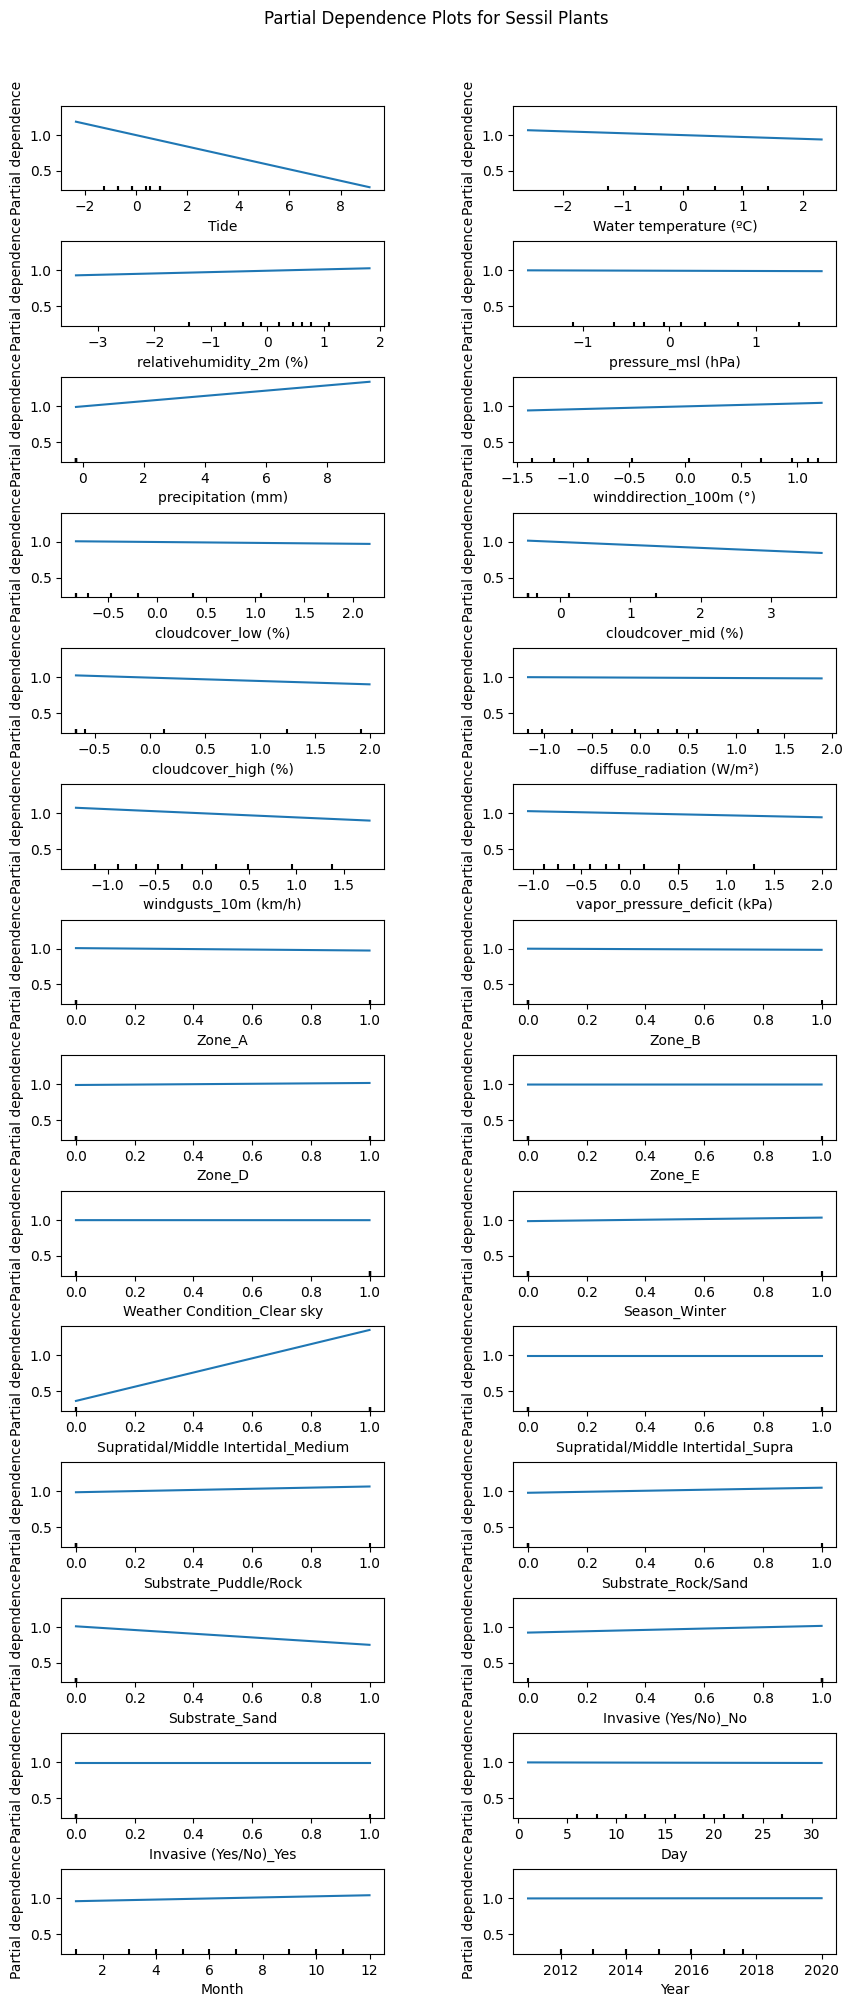

In [ ]:
## PDP for best model for sessile plants
cols_to_use = sp_coefficients[sp_coefficients['Coefficient']!=0]['Feature'].to_list()
               
fn_plot_pdp(X_sp, cols_to_use, best_model_sp, model_type="Sessil Plants")

####**Partial Dependence Plots(PDP) - for sessile animals**

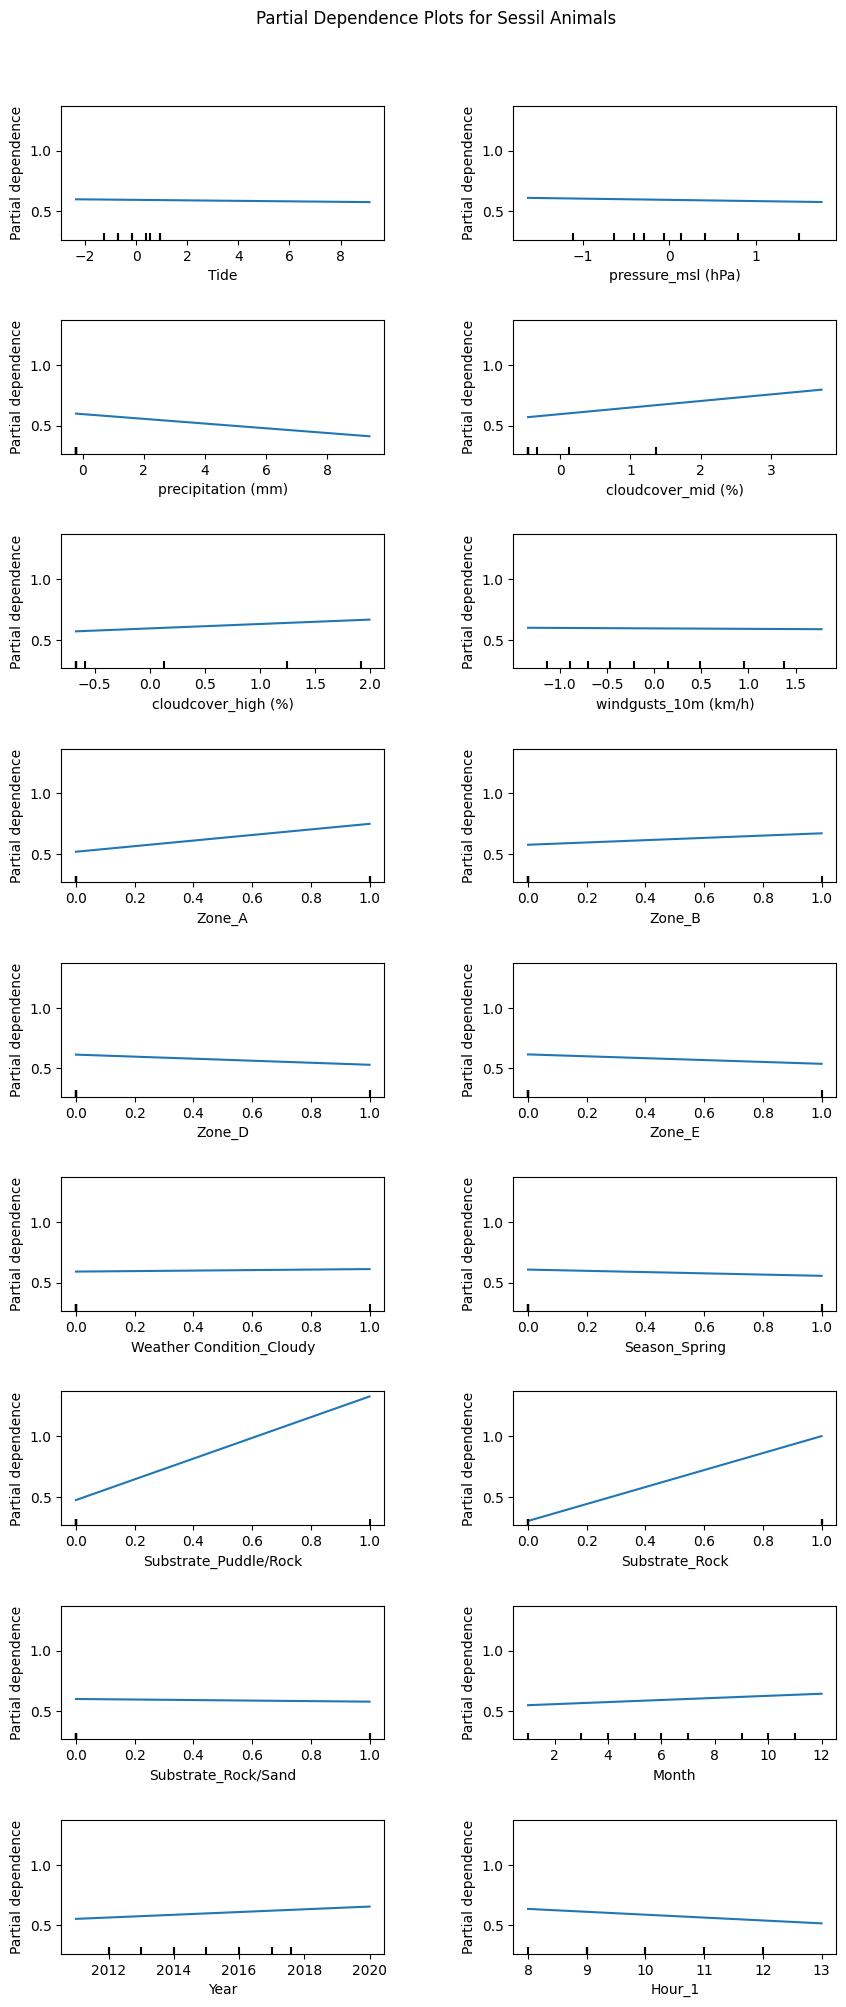

In [ ]:
## PDP for best model for sessile animals
cols_to_use = sa_coefficients[sa_coefficients['Coefficient']!=0]['Feature'].to_list()
cols_to_use.remove('Day')
fn_plot_pdp(X_sa, cols_to_use, best_model_sa, model_type="Sessil Animals")

####**Partial Dependence Plots(PDP) - for mobile animals**

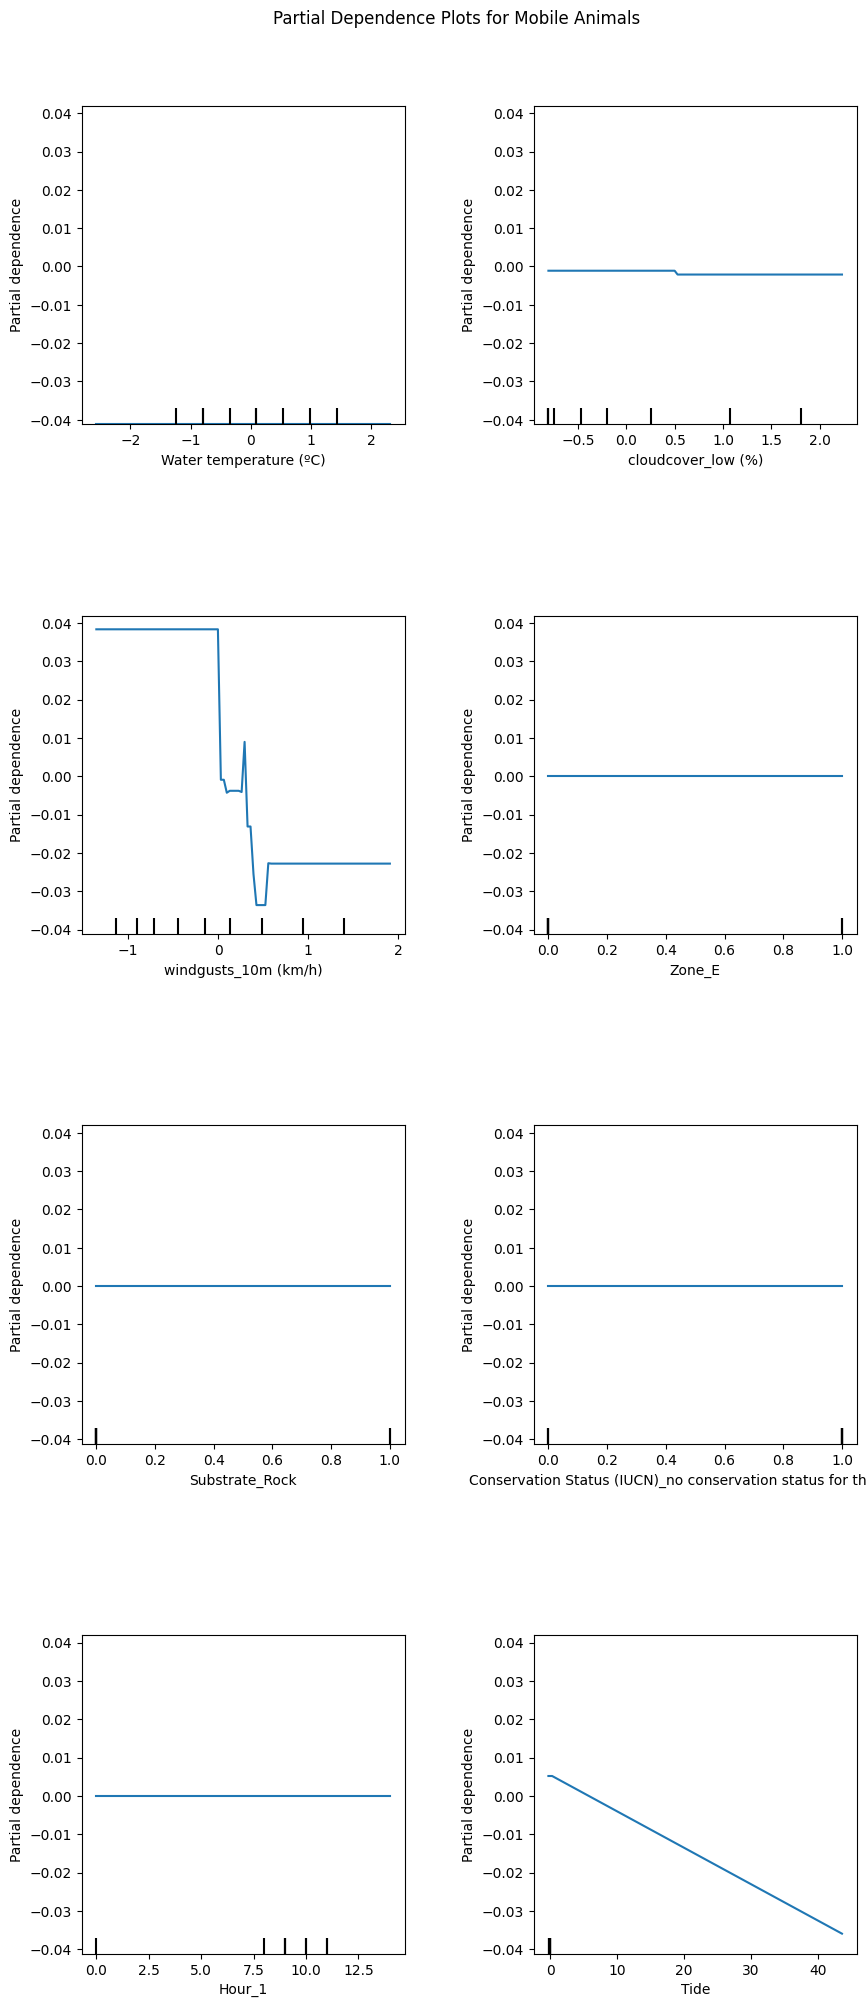

In [ ]:
## PDP for best model for mobile animals
# ** Using m_coefficients:-
cols_to_use = m_coefficients[m_coefficients['Coefficient']!=0]['Feature'].to_list()
cols_to_use.append('Tide')
               
fn_plot_pdp(X_m, cols_to_use, best_model_m, model_type="Mobile Animals")

The result: the features that have the strongest influence are not the weather variables, in general: the PDPs show mostly flat relationships for the weather variables, and stronger relationships for non-environmental variables such as the tide at the time of sampling. This means that we may not be capturing the right variables to input to the time series model. Nevertheless, we judge that the best features to select for time series modelling are precipitation, wind gusts, et0_fao_evapotranspiration, and vapor_pressure_deficit, and we implement it to demonstrate a proof of concept.

### 6. Time Series Modeling and Prediction

As a final step, we build a time-series analysis model to predict future species coverage. Since we would like to use the important features as found in the previous step in the time-series model, we choose Vector Autoregression (VAR) for this purpose as it allows us to analyze multivariate time-series data thus enable us to see how different factors influence one another.

Since each species would have their own time series data, we need to build a model for each of the species. On this effort we try the species with the highest coverage data from the sessile type.

In [ ]:
df_ts = df_sessil_processed.copy(deep=True)
df_ts["Datetime"] = df_ts["Datetime"].astype("datetime64")
df_ts.sample(5)

Datetime       Date      Hour  Tide Weather Condition  \
79240  2013-02-14 09:30:00 2013-02-14  09:30:00  0.70         Clear sky   
75349  2012-12-12 09:00:00 2012-12-12  09:00:00  0.70         Clear sky   
51157  2015-12-16 09:00:00 2015-12-16  09:00:00  0.90         Clear sky   
1718   2017-12-07 09:40:00 2017-12-07  09:40:00  0.66     Fairly Cloudy   
100381 2013-04-10 09:15:00 2013-04-10  09:15:00  0.70              Rain   

        Season  Water temperature (ºC) Zone Supratidal/Middle Intertidal  \
79240   Winter                    14.0    D                       Medium   
75349   Winter                    15.0    A                       Medium   
51157   Winter                    16.0    E                       Medium   
1718    Winter                    14.9    E                       Medium   
100381  Spring                    15.0    B                       Medium   

               Substrate  relativehumidity_2m (%)  pressure_msl (hPa)  \
79240          Rock/Sand                       90              1024.8   
75349               Rock                       85              1016.6   
51157      Rock/Sand/Sea                       76              1029.1   
1718    Puddle/Rock/Sand                       86              1031.6   
100381         Rock/Sand                       94              1018.6   

        precipitation (mm)  winddirection_100m (°)  cloudcover (%)  \
79240                  0.0                       5              36   
75349                  0.0                      66              82   
51157                  0.0                     146              30   
1718                   0.0                      67              10   
100381                 0.2                     210             100   

        cloudcover_low (%)  cloudcover_mid (%)  cloudcover_high (%)  \
79240                    9                   0                   94   
75349                    1                  92                   86   
51157                    0                   0                  100   
1718                     0                   0                   34   
100381                  61                  50                   95   

        direct_radiation (W/m²)  diffuse_radiation (W/m²)  \
79240                       3.0                       6.0   
75349                       0.0                       1.0   
51157                       0.0                       0.0   
1718                        0.0                       2.0   
100381                     16.0                      78.0   

        direct_normal_irradiance (W/m²)  windgusts_10m (km/h)  \
79240                               0.0                  26.6   
75349                               0.0                   9.7   
51157                               0.0                  22.7   
1718                                0.0                  15.8   
100381                             35.3                  34.2   

        et0_fao_evapotranspiration (mm)  vapor_pressure_deficit (kPa)  \
79240                              0.02                          0.13   
75349                              0.01                          0.16   
51157                              0.05                          0.41   
1718                               0.02                          0.14   
100381                             0.05                          0.11   

        % Coverage        Sessil species Invasive (Yes/No)  \
79240          0.0  Osmundea pinnatifida               Yes   
75349          0.0     Hildenbrandia sp.                No   
51157         58.0     Coralina elongata                No   
1718           0.0        Chthamalus sp.                No   
100381         0.0    Colpomenia sinuosa               Yes   

                   Conservation Status (IUCN)  Classification  
79240   no conservation status for this taxon               0  
75349   no conservation status for this taxon               0  
51157   no conservation status for this taxon               0

In [ ]:
ts_cols_to_use = ['Datetime', 'precipitation (mm)', 'windgusts_10m (km/h)', 
                  'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)', 
                  '% Coverage']

In [ ]:
# get data for the species "Coralina Elongata"
df_coral_elongata = df_ts[df_ts["Sessil species"] == "Coralina elongata"][ts_cols_to_use]

df_coral_elongata["Datetime"] = df_coral_elongata["Datetime"].astype("datetime64")
df_coral_elongata['observation_date'] = pd.to_datetime(df_coral_elongata["Datetime"]).dt.date
df_coral_elongata.sample(5)

Datetime  precipitation (mm)  windgusts_10m (km/h)  \
50493 2013-05-28 12:30:00                 0.0                  53.3   
50717 2014-04-17 11:30:00                 0.0                  20.9   
50722 2014-04-17 10:45:00                 0.0                  22.0   
51662 2018-01-19 08:45:00                 0.0                  48.6   
50594 2013-10-21 09:30:00                 0.0                  36.7   

       et0_fao_evapotranspiration (mm)  vapor_pressure_deficit (kPa)  \
50493                             0.35                          0.86   
50717                             0.32                          0.36   
50722                             0.20                          0.27   
51662                             0.02                          0.20   
50594                             0.04                          0.26   

       % Coverage observation_date  
50493         0.0       2013-05-28  
50717         0.0       2014-04-17  
50722        26.0       2014-04-17  
51662         0.0       2018-01-19  
50594        50.0       2013-10-21

In [ ]:
# Group data to get daily mean of feature values
df_ce_grouped = df_coral_elongata.groupby("observation_date", as_index=False).mean()

# Create a date-time index
df_ce_grouped.index = pd.DatetimeIndex(df_ce_grouped['observation_date'])
df_ce_grouped.drop('observation_date', axis=1, inplace=True)
df_ce_grouped.sample(5)

precipitation (mm)  windgusts_10m (km/h)  \
observation_date                                             
2012-02-09                  0.000000             28.736364   
2015-01-22                  0.027273             45.309091   
2012-12-17                  0.209091             24.027273   
2018-03-06                  0.200000             37.100000   
2011-11-29                  0.000000             11.800000   

                  et0_fao_evapotranspiration (mm)  \
observation_date                                    
2012-02-09                               0.104545   
2015-01-22                               0.044545   
2012-12-17                               0.025455   
2018-03-06                               0.020000   
2011-11-29                               0.075455   

                  vapor_pressure_deficit (kPa)  % Coverage  
observation_date                                            
2012-02-09                            0.381818   12.454545  
2015-01-22                            0.208182   10.227273  
2012-12-17                            0.142727    5.954545  
2018-03-06                            0.120000   16.363636  
2011-11-29                            0.040909   36.090909

In [ ]:
# Check total data length
len(df_ce_grouped)

183

In [ ]:
# Split train & test data
df_ce_grouped.sort_index(inplace=True)
df_train = df_ce_grouped[:150]
df_test = df_ce_grouped[150:]

# Check the range of test data
df_test.index[-1] - df_test.index[0]

Timedelta('1209 days 00:00:00')

In [ ]:
# Create a VAR model
model = VAR(df_train)

In [ ]:
# Find the best lag order
order = model.select_order()
order.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
# Fit the VAR model, return estimation results
estimation_results = model.fit(1)

# Compute output summary of estimates
estimation_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, May, 2023
Time:                     04:45:18
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -3.48257
Nobs:                     149.000    HQIC:                  -3.84166
Log likelihood:          -722.598    FPE:                  0.0167866
AIC:                     -4.08739    Det(Omega_mle):       0.0137796
--------------------------------------------------------------------
Results for equation precipitation (mm)
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                      0.033362         0.030799            1.083           0.279
L1.precipitation (mm)                      0.078010         0.085

In [ ]:
# Define total forecasting period considered
forecastingPeriod = 33

# Check column names for input to prediction results
df_ce_grouped.columns

Index(['precipitation (mm)', 'windgusts_10m (km/h)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       '% Coverage'],
      dtype='object')

In [ ]:
# Fetch the lag order
lag_order = estimation_results.k_ar

# Produce forecasts for desired number of steps ahead
predictions = estimation_results.forecast(df_ce_grouped.values[-lag_order:], forecastingPeriod)

# Converts NumPy multidimensional array into Pandas DataFrame
predictionsDF = pd.DataFrame(predictions)

# Assign the column headers
predictionsDF.columns = ['precipitation (mm)', 'windgusts_10m (km/h)',
                         'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
                         '% Coverage']

predictionsDF.head()

precipitation (mm)  windgusts_10m (km/h)  et0_fao_evapotranspiration (mm)  \
0            0.038747             27.363832                         0.036466   
1            0.041293             28.228545                         0.062255   
2            0.039124             28.271569                         0.080061   
3            0.036932             28.289897                         0.093464   
4            0.035126             28.337744                         0.104264   

   vapor_pressure_deficit (kPa)  % Coverage  
0                      0.152346   15.009461  
1                      0.241100   16.213297  
2                      0.293424   16.341935  
3                      0.328061   16.250385  
4                      0.354071   16.110748

In [ ]:
# Get predicted label values
coverage_pred_df = predictionsDF['% Coverage']
coverage_pred_df

0     15.009461
1     16.213297
2     16.341935
3     16.250385
4     16.110748
5     15.970288
6     15.842616
7     15.730572
8     15.633541
9     15.549941
10    15.478056
11    15.416291
12    15.363237
13    15.317671
14    15.278537
15    15.244929
16    15.216065
17    15.191276
18    15.169987
19    15.151704
20    15.136002
21    15.122517
22    15.110936
23    15.100990
24    15.092448
25    15.085113
26    15.078813
27    15.073402
28    15.068755
29    15.064765
30    15.061338
31    15.058394
32    15.055866
Name: % Coverage, dtype: float64

In [ ]:
# Create a DateTimeIndex
prediction_date_range = df_test.index.date

# Assign the DateTimeIndex as DataFrame index
coverage_pred_df.index = prediction_date_range
coverage_pred_df

2017-07-26    15.009461
2017-08-09    16.213297
2017-08-10    16.341935
2017-09-07    16.250385
2017-09-08    16.110748
2017-10-06    15.970288
2017-10-23    15.842616
2017-11-06    15.730572
2017-11-08    15.633541
2017-12-06    15.549941
2017-12-07    15.478056
2018-01-17    15.416291
2018-01-19    15.363237
2018-02-19    15.317671
2018-02-20    15.278537
2018-03-06    15.244929
2018-04-17    15.216065
2018-05-28    15.191276
2018-07-12    15.169987
2018-10-25    15.151704
2019-01-25    15.136002
2019-05-05    15.122517
2019-07-06    15.110936
2019-09-02    15.100990
2019-10-21    15.092448
2019-11-13    15.085113
2020-01-13    15.078813
2020-04-23    15.073402
2020-05-08    15.068755
2020-06-05    15.064765
2020-07-06    15.061338
2020-08-04    15.058394
2020-11-16    15.055866
Name: % Coverage, dtype: float64

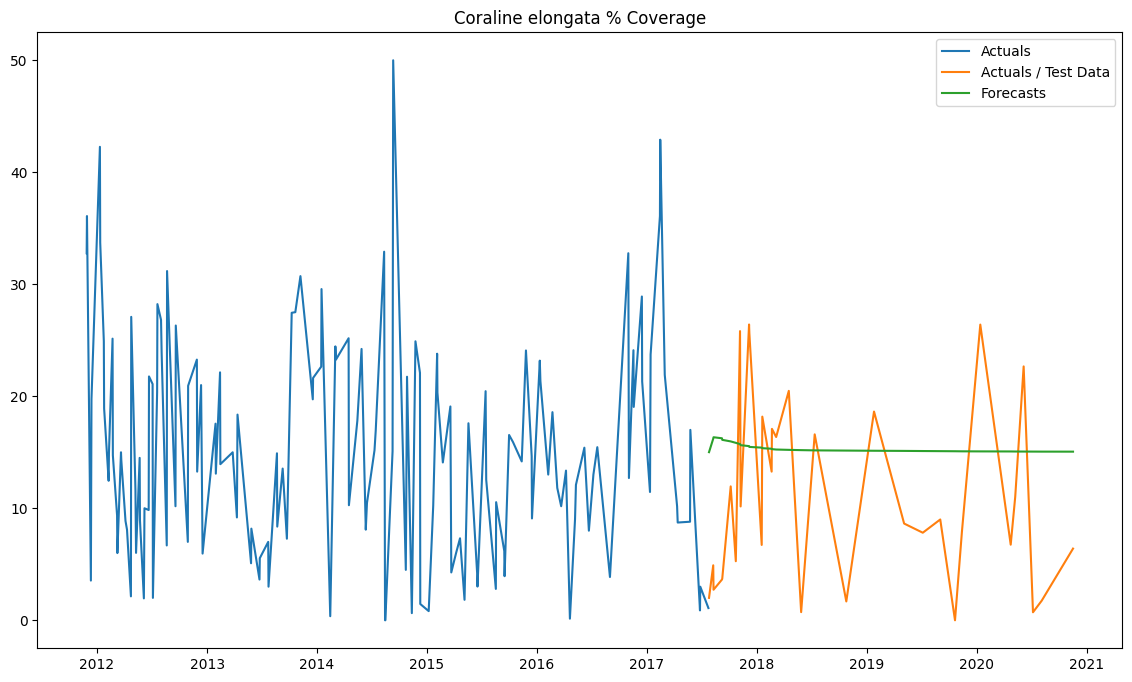

In [ ]:
plt.figure(figsize=(14, 8))
# Plotting the Actuals
plt.plot(df_train.index, df_train['% Coverage'], label='Actuals')

# Plotting the test data
plt.plot(df_test.index, df_test['% Coverage'], label='Actuals / Test Data')

# Plotting the Forecasts
plt.plot(coverage_pred_df.index, coverage_pred_df, label='Forecasts')
plt.legend(loc='best')
plt.title("Coraline elongata % Coverage")
plt.show()

In [ ]:
# Evaluate mean absolute error
mean_absolute_error(df_test['% Coverage'], coverage_pred_df)

8.43798428341019

###Extra: predicting species diversity

An alternative approach to predicting the number of each species is to predict the diversity in the intertidal community. A diversity metric that takes into account all of the species may be less prone to problems arising from the discreteness of the small numbers of individuals that we see in the mobile dataset.

A recommended way of measuring population diversity is using the Hill-Simpson metric, as discussed b [Roswell et al. (2021)](https://doi.org/10.1111/oik.07202). Here we re-train the three models (LASSO, gradient boosting and random forest regressors) to predict the overall Hill-Simpson diversity in the population to see if weather features have stronger influence over diversity than individual species counts.

First, calculate the diversity for every sample taken and do some basic EDA.

In [ ]:
# List mobile species and exclude any with 0 total observations
mobile_species = ['Caboz N.I.', 'Palaemon serratus', 'Nasariidae (búzio)',
       'Diogenes pugilator', 'Marthasterias glacialis',
       'Asterina gibbosa', 'Eulalia viridis (poliqueta)',
       'Sabellaria alveolata', 'Octopus vulgaris', 'Sepia officinallis',
       'Alloteuthis subulata', 'Loligo vulgaris',
       'Parablennius gattorugine', 'Diplodus sp.', 'Diplodus sargus',
       'Maja sp.', 'Eriphia verrucosa', 'Polybius henslowii',
       'Necora puber', 'Aplysia punctata', 'Podarcis carbonelli',
       'Acanthochitona fascicularis', 'Sphaeroma sp. (bicho de conta)',
       'Chromodoris purpurea (nudibrânquio)',
       'Lipophrys pholis (juvenil/recruta)',
       'Pomatoschistus pictus (caboz-de-areia)', 'Peixe juvenil N.I.',
       'Juvenis de lagosta/lavagante', 'caranguejo N.I.', 'Xantho sp.',
       'Carcinus maenas', 'Atherina presbyter', 'Diplodus vulgaris',
       'Syngnathus (Marinha)', 'Lepadogaster lepadogaster',
       'Poliqueta n.i.', 'Nereis sp.', 'Ofiurídeo n.i.', 'Chiton sp. ',
       'Leptochiton cancellatus', 'Anémona n.i.',
       'Pagurus sp. (caranguejo eremita)',
       'Pachygrapsus marmoratus (caranguejo pequeno verde)',
       'Porcellana sp. (caranguejo pinças largas)', 'Palaemon sp.',
       'Gobius sp.', 'Parablennius sp. (marachomba)',
       'Parablennius pilicornis', 'Nudibranquio N.I.',
       'Callionymus lira (peixe-pau lira)', 'Oncidiella celtica',
       'Doriopsilla areolata (nudibrânquio)', 'Scorpaena sp. (Rascasso)',
       'Lipophrys pholis (ad.)', 'Diplodus cervinus',
       'Gobiusculus flavescens']
species_list = np.array(mobile_species)[df_mobile_corrected[mobile_species].apply(pd.to_numeric, errors="coerce").sum() > 0]

In [ ]:
# Calculate species' rarity
P = df_mobile_corrected[species_list].apply(pd.to_numeric, errors="coerce").sum().sum()
p = df_mobile_corrected[species_list].apply(pd.to_numeric, errors="coerce").sum() / P
r = 1 / p

# Calculate Hill-Simpson diversity
def diversity(p, r, l=-1):
  return ( np.sum( p*(r**l) ) )**(1/l)
D = df_mobile_corrected[species_list].apply(pd.to_numeric, errors="coerce").apply(lambda x: diversity(x, r), axis=1)

# Correct for inf
D[np.isinf(D)] = np.max(D[~np.isinf(D)])*1.1

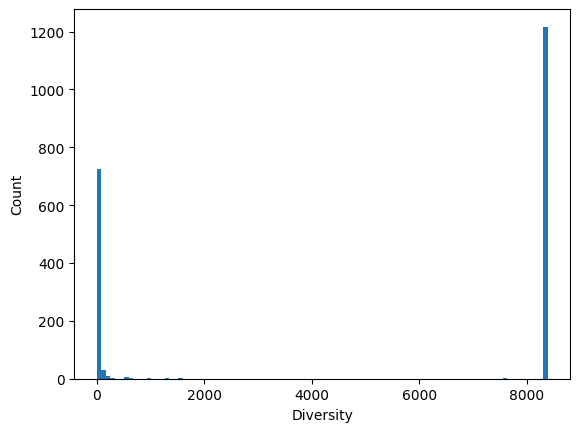

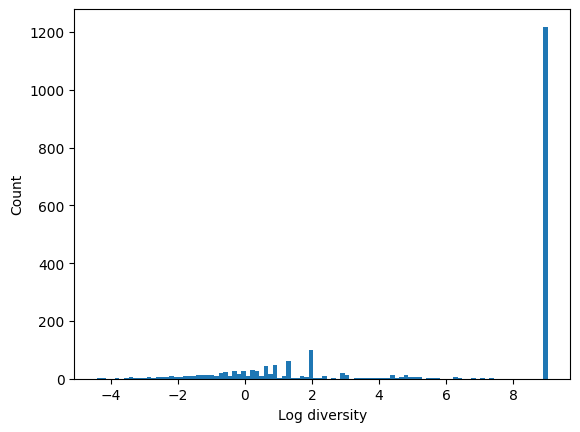

In [ ]:
# Visualise diversity
plt.hist(D, 100)
plt.xlabel("Diversity")
plt.ylabel("Count")
plt.show()

# Distribution is very skewed, so visualise log of diversity
plt.hist(np.log(D), 100)
plt.xlabel("Log diversity")
plt.ylabel("Count")
plt.show()

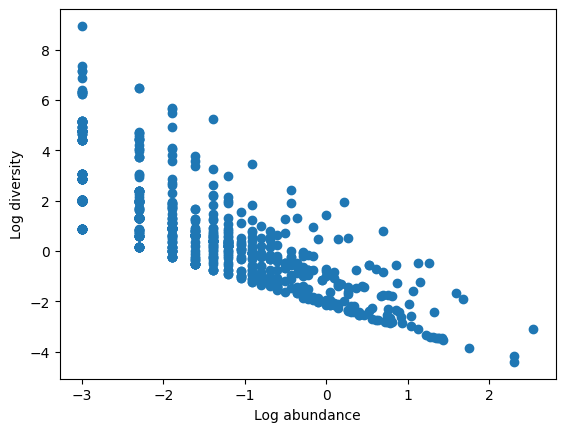

In [ ]:
# Visualise relationship between diversity and abundance (total number of individuals per square metre)
plt.scatter(np.log(df_mobile_corrected["Abundance (ind/m2)"]), np.log(D))
plt.xlabel("Log abundance")
plt.ylabel("Log diversity")
plt.show()

Diversity is highly skewed so we will predict its log. Low abundance (few species/individuals at all in a sample) cause very high diversity values, so we cap them.

In [ ]:
# Combine weather data with mobile data and diversity
weather_features.index = pd.to_datetime(weather_features.index)
weather_features.index = [x.strftime("%Y-%m-%d %H:%M:%S") for x in weather_features.index]
df_mobile_corrected["Date"] = pd.to_datetime(df_mobile_corrected["Date"])
df_mobile_corrected["date_str"] = df_mobile_corrected["Date"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
mobile_weather_merged = df_mobile_corrected.merge(weather_features, left_on="date_str", right_index=True, how="left")
mobile_weather_merged.drop(columns="date_str", inplace=True)
mobile_weather_merged["log_diversity"] = np.log(D)

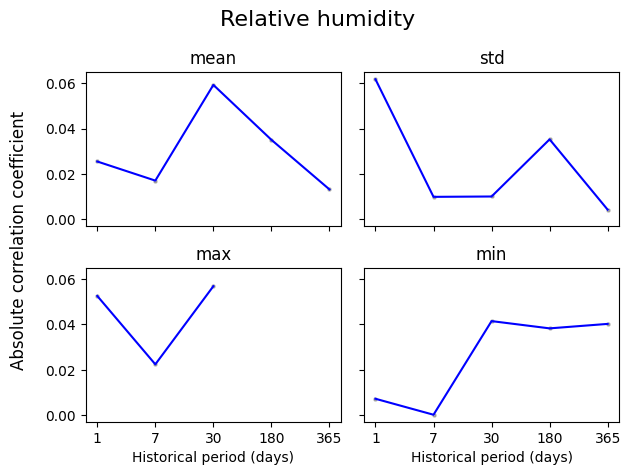

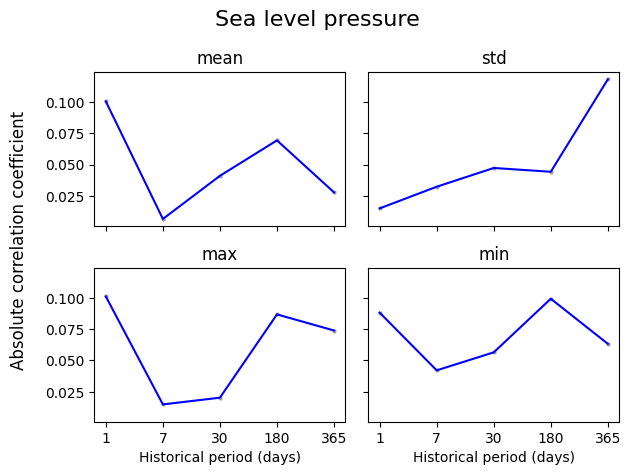

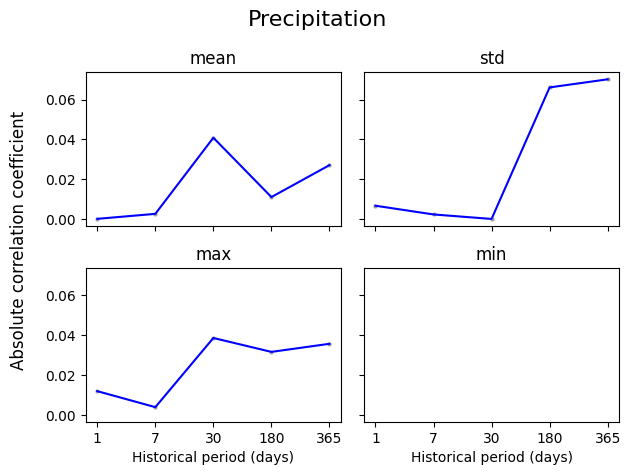

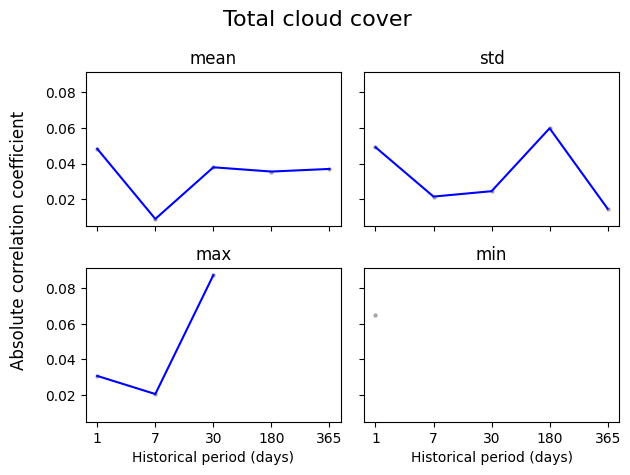

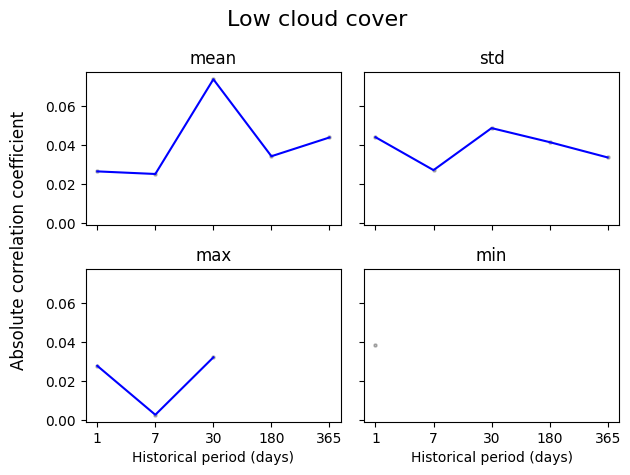

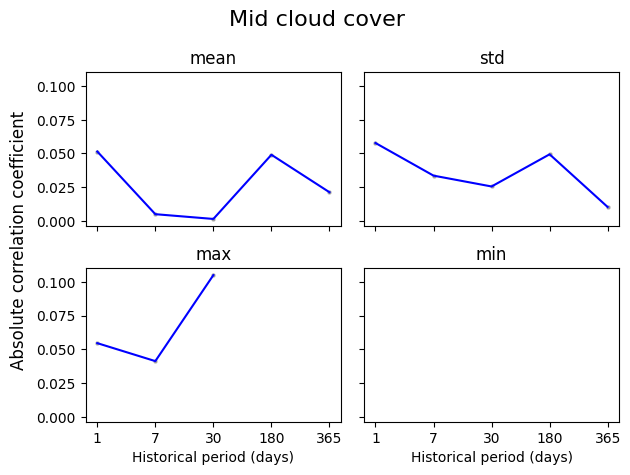

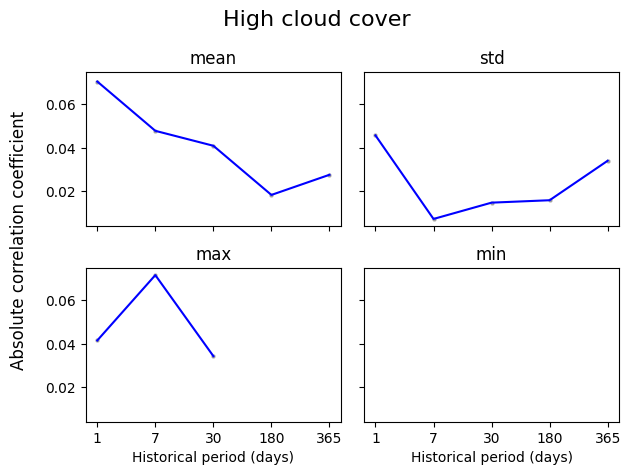

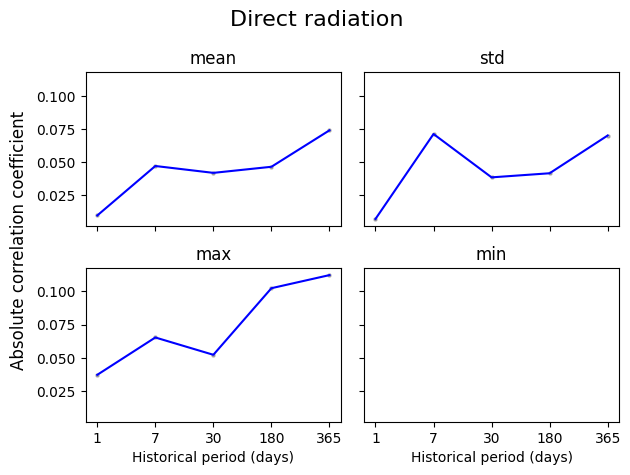

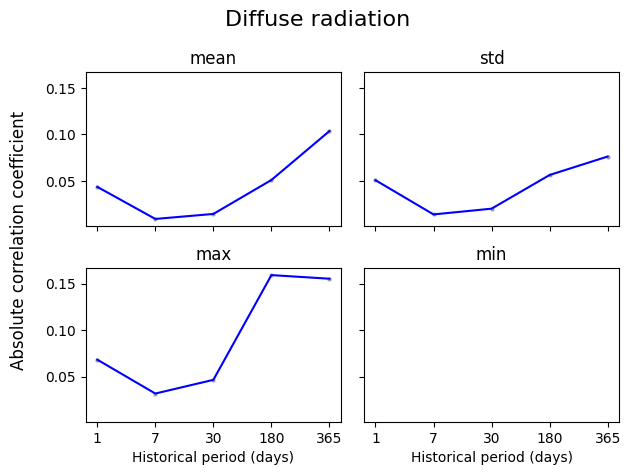

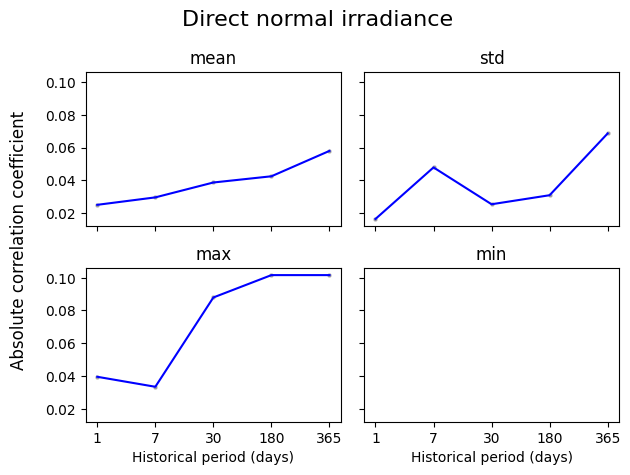

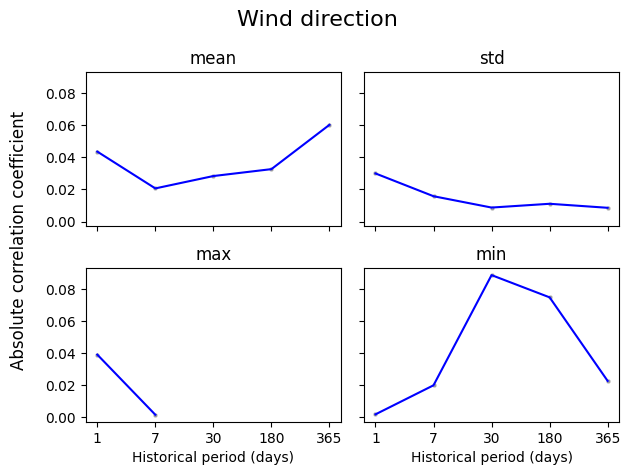

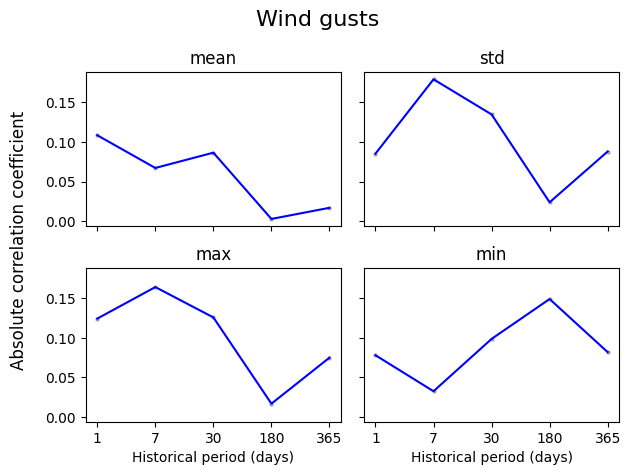

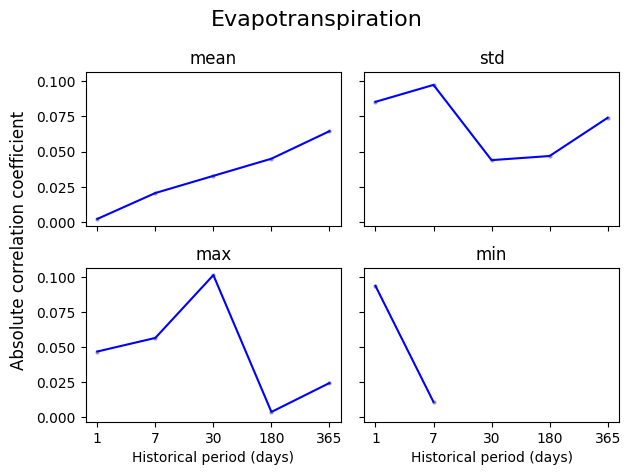

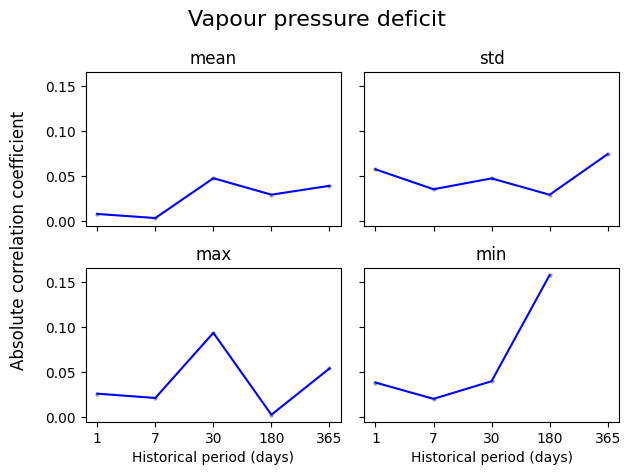

In [ ]:
# Plot correlations for mobile species (summer months only)
species_list = ["log_diversity"]

for feature, name in feature_name_mapping.items():
  plot_weather_correlations(mobile_weather_merged, feature, name, species_list, True)

The correlations between weather features and diversity are not very strong, over any historical period from 1 day to 1 year. But we will try the machine learning models with these features anyway.

In [ ]:
# Create dataframe for storing models and metrics
diversity_model_outputs = pd.DataFrame(columns=["estimator", "species", "model", "mae", "mse", "rmse"])

In [ ]:
# Lasso model
df_mobil_processed_weather["log_diversity"] = np.log(D)
df_mobil_processed_weather["Date"] = df_mobil_processed_weather["Date"].apply(pd.to_datetime, errors="ignore")
df_mobil_processed_weather.replace(" ", np.nan, inplace=True)
df_mobil_processed_weather.dropna(inplace=True)

# Mobil Species
cat_cols = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal','Substrate']
drop_cols = ["Date", "date_str", "Datetime", "Hour", "log_diversity", "Abundance (ind/m2)"]
# drop_cols = ["Datetime", "Hour", "log_diversity", "Abundance (ind/m2)"]
mb_sp = mobile_species.copy()
# mb_sp.remove('Acanthochitona fascicularis (quíton com pêlos)')
[drop_cols.append(x) for x in mb_sp]
m_lasso_model, m_metrics, m_coefficients, X_m = lasso_training(df_mobil_processed_weather, cat_cols, drop_cols, 
                                                             model_type= "mobile-all", predictor="log_diversity")

# Store model and metrics
row = pd.concat([pd.Series({"estimator": m_lasso_model}), pd.Series(m_metrics[0])], 0)
diversity_model_outputs = diversity_model_outputs.append(row, ignore_index=True)


Lasso Metrics for mobile-all->
Mean Absolute Error (MAE): 3.6925034690493472
Mean Squared Error (MSE): 16.61108978581163
Root Mean Squared Error (RMSE): 4.075670470709283


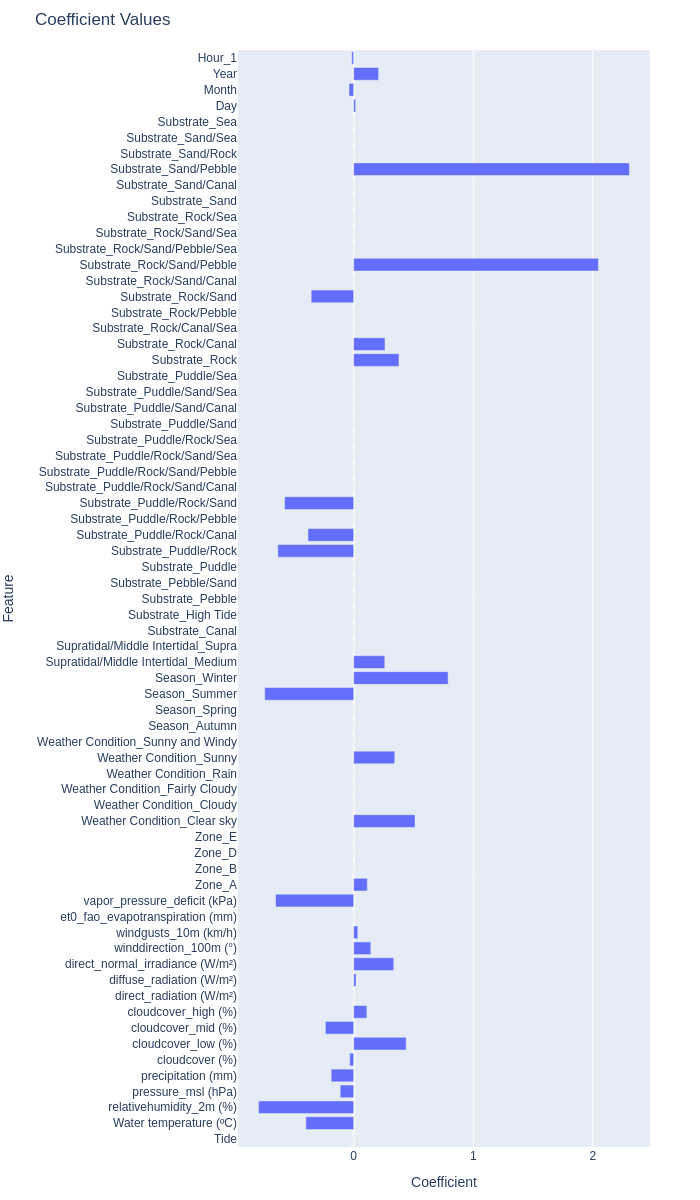

In [ ]:
# Create a bar chart
fig = go.Figure(go.Bar(
    x=m_coefficients.Coefficient,
    y=m_coefficients.Feature,
    orientation='h'
))

fig.update_layout(
    title='Coefficient Values',
    xaxis_title='Coefficient',
    yaxis_title='Feature',
    height=1200,
    margin=dict(l=200, r=50, t=50, b=50),
)

fig.show("png")

In [ ]:
# Gradient boosting model
y_column =  "log_diversity"
cols_to_use = ['Tide', 'Water temperature (ºC)', 'relativehumidity_2m (%)', 
               'pressure_msl (hPa)', 'precipitation (mm)', 'cloudcover (%)', 
               'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 
               'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 
               'direct_normal_irradiance (W/m²)', 'windgusts_10m (km/h)', 
               'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)']

X_train, X_test, y_train, y_test = get_data(df_mobil_processed_weather, "log_diversity")
m_gb_model = GradientBoostingRegressor()
m_gb_model.fit(X_train, y_train)
m_metrics = fn_print_metrics(m_gb_model, X_test, y_test, "mobile-all")

# Store model and metrics
row = pd.concat([pd.Series({"estimator": m_gb_model}), pd.Series(m_metrics[0])], 0)
diversity_model_outputs = diversity_model_outputs.append(row, ignore_index=True)

Gradient Boost Metrics for mobile-all->
Mean Absolute Error (MAE): 3.6638097655016724
Mean Squared Error (MSE): 17.2980944184996
Root Mean Squared Error (RMSE): 4.159097789004197


In [ ]:
# RandomForestRegressor model
mobil_cats = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal','Substrate',
              ]
drop_cols_ma = ["Date", "Hour", "Datetime", "date_str", "log_diversity", "Abundance (ind/m2)"]
mb_sp = mobile_species.copy()
# mb_sp.remove('Acanthochitona fascicularis (quíton com pêlos)')
[drop_cols_ma.append(x) for x in mb_sp]

df_mobil_processed_plt1 = df_mobil_processed_weather[df_mobil_processed_weather.columns].copy()
df_mobil_processed_plt1["Datetime"] = df_mobil_processed_plt1["Datetime"].dt.strftime('%Y-%m-%d')
species_nm_arr = []

# Apply RandomForestRegressor for an array of n_estimators as below...
estimator_arr = [500, 300, 200, 150, 100, 50, 30]
df_met_mob_1_arr = []
predictor = "log_diversity"
species_type = "mobile"
species_sub_type = "all"

for i in range(len(estimator_arr)):
    df_met_mob_1_curr = None
    plot_imps = False
    n_est = estimator_arr[i]
    r_state = 80
    df_met_mob_1_curr, mob_1_feat_list,\
    mob_1_sorted_imps, mob_1_sorted_feats, _, _ = randomforestregressor_training_by_species(df_mobil_processed_plt1, 
                                            mobil_cats,
                                            drop_cols=drop_cols_ma,
                                            species_type=species_type, 
                                            species_sub_type=species_sub_type,
                                            species_col="Mobil species",
                                            species_array=species_nm_arr,
                                            predictor=predictor,
                                            n_estimators=n_est,
                                            random_state=r_state,
                                            plot_orient="vertical", 
                                            flip_vertical=True,
                                            sort_ascending=False,
                                            plot_imps=False
                                            )
    df_met_mob_1_arr.append(df_met_mob_1_curr)

# Set up the mobile animal - metrics    
df_met_mob_1 = pd.concat(df_met_mob_1_arr, ignore_index=True)



RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 3.372649973819891
Mean Squared Error (MSE): 18.62019864642552
Root Mean Squared Error (RMSE): 4.315112819663644



RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 3.370718012462681
Mean Squared Error (MSE): 18.61633265171171
Root Mean Squared Error (RMSE): 4.314664836544283



RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 3.375840157150408
Mean Squared Error (MSE): 18.658119263822616
Root Mean Squared Error (RMSE): 4.319504516009054



RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 3.3778356637434435
Mean Squared Error (MSE): 18.66278516111032
Root Mean Squared Error (RMSE): 4.320044578602207



RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 3.384584686705309
Mean Squared Error (MSE): 18.74244836412239
Root Mean Squared Error (RMSE): 4.329254943304031



RandomForestRegressor Metrics for mobile-all->
Mean 

n_estimates that has least mse for mobile-all: 50


RandomForestRegressor Metrics for mobile-all->
Mean Absolute Error (MAE): 3.374318050668348
Mean Squared Error (MSE): 18.583483790446444
Root Mean Squared Error (RMSE): 4.310856503114716

Plotting feature importances sorted by feature importances...


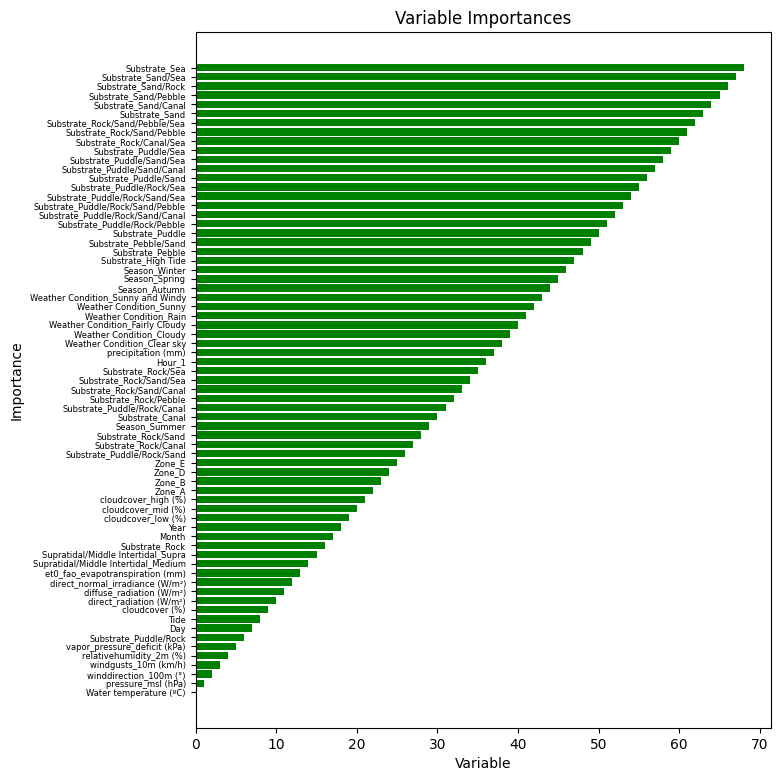


Plotting cumulative feature importances...


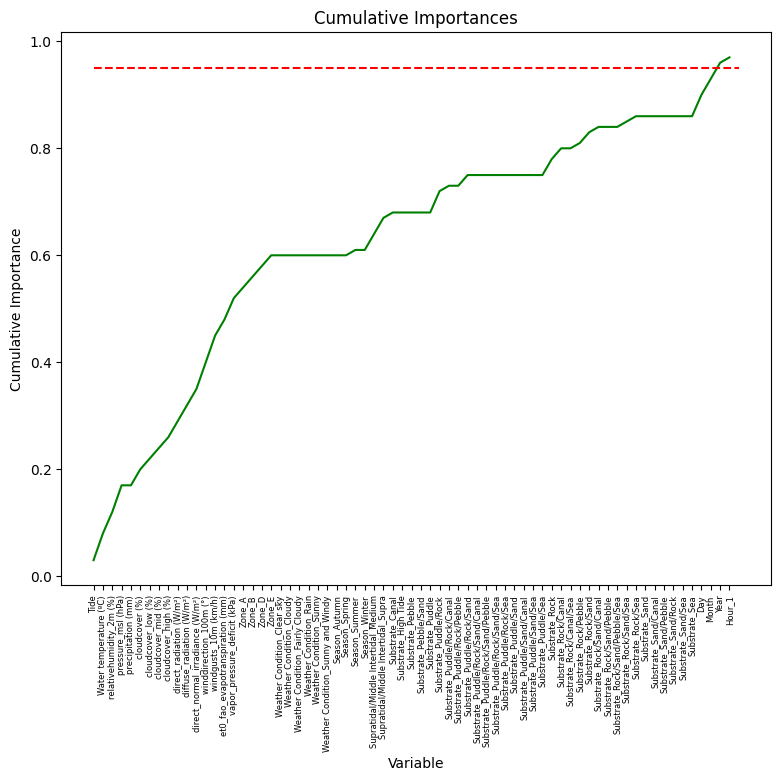

In [ ]:
# For 'mobile' species with best mse score

mobil_cats = ['Zone', 'Weather Condition','Season','Supratidal/Middle Intertidal','Substrate',
              ]
drop_cols_ma = ["Date", "Hour", "Datetime", "date_str", "log_diversity", "Abundance (ind/m2)"]
mb_sp = mobile_species.copy()
[drop_cols_ma.append(x) for x in mb_sp]

df_mobil_processed_plt1 = df_mobil_processed_weather[df_mobil_processed_weather.columns].copy()
species_nm_arr = []

curr_spec = 'mobile-all'
best_m1_row = df_met_mob_1[df_met_mob_1['mse']==df_met_mob_1['mse'].min()].reset_index()
# print(best_s1_row)
best_mob_1_n_ests = best_m1_row['n_estimators'].item()
print(f"n_estimates that has least mse for {curr_spec}: {best_mob_1_n_ests}\n")
predictor = "log_diversity"

df_best_met_mob_1_curr = None
r_state = 80
df_best_met_mob_1_curr, mob_1_feat_list,\
mob_1_sorted_imps, mob_1_sorted_feats, \
X_rfr_ma, ma_rfr_model = randomforestregressor_training_by_species(df_mobil_processed_weather, 
                                        mobil_cats,
                                        drop_cols=drop_cols_ma,
                                        species_type="mobile", 
                                        species_sub_type='all',
                                        species_col="Mobil species",
                                        species_array=species_nm_arr,
                                        predictor=predictor,
                                        n_estimators=best_mob_1_n_ests,
                                        random_state=r_state,
                                        plot_orient="vertical", 
                                        flip_vertical=False,
                                        sort_ascending=True,
                                        plot_imps=True
                                        )

row = pd.concat([df_best_met_mob_1_curr, pd.Series({"estimator": ma_rfr_model}).to_frame().T], 1)
diversity_model_outputs = diversity_model_outputs.append(row, ignore_index=True)

In [ ]:
# Model results
diversity_model_outputs

estimator     species  \
0                                  Lasso(alpha=0.01)  mobile-all   
1  ([DecisionTreeRegressor(criterion='friedman_ms...  mobile-all   
2  (DecisionTreeRegressor(max_features=1.0, rando...  mobile-all   

                   model       mae        mse      rmse  n_estimators  
0                  Lasso  3.692503  16.611090  4.075670           NaN  
1         Gradient Boost  3.663810  17.298094  4.159098           NaN  
2  RandomForestRegressor  3.374318  18.583484  4.310857          50.0

In [ ]:
# Find best model for diversity: model with lowest MSE
best_mse = diversity_model_outputs["mse"].loc[diversity_model_outputs["species"]=="mobile-all"].min()
is_best = diversity_model_outputs["mse"].loc[diversity_model_outputs["species"]=="mobile-all"] == best_mse
best_model_diversity = diversity_model_outputs["estimator"].loc[is_best[is_best].index].values[0]

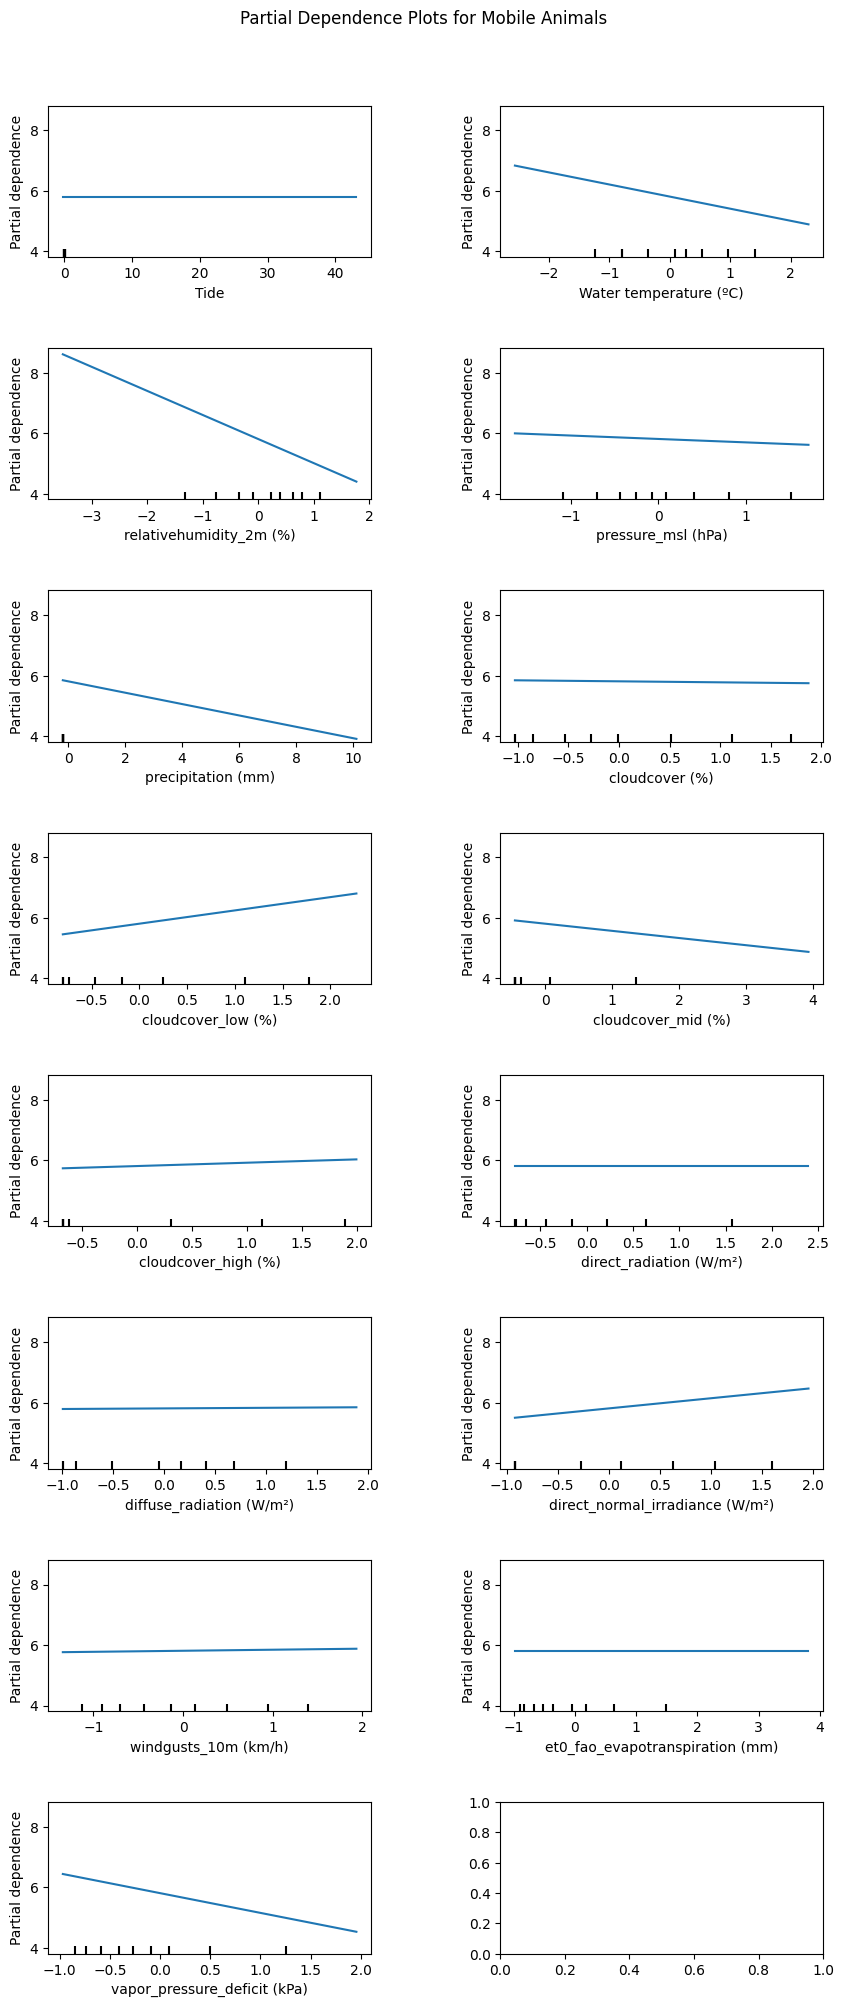

In [ ]:
## PDP for best model for diversity

cols_to_use = ['Tide', 'Water temperature (ºC)', 'relativehumidity_2m (%)', 
               'pressure_msl (hPa)', 'precipitation (mm)', 'cloudcover (%)', 
               'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 
               'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 
               'direct_normal_irradiance (W/m²)', 'windgusts_10m (km/h)', 
               'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)']
               
fn_plot_pdp(X_m, cols_to_use, best_model_diversity, model_type="Mobile Animals")

Conclusion from modelling mobile species diversity:
* None of the weather variables are very strong predictors of species diversity
* But diversity is somewhat higher when there is lower water temperature, lower humidity, lower precipitation, higher cloud cover, and lower vapour pressure deficit

## Conclusion and Recommendation

**Conclusion**
- We have created a framework of feature selection and time series modeling that can be applied to any marine protected area.
- Specifically in the Avencas Marine Protected Area that we analyzed, all three regressor models that we trained had similar performance, as measured by mean squared error. We selected the best model, which in two cases was a lasso regression: this model is known for strongly regularising irrelevant variables so it is a good candidate for interpreting which are the most important variables. In the third case, the best model was a gradient booster, which is known to be able to capture complex relationships between variables and is also a good candidate.
- However, the PDP plots show that none of the environmental features are good predictors of number or coverage of intertidal species. The species abundance does not vary as a function of these variables.
- As a result, the multivariate time-series model incorporating important features from the previous modeling did not perform well in predicting future species coverage. This supports the conclusion that weather features do not explain much of the changes in biodiversity.
 
**Recommendations**
- Data on water salinity, nutrients, and human mobility in the area might enhance the analysis and improve the predictions.
- Data quality in terms of completeness (no missing data), uniformity (in the same format and unit of measure) would help the data processing, analysis and modeling.
- Parts of our code, especially the EDA section, can help users clean the data and the code can be adapted for additional cleaning efforts.
- In order to compare different species' abundance and also to expand the number of modeling techniques available, it is advisable to have the same unit of measure (e.g. "% Coverage") for both sessile and mobile species.
- Identifying different sources of water pollution would help enrich the data used for analysis. 



## 👓 References

- An Article on Cascais Marine Protected Area https://data.cascais.pt/en/news/cascais-world-ocean-summit
- Weather Data Source https://open-meteo.com/en/docs/historical-weather-api#latitude=38.70&longitude=-9.42
- A paper on Intertidal species richness and abundances in a recent small Marine Protected Area in Portugal https://lup.lub.lu.se/luur/download?func=downloadFile&recordOId=9038392&fileOId=9038394
- A paper on DeepData: Machine learning in the marine ecosystems https://www.sciencedirect.com/science/article/pii/S0957417422010983
- An Article on Cascais Municipality https://storymaps.arcgis.com/stories/b576b2067fb940abaea1289cb0dd1158
- An Article on Biodiversity https://doi.org/10.1111/oik.07202